In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import torch
import torch.nn as nn	# 各种层类型的实现
import torch.nn.functional as F	# 各中层函数的实现，与层类型对应，如：卷积函数、池化函数、归一化函数等等
import torch.optim as optim	# 实现各种优化算法的包
from torchvision import datasets, transforms
import numpy as np

import argparse
import sys


import numpy as np
from numpy.random import permutation
import matplotlib.pyplot as plt
from grid_data import GridData

from compute_mpe import CircuitMPE
import sys
sys.path.insert(0,'/root/gurobi903/linux64/lib/python3.6_utf32/gurobipy')
import gurobipy
cmpe = CircuitMPE('/root/PySDD/notebooks/ml100.vtree', '/root/PySDD/notebooks/ml100.sdd')
class para:
    def __init__(self):
        self.batch_size=16
        self.wmc=10
        self.solDim=100
        self.card=10
        self.test_batch_size=1000
        self.epochs=10
        self.lr=0.1
        self.momentum=0.5
        self.no_cuda='store_true'
        self.seed=1
        self.log_interval=10
        self.hidden_dim=10
args=para()
legalList={0: [46], 1: [59], 2: [53, 63, 86], 3: [17, 22, 23, 24, 26, 34, 51, 61, 66, 74, 81, 85, 87, 89, 90, 96], 4: [24, 26, 37, 71, 83, 87, 94, 99], 5: [96], 6: [38], 7: [85], 8: [19, 64], 9: [], 10: [], 11: [], 12: [17, 79, 81], 13: [17, 23, 24, 25, 26, 30, 36, 42, 54, 56, 61, 66, 68, 72, 77, 81, 84, 89, 92, 95], 14: [], 15: [], 16: [17, 24, 25, 27, 35, 39, 42, 46, 48, 56, 61, 66, 72, 76, 81, 84, 89], 17: [3, 12, 13, 16, 24, 25, 27, 29, 35, 39, 42, 46, 51, 52, 54, 56, 61, 66, 72, 76, 77, 79, 81, 85, 89, 92, 96], 18: [], 19: [8, 37, 64, 70, 91], 20: [], 21: [], 22: [3, 30, 61, 66, 78, 81, 85, 90, 96], 23: [3, 13, 61, 66, 89], 24: [3, 4, 13, 16, 17, 25, 26, 27, 31, 34, 38, 42, 51, 54, 56, 61, 66, 68, 72, 74, 76, 77, 81, 84, 87, 89, 99], 25: [13, 16, 17, 24, 27, 35, 36, 39, 40, 42, 48, 51, 52, 54, 56, 61, 66, 68, 72, 76, 77, 81, 84, 89, 92], 26: [3, 4, 13, 24, 34, 42, 54, 66, 74, 77, 81, 83, 92, 97], 27: [16, 17, 24, 25, 35, 39, 46, 51, 52, 61, 68, 76, 87, 99], 28: [], 29: [17, 35, 56, 66, 72, 79, 81, 89], 30: [13, 22, 54, 61, 66, 73, 75, 78, 81, 95], 31: [24, 46, 51, 52, 61, 76, 79], 32: [], 33: [], 34: [3, 24, 26, 54, 66, 71, 74, 77, 81, 84, 94], 35: [16, 17, 25, 27, 29, 36, 39, 40, 46, 48, 52, 56, 61, 66, 72, 76, 77, 81, 89], 36: [13, 25, 35, 42, 56, 57, 66, 77, 81, 84, 89, 92], 37: [4, 19, 51, 64, 87, 99], 38: [6, 24, 51, 63, 67, 99], 39: [16, 17, 25, 27, 35, 48, 56, 61, 76, 77, 81, 85, 89], 40: [25, 35], 41: [], 42: [13, 16, 17, 24, 25, 26, 36, 54, 56, 61, 66, 68, 72, 76, 77, 81, 84, 89, 92], 43: [], 44: [51, 74], 45: [], 46: [0, 16, 17, 27, 31, 35, 51, 52, 61, 76, 96], 47: [], 48: [16, 25, 35, 39, 56, 61, 66, 77, 89], 49: [], 50: [], 51: [3, 17, 24, 25, 27, 31, 37, 38, 44, 46, 61, 68, 76, 87, 94, 99], 52: [17, 25, 27, 31, 35, 46, 61, 72, 76, 79, 81, 89], 53: [2, 70, 86, 93], 54: [13, 17, 24, 25, 26, 30, 34, 42, 56, 61, 66, 68, 72, 77, 81, 84, 89, 92, 95], 55: [], 56: [13, 16, 17, 24, 25, 29, 35, 36, 39, 42, 48, 54, 61, 66, 77, 81, 84, 89, 92], 57: [36], 58: [], 59: [1], 60: [], 61: [3, 13, 16, 17, 22, 23, 24, 25, 27, 30, 31, 35, 39, 42, 46, 48, 51, 52, 54, 56, 66, 72, 76, 77, 79, 81, 84, 85, 87, 89, 90, 96], 62: [], 63: [2, 38], 64: [8, 19, 37, 74, 87, 91], 65: [], 66: [3, 13, 16, 17, 22, 23, 24, 25, 26, 29, 30, 34, 35, 36, 42, 48, 54, 56, 61, 72, 73, 74, 76, 77, 81, 84, 85, 89, 92], 67: [38], 68: [13, 24, 25, 27, 42, 51, 54, 87, 99], 69: [], 70: [19, 53], 71: [4, 34, 74], 72: [13, 16, 17, 24, 25, 29, 35, 42, 52, 54, 61, 66, 76, 79, 81, 89], 73: [30, 66, 78, 84], 74: [3, 24, 26, 34, 44, 64, 66, 71, 77, 83], 75: [30], 76: [16, 17, 24, 25, 27, 31, 35, 39, 42, 46, 51, 52, 61, 66, 72, 79, 81, 89, 96], 77: [13, 17, 24, 25, 26, 34, 35, 36, 39, 42, 48, 54, 56, 61, 66, 74, 81, 84, 89, 92], 78: [22, 30, 73, 85, 90], 79: [12, 17, 29, 31, 52, 61, 72, 76, 81, 89], 80: [], 81: [3, 12, 13, 16, 17, 22, 24, 25, 26, 29, 30, 34, 35, 36, 39, 42, 52, 54, 56, 61, 66, 72, 76, 77, 79, 84, 85, 89, 92, 95], 82: [], 83: [4, 26, 74], 84: [13, 16, 24, 25, 34, 36, 42, 54, 56, 61, 66, 73, 77, 81, 89], 85: [3, 7, 17, 22, 39, 61, 66, 78, 81, 89, 90], 86: [2, 53, 88, 91], 87: [3, 4, 24, 27, 37, 51, 61, 64, 68, 91, 94, 99], 88: [86], 89: [3, 13, 16, 17, 23, 24, 25, 29, 35, 36, 39, 42, 48, 52, 54, 56, 61, 66, 72, 76, 77, 79, 81, 84, 85, 92], 90: [3, 22, 61, 78, 85], 91: [19, 64, 86, 87, 94], 92: [13, 17, 25, 26, 36, 42, 54, 56, 66, 77, 81, 89, 95], 93: [53], 94: [4, 34, 51, 87, 91, 99], 95: [13, 30, 54, 81, 92], 96: [3, 5, 17, 22, 46, 61, 76], 97: [26], 98: [], 99: [4, 24, 27, 37, 38, 51, 68, 87, 94]}
def checkFea(x):
    cnt=0
    cntT=0
    for i in range(len(legalList.keys())):
        for j in legalList[i]:
            cntT+=1
            if x[j]+x[i]>1:
                cnt+=1
    return cnt/cntT/2+abs(x.sum()-args.card)/args.card/2
def CB(alpha,x,M):
    return alpha*np.sqrt(np.dot(np.dot(x.T,np.linalg.inv(M)),x))
def solver(theta,MODEL):

    import gurobipy
    import time
    s=time.time()
    # 创建模型
    variables=[]
    for i in range(args.solDim):
        variables.append(MODEL.addVar(vtype=gurobipy.GRB.BINARY, name='x'+'i'))
    # 更新变量环境
    MODEL.update()

    # 创建目标函数
    MODEL.setObjective(np.array(variables).dot(theta), sense=gurobipy.GRB.MAXIMIZE)

    # 创建约束条件
    cnt=0
    for i in range(args.solDim):
        if len(legalList)>0:
            for j in legalList[i]:
                MODEL.addConstr(-variables[i]-variables[j] >= -1, name=str(cnt))
                cnt+=1
    MODEL.addConstr(sum(variables) == args.card, name=str(cnt))
    f=time.time()
    # 执行最优化
    MODEL.optimize()
    return np.array(MODEL.x)
def solver_quad(Q,MODEL):

    import gurobipy
    import time
    s=time.time()
    # 创建模型
    variables=[]
    for i in range(args.solDim):
        variables.append(MODEL.addVar(vtype=gurobipy.GRB.BINARY, name='x'+'i'))
    # 更新变量环境
    MODEL.update()

    # 创建目标函数
    MODEL.setObjective(np.array(variables).dot(Q).dot(np.array(variables)), sense=gurobipy.GRB.MAXIMIZE)

    # 创建约束条件
    cnt=0
    for i in range(args.solDim):
        if len(legalList)>0:
            for j in legalList[i]:
                MODEL.addConstr(-variables[i]-variables[j] >= -1, name=str(cnt))
                cnt+=1
    MODEL.addConstr(sum(variables) == args.card, name=str(cnt))
    f=time.time()
    # 执行最优化
    
    print('??')
    MODEL.optimize()
    print('??')
    return np.array(MODEL.x)

In [2]:
legalList

{0: [46],
 1: [59],
 2: [53, 63, 86],
 3: [17, 22, 23, 24, 26, 34, 51, 61, 66, 74, 81, 85, 87, 89, 90, 96],
 4: [24, 26, 37, 71, 83, 87, 94, 99],
 5: [96],
 6: [38],
 7: [85],
 8: [19, 64],
 9: [],
 10: [],
 11: [],
 12: [17, 79, 81],
 13: [17,
  23,
  24,
  25,
  26,
  30,
  36,
  42,
  54,
  56,
  61,
  66,
  68,
  72,
  77,
  81,
  84,
  89,
  92,
  95],
 14: [],
 15: [],
 16: [17, 24, 25, 27, 35, 39, 42, 46, 48, 56, 61, 66, 72, 76, 81, 84, 89],
 17: [3,
  12,
  13,
  16,
  24,
  25,
  27,
  29,
  35,
  39,
  42,
  46,
  51,
  52,
  54,
  56,
  61,
  66,
  72,
  76,
  77,
  79,
  81,
  85,
  89,
  92,
  96],
 18: [],
 19: [8, 37, 64, 70, 91],
 20: [],
 21: [],
 22: [3, 30, 61, 66, 78, 81, 85, 90, 96],
 23: [3, 13, 61, 66, 89],
 24: [3,
  4,
  13,
  16,
  17,
  25,
  26,
  27,
  31,
  34,
  38,
  42,
  51,
  54,
  56,
  61,
  66,
  68,
  72,
  74,
  76,
  77,
  81,
  84,
  87,
  89,
  99],
 25: [13,
  16,
  17,
  24,
  27,
  35,
  36,
  39,
  40,
  42,
  48,
  51,
  52,
  54,
  56,
 

In [16]:
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

def inv_sherman_morrison(u, A_inv):
    """Inverse of a matrix with rank 1 update.
    """
    Au = np.dot(A_inv, u)
    A_inv -= np.outer(Au, Au)/(1+np.dot(u.T, Au))
    return A_inv

class Model(nn.Module):
    """Template for fully connected neural network for scalar approximation.
    """
    def __init__(self, 
                 input_size=1, 
                 hidden_size=2,
                 n_layers=1,
                 activation='ReLU',
                 p=0.0,
                ):
        super(Model, self).__init__()
        
        self.n_layers = n_layers
        
        if self.n_layers == 1:
            self.layers = [nn.Linear(input_size, 1)]
        else:
            size  = [input_size] + [hidden_size,] * (self.n_layers-1) + [1]
            self.layers = [nn.Linear(size[i], size[i+1]) for i in range(self.n_layers)]
        self.layers = nn.ModuleList(self.layers)
        
        # dropout layer
        self.dropout = nn.Dropout(p=p)
        
        # activation function
        if activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        elif activation == 'ReLU':
            self.activation = nn.ReLU()
        elif activation == 'LeakyReLU':
            self.activation = nn.LeakyReLU(negative_slope=0.1)
        else:
            raise Exception('{} not an available activation'.format(activation))
            
    def forward(self, x):
        for i in range(self.n_layers-1):
            x = self.dropout(self.activation(self.layers[i](x)))
        x = self.layers[-1](x)
        return x


In [17]:
import numpy as np
import abc
from tqdm import tqdm

class UCB(abc.ABC):
    """Base class for UBC methods.
    """
    def __init__(self,
                 bandit,
                 reg_factor=1.0,
                 confidence_scaling_factor=-1.0,
                 delta=0.1,
                 train_every=1,
                 throttle=int(1e2),
                ):
        # bandit object, contains features and generated rewards
        self.bandit = bandit
        # L2 regularization strength
        self.reg_factor = reg_factor
        # Confidence bound with probability 1-delta
        self.delta = delta
        # multiplier for the confidence bound (default is bandit reward noise std dev)
        if confidence_scaling_factor == -1.0:
            confidence_scaling_factor = bandit.noise_std
        self.confidence_scaling_factor = confidence_scaling_factor
        
        # train approximator only every few rounds
        self.train_every = train_every
        self.best_recommended_reward =-200
        self.best_recommended_action =np.array([1]*args.card+[0]*(self.bandit.n_features-args.card))
        self.rewards_list=[]
        self.best_sample_rewards_list=[]
        self.feasi=[]
        # throttle tqdm updates
        self.throttle = throttle
        self.solverSol=None
        self.reset()
        
    def reset_upper_confidence_bounds(self):
        """Initialize upper confidence bounds and related quantities.
        """
        self.exploration_bonus = np.empty((self.bandit.T, self.bandit.n_arms))
        self.mu_hat = np.empty((self.bandit.T, self.bandit.n_arms)) 
        self.meta_mu_hat = np.empty(( self.bandit.n_features)) 
        self.cross_mu_hat = np.empty(( self.bandit.n_features**2)) 
        self.upper_confidence_bounds = np.ones((self.bandit.T, self.bandit.n_arms))
        self.meta_values= np.ones((self.bandit.n_features))
        self.cross_values= np.ones((self.bandit.n_features**2))
        self.knn_metabest=-100
        self.best_rewards_oracle=-100
    def reset_regrets(self):
        """Initialize regrets.
        """
        self.regrets = np.empty(self.bandit.T)

    def reset_actions(self):
        """Initialize cache of actions.
        """
        self.actions = np.empty(self.bandit.T).astype('int')
    
    def reset_A_inv(self):
        """Initialize n_arms square matrices representing the inverses
        of exploration bonus matrices.
        """
        self.A_inv = np.array(
            [
                np.eye(self.approximator_dim)/self.reg_factor for _ in self.bandit.arms
            ]
        )
    def reset_grad_approx(self):
        """Initialize the gradient of the approximator w.r.t its parameters.
        """
        self.grad_approx = np.zeros((self.bandit.n_arms, self.approximator_dim))

    def sample_action(self):
        """Return the action to play based on current estimates
        """
        if self.iteration>=max(self.bandit.n_features*4,200):
            return np.argmax(self.upper_confidence_bounds[self.iteration]).astype('int')
        else:
            return np.random.choice(self.bandit.n_arms)
    @abc.abstractmethod
    def reset(self):
        """Initialize variables of interest.
        To be defined in children classes.
        """
        pass

    @property
    @abc.abstractmethod
    def approximator_dim(self):
        """Number of parameters used in the approximator.
        """
        pass
    
    @property
    @abc.abstractmethod
    def confidence_multiplier(self):
        """Multiplier for the confidence exploration bonus.
        To be defined in children classes.
        """
        pass
    
    @abc.abstractmethod
    def update_confidence_bounds(self):
        """Update the confidence bounds for all arms at time t.
        To be defined in children classes.
        """
        pass

    @abc.abstractmethod
    def update_output_gradient(self):
        """Compute output gradient of the approximator w.r.t its parameters.
        """
        pass
    
    @abc.abstractmethod
    def train(self):
        """Update approximator.
        To be defined in children classes.
        """
        pass
    
    @abc.abstractmethod
    def predict(self):
        """Predict rewards based on an approximator.
        To be defined in children classes.
        """
        pass

    def update_confidence_bounds(self):
        """Update confidence bounds and related quantities for all arms.
        """
        
        if self.iteration>max(self.bandit.n_features*4,200):#self.bandit.n_features:
            self.bandit.features[self.iteration][2]=self.best_recommended_action
            self.bandit.features[self.iteration][0]=self.solverSol
            self.bandit.features[self.iteration][1]=self.solverSol_quad
            for j in range(3,self.bandit.n_arms//3):
                tmp=[np.random.beta(min(1-0.1,max(0.1,mm)),1-min(1-0.1,max(0.1,mm))) for mm in self.solverSol]#[self.meta_values[i]+2*np.sqrt(np.log(self.iteration+1)/self.cnt[i]/self.iteration) for i in range(self.bandit.n_features)]
                tmp2=sorted(tmp)[-args.card:] 
                self.bandit.features[self.iteration][j]= np.divide(np.array([1 if tmp[i] in tmp2 else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))
            for j in range(n_arms//3,self.bandit.n_arms//2):
                tmp=[np.random.beta(min(1-0.1,max(0.1,mm)),1-min(1-0.1,max(0.1,mm))) for mm in self.solverSol_quad]#[self.meta_values[i]+2*np.sqrt(np.log(self.iteration+1)/self.cnt[i]/self.iteration) for i in range(self.bandit.n_features)]
                tmp2=sorted(tmp)[-args.card:] 
                self.bandit.features[self.iteration][j]= np.divide(np.array([1 if tmp[i] in tmp2 else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))
            for j in range(n_arms//2,2*self.bandit.n_arms//3):
                tmp=self.bandit.features[self.iteration][j]+np.random.random()*(self.best_recommended_action-self.bandit.features[self.iteration][j])
                if self.model.forward(torch.FloatTensor(self.bandit.features[self.iteration][j]).to(self.device)).detach().squeeze()<self.model.forward(torch.FloatTensor(tmp).to(self.device)).detach().squeeze():
                    tmp2=sorted(tmp)[-args.card:] 
                    self.bandit.features[self.iteration][j]= np.divide(np.array([1 if tmp[i] in tmp2 else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))
            if np.random.random()>0.4:
                a=np.random.choice(self.bandit.n_arms)
                b=np.random.choice(self.bandit.n_arms)
                if a!=b:
                    if  self.model.forward(torch.FloatTensor(self.bandit.features[self.iteration][a]).to(self.device)).detach().squeeze()>self.model.forward(torch.FloatTensor(self.bandit.features[self.iteration][b]).to(self.device)).detach().squeeze():
                        tmp=self.bandit.features[self.iteration][b]+np.random.random()*(a-b)
                        tmp2=sorted(tmp)[-args.card:] 
                        self.bandit.features[self.iteration][b]= np.divide(np.array([1 if tmp[i] in tmp2 else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))

        self.update_output_gradient()
        # UCB exploration bonus
        self.exploration_bonus[self.iteration] = np.array(
            [
                500000*constraint(self.bandit.features[self.iteration][a])+self.confidence_multiplier * np.sqrt(np.dot(self.grad_approx[a], np.dot(self.A_inv[a], self.grad_approx[a].T))) for a in self.bandit.arms
            ]
        ) #500000*constraint(self.bandit.features[self.iteration][a])+
        # update reward prediction mu_hat
        self.predict()
        self.bandit.rewards[self.iteration]=np.array([self.bandit.h(self.bandit.features[self.iteration, k],self.iteration) + self.bandit.noise_std*np.random.randn() for k in range(self.bandit.n_arms)])
        self.bandit.rewards2[self.iteration]=np.array([self.bandit.hwithoutconstraints(self.bandit.features[self.iteration, k]) + self.bandit.noise_std*np.random.randn() for k in range(self.bandit.n_arms)])

        # estimated combined bound for reward
        self.meta_values=self.meta_mu_hat# + self.meta_exploration_bonus[self.iteration] 
        if self.iteration>=max(self.bandit.n_features*4,200):
            self.cross_values=self.cross_mu_hat
            for i in range(self.bandit.n_features):
                for j in range(self.bandit.n_features):
                    if i==j:
                        self.cross_values[i*self.bandit.n_features+j]=self.meta_mu_hat[i]
                    else:
                        self.cross_values[i*self.bandit.n_features+j]=(self.cross_mu_hat[i*self.bandit.n_features+j]-self.meta_mu_hat[i]-self.meta_mu_hat[j])/2
            self.cross_values=self.cross_values.reshape(self.bandit.n_features,self.bandit.n_features)
        with gurobipy.Env(empty=True) as env:
            env.setParam('OutputFlag', 0)
            env.setParam('IterationLimit',600)
            env.start()
            with gurobipy.Model(env=env) as m:
                self.solverSol=np.divide(solver(self.meta_values,m),np.sqrt(args.card))
        if self.iteration>=max(self.bandit.n_features*4,200):
            with gurobipy.Env(empty=True) as env:
                env.setParam('OutputFlag', 0)
                env.setParam('IterationLimit',600)
                env.start()
                with gurobipy.Model(env=env) as m:
                    self.solverSol_quad=np.divide(solver_quad(self.cross_values,m),np.sqrt(args.card))
                    print('solverSol_quad',self.bandit.hwithoutconstraints(self.solverSol_quad))
        tmp=sorted(self.meta_values )[-args.card:]   #后面记得加/改一下探索项！！！
        self.meta_values = np.array([1 if self.meta_values[i] in tmp else 0 for i in range(self.bandit.n_features)])
        if len(np.argwhere(self.meta_values==1)):
            metabest=np.argwhere(self.meta_values==1)[:args.card].reshape(args.card)
        else:
            metabest=list(range(self.bandit.n_features))
            np.random.shuffle(metabest)
            metabest=np.array(metabest[:args.card])
        knn_metabest={}
        import copy
        for i in range(10):
            tmp=metabest.copy()
            tmp[np.random.choice(range(args.card))]=np.random.choice(range(self.bandit.n_features))
            tmp=np.divide(np.array([1 if i in tmp else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))
            tmpvalue=self.model.forward(
                    torch.FloatTensor(tmp).to(self.device)
                ).detach().squeeze()
            knn_metabest[tmpvalue]=tmp
        
        self.meta_values=np.divide(self.meta_values,np.sqrt(args.card))
        self.upper_confidence_bounds[self.iteration] = self.mu_hat[self.iteration] + self.exploration_bonus[self.iteration]
        self.knn_metabest=knn_metabest[max(knn_metabest.keys())]
        self.bandit.knn_metabestValue =self.bandit.h(self.knn_metabest,self.iteration)
        self.bandit.best_rewards_oracle =max( max(np.max(self.bandit.rewards, axis=1)),self.bandit.knn_metabestValue)
        self.best_rewards_oracle=max(max(self.best_rewards_oracle,self.bandit.best_rewards_oracle),self.bandit.hwithoutconstraints(self.knn_metabest))
        print('----------------',self.best_rewards_oracle,self.bandit.hwithoutconstraints(self.knn_metabest),checkFea(torch.from_numpy(self.knn_metabest)*np.sqrt(args.card)),self.bandit.hwithoutconstraints(self.solverSol),checkFea(np.sqrt(args.card)*torch.from_numpy(self.solverSol)))
    def update_A_inv(self):
        self.A_inv[self.action] = inv_sherman_morrison(
            self.grad_approx[self.action],
            self.A_inv[self.action]
        )
    def run(self):
        """Run an episode of bandit.
        """
        postfix = {
            'total regret': 0.0,
            '% optimal arm': 0.0,
        }
        with tqdm(total=self.bandit.T, postfix=postfix) as pbar:
            for t in range(self.bandit.T):
                # update confidence of all arms based on observed features at time t
                self.update_confidence_bounds()
                # pick action with the highest boosted estimated reward
                self.action = self.sample_action()
                self.actions[t] = self.action
                # update approximator
                if t % self.train_every == 0:
                    self.train()
                # update exploration indicator A_inv
                self.update_A_inv()
                # compute regret
                
                #print(t,self.action,self.bandit.best_rewards_oracle[t],self.bandit.rewards[t, self.action])
                print('hhhhh',self.bandit.hwithoutconstraints(self.bandit.features[self.iteration][self.action]),np.sqrt(args.card)*sum(self.bandit.features[self.iteration][self.action]),checkFea(torch.from_numpy(self.bandit.features[self.iteration][self.action])*np.sqrt(args.card)))
                self.regrets[t] = self.best_rewards_oracle-self.bandit.h(self.bandit.features[self.iteration][self.action],self.iteration)
                if self.best_recommended_reward<self.bandit.h(self.bandit.features[self.iteration][self.action],self.iteration):
                    self.best_recommended_reward=self.bandit.h(self.bandit.features[self.iteration][self.action],self.iteration)
                    self.best_recommended_action=self.bandit.features[self.iteration][self.action]
                self.best_sample_rewards_list.append( self.best_rewards_oracle)
                self.rewards_list.append(self.bandit.hwithoutconstraints(self.bandit.features[self.iteration][self.action]))
                self.feasi.append(checkFea(self.bandit.features[self.iteration][self.action]*np.sqrt(args.card)))
                # increment counter
                self.iteration += 1
                
                # log
                postfix['total regret'] += self.regrets[t]
                n_optimal_arm = np.sum(
                    self.actions[:self.iteration]==self.bandit.best_actions_oracle[:self.iteration]
                )
                postfix['% optimal arm'] = '{:.2%}'.format(n_optimal_arm / self.iteration)
                
                if t % self.throttle == 0:
                    pbar.set_postfix(postfix)
                    pbar.update(self.throttle)


In [18]:
import numpy as np
import itertools


class ContextualBandit():
    def __init__(self,
                 T,
                 n_arms,
                 n_features,
                 h,
                 hwithoutconstraints,
                 noise_std=1.0,
                ):
        # number of rounds
        self.T = T
        # number of arms
        self.n_arms = n_arms
        # number of features for each arm
        self.n_features = n_features
        # average reward function
        # h : R^d -> R
        self.h = h
        self.hwithoutconstraints=hwithoutconstraints
        self.knn_metabestValue=-100
        self.best_rewards_oracle = -100
        # standard deviation of Gaussian reward noise
        self.noise_std = noise_std
        # generate random features
        print('44-------------')
        self.reset()

    @property
    def arms(self):
        """Return [0, ...,n_arms-1]
        """
        return range(self.n_arms)
        
    def reset(self):
        """Generate new features and new rewards.
        """
        print('55-------------')
        self.reset_features()
        print('66-------------')
        self.reset_rewards()
        
    def reset_features(self):
        """Generate normalized random N(0,1) features.
        """
        x1,x2=[],[]
        for i in range(self.T):
            tmp1,tmp2=[],[]
            for j in range(self.n_arms):
                a=np.array([0]*(self.n_features-args.card)+[1]*args.card)
                np.random.shuffle(a)
                a=np.divide(a,np.sqrt(args.card))
                tmp1.append(a)
            for j in range(self.n_features):
                a=np.array([0.0]*j+[1.0]+[0.0]*(self.n_features-j-1))
                tmp2.append(a)
            x1.append(tmp1)
            x2.append(tmp2)
        x1,x2=np.array(x1),np.array(x2)
        #x /= np.repeat(np.linalg.norm(x, axis=-1, ord=2), self.n_features).reshape(self.T, self.n_arms, self.n_features)
        self.features = x1
        self.meta_features=x2
        self.cross_features=[]
        for i in range(self.n_features):
            for j in range(self.n_features):
                tmp=np.zeros(self.n_features)
                tmp[i]=1
                tmp[j]=1
                self.cross_features.append(tmp)
                
    def reset_rewards(self):
        """Generate rewards for each arm and each round,
        following the reward function h + Gaussian noise.
        """
        
        self.rewards = np.random.random([self.T, self.n_arms])
        self.rewards2 = np.random.random([self.T, self.n_arms])
        
        # to be used only to compute regret, NOT by the algorithm itself
        self.best_rewards_oracle =max( max(np.max(self.rewards, axis=1)),self.knn_metabestValue)
        self.best_actions_oracle = np.argmax(self.rewards, axis=1)


In [19]:
import numpy as np
import torch
import torch.nn as nn

class NeuralUCB(UCB):
    """Neural UCB.
    """
    def __init__(self,
                 bandit,
                 hidden_size=20,
                 n_layers=2,
                 reg_factor=1.0,
                 delta=0.01,
                 confidence_scaling_factor=-1.0,
                 training_window=100,
                 p=0.0,
                 learning_rate=0.01,
                 epochs=1,
                 train_every=1,
                 throttle=1,
                 use_cuda=False,
                ):

        # hidden size of the NN layers
        self.hidden_size = hidden_size
        # number of layers
        self.n_layers = n_layers
        
        # number of rewards in the training buffer
        self.training_window = training_window
        
        # NN parameters
        self.learning_rate = learning_rate
        self.epochs = epochs
        
        self.use_cuda = use_cuda
        if self.use_cuda:
            raise Exception(
                'Not yet CUDA compatible : TODO for later (not necessary to obtain good results')
        self.device = torch.device('cuda' if torch.cuda.is_available() and self.use_cuda else 'cpu')
    
        # dropout rate
        self.p = p

        # neural network
        self.model = Model(input_size=bandit.n_features, 
                           hidden_size=self.hidden_size,
                           n_layers=self.n_layers,
                           p=self.p
                          ).to(self.device)
        self.model2 = Model(input_size=bandit.n_features, 
                           hidden_size=self.hidden_size,
                           n_layers=self.n_layers,
                           p=self.p
                          ).to(self.device)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.optimizer2 = torch.optim.Adam(self.model2.parameters(), lr=self.learning_rate)

        super().__init__(bandit, 
                         reg_factor=reg_factor,
                         confidence_scaling_factor=confidence_scaling_factor,
                         delta=delta,
                         throttle=throttle,
                         train_every=train_every,
                        )

    @property
    def approximator_dim(self):
        """Sum of the dimensions of all trainable layers in the network.
        """
        return sum(w.numel() for w in self.model.parameters() if w.requires_grad)
    
    @property
    def confidence_multiplier(self):
        """Constant equal to confidence_scaling_factor
        """
        return self.confidence_scaling_factor
    
    def update_output_gradient(self):
        """Get gradient of network prediction w.r.t network weights.
        """
        for a in self.bandit.arms:
            x = torch.FloatTensor(
                self.bandit.features[self.iteration, a].reshape(1,-1)
            ).to(self.device)
            
            self.model.zero_grad()
            y = self.model(x)
            y.backward()
            
            self.grad_approx[a] = torch.cat(
                [w.grad.detach().flatten() / np.sqrt(self.hidden_size) for w in self.model.parameters() if w.requires_grad]
            ).to(self.device)
        for a in range(self.bandit.n_features):
            x = torch.FloatTensor(
                self.bandit.meta_features[self.iteration, a].reshape(1,-1)
            ).to(self.device)
            
            self.model.zero_grad()
            y = self.model(x)
            y.backward()
        for a in self.bandit.arms:
            x = torch.FloatTensor(
                self.bandit.features[self.iteration, a].reshape(1,-1)
            ).to(self.device)
            
            self.model2.zero_grad()
            y = self.model2(x)
            y.backward()

        for a in range(self.bandit.n_features):
            x = torch.FloatTensor(
                self.bandit.meta_features[self.iteration, a].reshape(1,-1)
            ).to(self.device)
            
            self.model2.zero_grad()
            y = self.model2(x)
            y.backward()
            
    def reset(self):
        """Reset the internal estimates.
        """
        self.reset_upper_confidence_bounds()
        self.reset_regrets()
        self.reset_actions()
        self.reset_A_inv()
        self.reset_grad_approx()
        self.iteration = 0

    def train(self):
        """Train neural approximator.
        """
        iterations_so_far = range(np.max([0, self.iteration-self.training_window]), self.iteration+1)
        actions_so_far = self.actions[np.max([0, self.iteration-self.training_window]):self.iteration+1]

        x_train = torch.FloatTensor(self.bandit.features[iterations_so_far, actions_so_far]).to(self.device)
        y_train = torch.FloatTensor(self.bandit.rewards[iterations_so_far, actions_so_far]).squeeze().to(self.device)
        y_train2 = torch.FloatTensor(self.bandit.rewards2[iterations_so_far, actions_so_far]).squeeze().to(self.device)
        
        # train mode
        self.model.train()
        for _ in range(self.epochs):
            y_pred = self.model.forward(x_train).squeeze()
            loss = nn.MSELoss()(y_train2, y_pred)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        self.model2.train()
        for _ in range(self.epochs):
            y_pred = self.model2.forward(x_train).squeeze()
            loss = nn.MSELoss()(y_train2, y_pred)
            self.optimizer2.zero_grad()
            loss.backward()
            self.optimizer2.step()
        
        
    def predict(self):
        """Predict reward.
        """
        # eval mode
        self.model.eval()
        self.mu_hat[self.iteration] = self.model.forward(
            torch.FloatTensor(self.bandit.features[self.iteration]).to(self.device)
        ).detach().squeeze()
        self.meta_mu_hat = self.model2.forward(
            torch.FloatTensor(self.bandit.meta_features[self.iteration]).to(self.device)
        ).detach().squeeze()
        if self.iteration>=max(self.bandit.n_features*4,200):
            self.cross_mu_hat= self.model2.forward(
                torch.FloatTensor(self.bandit.cross_features).to(self.device)
            ).detach().squeeze()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [8]:
T = int(12e2)
n_arms =40
n_features = 100
noise_std = 0.1

confidence_scaling_factor = noise_std

n_sim = 1

p = 0.2
hidden_size = 4#16
epochs = 100#100
train_every = 10#10
confidence_scaling_factor = 1.0
use_cuda = False

In [9]:
### mean reward function

a = np.load('rateListml100.npy')
a /= np.linalg.norm(a, ord=2)
Q=np.random.random([100,100]) #np.load('Q.npy')#Q=np.random.random([n_features,n_features])+100*np.diag(np.ones(n_features))
#h = lambda x:   100*a.dot(Q).dot(a)   #min(100*(np.dot(a, x)**(5)),10000)
#100*a.dot(Q).dot(a)
def h(x,iteration):
    yu=torch.unbind(torch.from_numpy(x))
    xu = torch.unbind(torch.from_numpy(np.array([0.02]*n_features).astype(np.float32)))
    wmc = cmpe.get_torch_ac([[1.0 - ny,ny] for ny in yu + xu]) 
    return  50000*(1/(1+np.exp(-iteration))-0.5)*torch.log(torch.mean(wmc)).float()+100*(x.dot(a))**3 
def constraint(x):
    yu=torch.unbind(torch.from_numpy(x))
    xu = torch.unbind(torch.from_numpy(np.array([0.02]*n_features).astype(np.float32)))
    wmc = cmpe.get_torch_ac([[1.0 - ny,ny] for ny in yu + xu]) 
    return  50000*torch.log(torch.mean(wmc)).float()
hwithoutconstraints = lambda x:100*(x.dot(a))**3    #100*(x.dot(a))**3  、100*x.dot(Q).dot(x)

In [10]:
with gurobipy.Env(empty=True) as env:
        env.setParam('OutputFlag', 0)
        env.setParam('IterationLimit',600)
        env.start()
        with gurobipy.Model(env=env) as m:
            action=solver(a,m)
hwithoutconstraints(action)/(np.sqrt(args.card))**3

4.56675255001998

In [11]:
with gurobipy.Env(empty=True) as env:
        env.setParam('OutputFlag', 0)
        env.setParam('IterationLimit',6000)
        env.start()
        with gurobipy.Model(env=env) as m:
            action2=solver_quad(Q,m)
hwithoutconstraints(action2)/10

??
??


9.446576625517286

In [12]:
bandit = ContextualBandit(T, n_arms, n_features, h,hwithoutconstraints, noise_std=noise_std)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = NeuralUCB(bandit,
                      hidden_size=hidden_size,
                      reg_factor=1.0,
                      delta=0.1,
                      confidence_scaling_factor=confidence_scaling_factor,
                      training_window=100,
                      p=p,
                      learning_rate=0.01,
                      epochs=epochs,
                      train_every=train_every,
                      use_cuda=use_cuda
                     )
        
    model.run()
    regrets[i] = np.cumsum(model.regrets)

44-------------
55-------------


  0%|          | 0/1200 [00:00<?, ?it/s, % optimal arm=0, total regret=0]

66-------------
---------------- 3.695549726486206 3.286806453058391 tensor(0.0014, dtype=torch.float64) 3.3453893878297363 tensor(0., dtype=torch.float64)
hhhhh 2.9697008825926168 10.000000000000002 tensor(0.0068, dtype=torch.float64)


  0%|          | 1/1200 [00:09<3:07:21,  9.38s/it, total regret=0.726, % optimal arm=0.00%]

---------------- 3.695549726486206 3.1289499982403797 tensor(0.0082, dtype=torch.float64) 3.1485487862650388 tensor(0., dtype=torch.float64)
hhhhh 3.113764226887958 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  0%|          | 2/1200 [00:17<3:01:15,  9.08s/it, total regret=2.13e+3, % optimal arm=0.00%]

---------------- 3.695549726486206 2.9522438359685457 tensor(0.0055, dtype=torch.float64) 3.0412521274301807 tensor(0., dtype=torch.float64)
hhhhh 2.9423402683314674 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  0%|          | 3/1200 [00:29<3:15:02,  9.78s/it, total regret=5.64e+3, % optimal arm=0.00%]

---------------- 3.695549726486206 3.103324523438852 tensor(0.0096, dtype=torch.float64) 3.0474239833050976 tensor(0., dtype=torch.float64)
hhhhh 3.258018286255033 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  0%|          | 4/1200 [00:41<3:30:44, 10.57s/it, total regret=1.22e+4, % optimal arm=0.00%]

---------------- 3.695549726486206 2.8997592338187683 tensor(0.0068, dtype=torch.float64) 2.924103062737299 tensor(0., dtype=torch.float64)
hhhhh 3.79323554781077 10.000000000000002 tensor(0.0219, dtype=torch.float64)


  0%|          | 5/1200 [00:52<3:31:48, 10.63s/it, total regret=3.54e+4, % optimal arm=0.00%]

---------------- 3.695549726486206 2.6751598606770317 tensor(0.0055, dtype=torch.float64) 2.733888061455082 tensor(0., dtype=torch.float64)
hhhhh 3.049336863004205 10.000000000000002 tensor(0.0068, dtype=torch.float64)


  0%|          | 6/1200 [01:04<3:39:56, 11.05s/it, total regret=4.58e+4, % optimal arm=0.00%]

---------------- 3.695549726486206 3.217309021757406 tensor(0.0123, dtype=torch.float64) 2.876371562117044 tensor(0., dtype=torch.float64)
hhhhh 2.895348850420907 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  1%|          | 7/1200 [01:15<3:41:57, 11.16s/it, total regret=4.84e+4, % optimal arm=0.00%]

---------------- 3.695549726486206 3.011635378519012 tensor(0.0082, dtype=torch.float64) 2.662936010160479 tensor(0., dtype=torch.float64)
hhhhh 3.057706216578149 10.000000000000002 tensor(0., dtype=torch.float64)


  1%|          | 8/1200 [01:27<3:43:40, 11.26s/it, total regret=4.84e+4, % optimal arm=0.00%]

---------------- 3.695549726486206 2.906415007586162 tensor(0.0055, dtype=torch.float64) 2.7579500196148974 tensor(0., dtype=torch.float64)
hhhhh 3.4706924009455644 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  1%|          | 9/1200 [01:37<3:38:48, 11.02s/it, total regret=5.11e+4, % optimal arm=0.00%]

---------------- 3.695549726486206 2.9079017924782287 tensor(0.0055, dtype=torch.float64) 3.14783997486313 tensor(0., dtype=torch.float64)
hhhhh 3.4124220212494567 10.000000000000002 tensor(0.0082, dtype=torch.float64)


  1%|          | 10/1200 [01:48<3:36:09, 10.90s/it, total regret=6.33e+4, % optimal arm=0.00%]

---------------- 3.695549726486206 3.5559488195999696 tensor(0.0137, dtype=torch.float64) 3.2198982335918607 tensor(0., dtype=torch.float64)
hhhhh 3.316925665723288 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  1%|          | 12/1200 [02:08<3:28:45, 10.54s/it, total regret=7.73e+4, % optimal arm=0.00%]

---------------- 3.695549726486206 3.463116877199478 tensor(0.0055, dtype=torch.float64) 3.0878254263856526 tensor(0., dtype=torch.float64)
hhhhh 3.27772854018115 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 3.695549726486206 3.387835019180857 tensor(0.0096, dtype=torch.float64) 3.3917538962000457 tensor(0., dtype=torch.float64)
hhhhh 3.314666710276623 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  1%|          | 13/1200 [02:19<3:29:51, 10.61s/it, total regret=8.56e+4, % optimal arm=0.00%]

---------------- 3.695549726486206 3.587250545527469 tensor(0.0096, dtype=torch.float64) 3.4985925631061328 tensor(0., dtype=torch.float64)
hhhhh 2.8526104818300833 10.000000000000002 tensor(0.0068, dtype=torch.float64)


  1%|          | 14/1200 [02:31<3:34:54, 10.87s/it, total regret=9.62e+4, % optimal arm=0.00%]

---------------- 3.695549726486206 3.3065424533821752 tensor(0.0068, dtype=torch.float64) 2.9503653051772805 tensor(0., dtype=torch.float64)
hhhhh 3.480761369647624 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  1%|▏         | 15/1200 [02:42<3:38:12, 11.05s/it, total regret=1.03e+5, % optimal arm=0.00%]

---------------- 3.695549726486206 3.3782115406942688 tensor(0.0082, dtype=torch.float64) 2.9967307713584965 tensor(0., dtype=torch.float64)
hhhhh 3.533030913500326 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  1%|▏         | 16/1200 [02:53<3:37:31, 11.02s/it, total regret=1.06e+5, % optimal arm=0.00%]

---------------- 3.695549726486206 3.496139623852063 tensor(0.0096, dtype=torch.float64) 3.0598173502043196 tensor(0., dtype=torch.float64)
hhhhh 3.1347261178932717 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  1%|▏         | 17/1200 [03:06<3:51:46, 11.75s/it, total regret=1.08e+5, % optimal arm=0.00%]

---------------- 3.695549726486206 3.470840635093785 tensor(0.0151, dtype=torch.float64) 2.778951582165544 tensor(0., dtype=torch.float64)
hhhhh 3.292552629953692 10.000000000000002 tensor(0., dtype=torch.float64)


  2%|▏         | 18/1200 [03:17<3:42:36, 11.30s/it, total regret=1.08e+5, % optimal arm=0.00%]

---------------- 3.7333606973451507 3.7333606973451507 tensor(0.0137, dtype=torch.float64) 3.246472709871778 tensor(0., dtype=torch.float64)
hhhhh 2.8584576862357056 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  2%|▏         | 20/1200 [03:38<3:36:59, 11.03s/it, total regret=1.18e+5, % optimal arm=0.00%]

---------------- 3.7333606973451507 2.9462049206143495 tensor(0.0027, dtype=torch.float64) 2.7518216972137144 tensor(0., dtype=torch.float64)
hhhhh 3.348430442223835 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 3.7333606973451507 3.5604596694926856 tensor(0.0260, dtype=torch.float64) 3.0855532476930776 tensor(0., dtype=torch.float64)
hhhhh 3.1003506169400836 10.000000000000002 tensor(0.0096, dtype=torch.float64)


  2%|▏         | 21/1200 [03:50<3:42:49, 11.34s/it, total regret=1.33e+5, % optimal arm=0.00%]

---------------- 3.7333606973451507 3.471724261345624 tensor(0.0110, dtype=torch.float64) 3.189720157251165 tensor(0., dtype=torch.float64)
hhhhh 3.149646039891484 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  2%|▏         | 23/1200 [04:10<3:27:13, 10.56s/it, total regret=1.41e+5, % optimal arm=0.00%]

---------------- 3.7342320302744536 3.7342320302744536 tensor(0.0027, dtype=torch.float64) 3.5569772502062738 tensor(0., dtype=torch.float64)
hhhhh 2.565395721717196 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 3.7342320302744536 3.5560033931417006 tensor(0.0027, dtype=torch.float64) 3.254116605373842 tensor(0., dtype=torch.float64)
hhhhh 3.137212199204105 10.000000000000002 tensor(0.0082, dtype=torch.float64)


  2%|▏         | 24/1200 [04:21<3:29:41, 10.70s/it, total regret=1.54e+5, % optimal arm=0.00%]

---------------- 3.7342320302744536 3.627697034995415 tensor(0.0178, dtype=torch.float64) 3.0955888212657525 tensor(0., dtype=torch.float64)
hhhhh 3.323915329862961 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  2%|▏         | 25/1200 [04:32<3:31:40, 10.81s/it, total regret=1.62e+5, % optimal arm=0.00%]

---------------- 3.7342320302744536 3.5205870362635774 tensor(0.0096, dtype=torch.float64) 3.6031684156349124 tensor(0., dtype=torch.float64)
hhhhh 3.1834804719817478 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  2%|▏         | 26/1200 [04:43<3:28:59, 10.68s/it, total regret=1.71e+5, % optimal arm=0.00%]

---------------- 3.7342320302744536 3.6876140119843437 tensor(0.0082, dtype=torch.float64) 3.6994720195687543 tensor(0., dtype=torch.float64)
hhhhh 2.8310311526955565 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  2%|▏         | 27/1200 [04:53<3:28:25, 10.66s/it, total regret=1.78e+5, % optimal arm=0.00%]

---------------- 3.7342320302744536 3.3895876795855755 tensor(0.0041, dtype=torch.float64) 3.3697721692601372 tensor(0., dtype=torch.float64)
hhhhh 3.6026319998734055 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  2%|▏         | 28/1200 [05:04<3:26:08, 10.55s/it, total regret=1.81e+5, % optimal arm=0.00%]

---------------- tensor(3.7704) 3.7703819589241987 tensor(0., dtype=torch.float64) 3.6839522710167376 tensor(0., dtype=torch.float64)
hhhhh 3.0160003892820457 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  2%|▏         | 29/1200 [05:14<3:24:50, 10.50s/it, total regret=1.89e+5, % optimal arm=0.00%]

---------------- tensor(3.7704) 3.4669892715409283 tensor(0., dtype=torch.float64) 3.4006852824210627 tensor(0., dtype=torch.float64)
hhhhh 2.652114973773947 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  2%|▎         | 30/1200 [05:25<3:28:42, 10.70s/it, total regret=1.95e+5, % optimal arm=0.00%]

---------------- tensor(3.7704) 3.3292662604987604 tensor(0.0014, dtype=torch.float64) 3.168980043266665 tensor(0., dtype=torch.float64)
hhhhh 3.338537680970578 10.000000000000002 tensor(0.0068, dtype=torch.float64)


  3%|▎         | 31/1200 [05:36<3:27:34, 10.65s/it, total regret=2.03e+5, % optimal arm=0.00%]

---------------- tensor(3.7704) 3.718461753760461 tensor(0.0027, dtype=torch.float64) 3.525036781752195 tensor(0., dtype=torch.float64)
hhhhh 3.4087482779378036 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  3%|▎         | 32/1200 [05:47<3:33:29, 10.97s/it, total regret=2.12e+5, % optimal arm=0.00%]

---------------- tensor(3.7704) 3.6111399591290483 tensor(0.0082, dtype=torch.float64) 3.3971830763219066 tensor(0., dtype=torch.float64)
hhhhh 3.5426964471483378 10.000000000000002 tensor(0.0151, dtype=torch.float64)


  3%|▎         | 33/1200 [05:59<3:36:18, 11.12s/it, total regret=2.31e+5, % optimal arm=0.00%]

---------------- 3.8350044270485792 3.8350044270485792 tensor(0.0068, dtype=torch.float64) 3.5475861078007287 tensor(0., dtype=torch.float64)
hhhhh 3.2155745984664517 10.000000000000002 tensor(0.0110, dtype=torch.float64)


  3%|▎         | 34/1200 [06:09<3:30:05, 10.81s/it, total regret=2.46e+5, % optimal arm=0.00%]

---------------- 3.8350044270485792 3.3107728330238144 tensor(0.0014, dtype=torch.float64) 3.569631660507936 tensor(0., dtype=torch.float64)
hhhhh 3.127808579396603 10.000000000000002 tensor(0., dtype=torch.float64)


  3%|▎         | 35/1200 [06:18<3:17:19, 10.16s/it, total regret=2.46e+5, % optimal arm=0.00%]

---------------- 3.8350044270485792 3.541296121800149 tensor(0.0082, dtype=torch.float64) 3.3189987666620757 tensor(0., dtype=torch.float64)
hhhhh 3.2231609871529914 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  3%|▎         | 37/1200 [06:34<3:00:38,  9.32s/it, total regret=2.64e+5, % optimal arm=0.00%]

---------------- 3.8350044270485792 3.2069825359416333 tensor(0.0027, dtype=torch.float64) 3.369009740073403 tensor(0., dtype=torch.float64)
hhhhh 3.0919451611401394 10.000000000000002 tensor(0.0082, dtype=torch.float64)


  3%|▎         | 38/1200 [06:42<2:48:15,  8.69s/it, total regret=2.72e+5, % optimal arm=0.00%]

---------------- 3.8350044270485792 3.1880348213979968 tensor(0.0068, dtype=torch.float64) 3.2886165281772533 tensor(0., dtype=torch.float64)
hhhhh 3.0904272568101185 10.000000000000002 tensor(0.0055, dtype=torch.float64)
---------------- 3.8350044270485792 3.055047908178426 tensor(0.0041, dtype=torch.float64) 3.301813701470639 tensor(0., dtype=torch.float64)
hhhhh 3.1017916625263835 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  3%|▎         | 40/1200 [06:57<2:36:32,  8.10s/it, total regret=2.9e+5, % optimal arm=0.00%] 

---------------- 3.8350044270485792 3.541906779579635 tensor(0.0027, dtype=torch.float64) 3.5775272820271526 tensor(0., dtype=torch.float64)
hhhhh 3.270299670792619 10.000000000000002 tensor(0.0068, dtype=torch.float64)
---------------- 3.8350044270485792 3.8229134132188856 tensor(0.0110, dtype=torch.float64) 3.3770068057368507 tensor(0., dtype=torch.float64)


  3%|▎         | 41/1200 [07:04<2:35:23,  8.04s/it, total regret=2.93e+5, % optimal arm=0.00%]

hhhhh 3.406972378775535 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 3.8350044270485792 3.720463168063979 tensor(0.0014, dtype=torch.float64) 3.6239341181847364 tensor(0., dtype=torch.float64)
hhhhh 3.5915140563746673 10.000000000000002 tensor(0.0082, dtype=torch.float64)


  4%|▎         | 43/1200 [07:20<2:32:02,  7.89s/it, total regret=3.04e+5, % optimal arm=0.00%]

---------------- 3.9944882846437664 3.9944882846437664 tensor(0.0110, dtype=torch.float64) 3.8179867254279625 tensor(0., dtype=torch.float64)
hhhhh 2.60679893582615 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▎         | 44/1200 [07:28<2:33:20,  7.96s/it, total regret=3.04e+5, % optimal arm=0.00%]

---------------- 3.9944882846437664 3.944261769233601 tensor(0.0041, dtype=torch.float64) 4.0944374496304645 tensor(0., dtype=torch.float64)
hhhhh 2.6946023215407178 10.000000000000002 tensor(0., dtype=torch.float64)
---------------- 3.9944882846437664 3.7248484362633096 tensor(0.0014, dtype=torch.float64) 3.747818398348377 tensor(0., dtype=torch.float64)
hhhhh 3.1127723328074683 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  4%|▍         | 45/1200 [07:36<2:33:25,  7.97s/it, total regret=3.11e+5, % optimal arm=0.00%]

---------------- 3.9944882846437664 3.244528861037086 tensor(0.0041, dtype=torch.float64) 3.7183102513926305 tensor(0., dtype=torch.float64)
hhhhh 2.737477087944713 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  4%|▍         | 47/1200 [07:52<2:33:33,  7.99s/it, total regret=3.21e+5, % optimal arm=0.00%]

---------------- 3.9944882846437664 3.5699837060985096 tensor(0.0041, dtype=torch.float64) 3.307729133736201 tensor(0., dtype=torch.float64)
hhhhh 3.2508555257750893 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  4%|▍         | 48/1200 [08:00<2:32:57,  7.97s/it, total regret=3.29e+5, % optimal arm=0.00%]

---------------- 3.9944882846437664 3.750692741463261 tensor(0.0110, dtype=torch.float64) 3.7317454381670707 tensor(0., dtype=torch.float64)
hhhhh 3.042596752769083 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  4%|▍         | 49/1200 [08:08<2:32:05,  7.93s/it, total regret=3.41e+5, % optimal arm=0.00%]

---------------- 3.9944882846437664 3.7946997650391103 tensor(0.0068, dtype=torch.float64) 3.5569262597158744 tensor(0., dtype=torch.float64)
hhhhh 3.3563903614066386 10.000000000000002 tensor(0.0082, dtype=torch.float64)


  4%|▍         | 50/1200 [08:16<2:34:58,  8.09s/it, total regret=3.54e+5, % optimal arm=0.00%]

---------------- 3.9944882846437664 3.6863859594082435 tensor(0.0068, dtype=torch.float64) 3.7644163955055987 tensor(0., dtype=torch.float64)
hhhhh 3.5025568795436786 10.000000000000002 tensor(0.0096, dtype=torch.float64)
---------------- 3.9944882846437664 3.4851229003122937 tensor(0.0055, dtype=torch.float64) 3.359452280951589 tensor(0., dtype=torch.float64)


  4%|▍         | 51/1200 [08:25<2:35:13,  8.11s/it, total regret=3.57e+5, % optimal arm=0.00%]

hhhhh 3.174564146642548 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 3.9944882846437664 3.680261047451257 tensor(0.0027, dtype=torch.float64) 3.6487071617632925 tensor(0., dtype=torch.float64)
hhhhh 3.1762596899973414 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  4%|▍         | 53/1200 [08:41<2:35:31,  8.14s/it, total regret=3.66e+5, % optimal arm=0.00%]

---------------- 4.06072553822766 4.06072553822766 tensor(0.0110, dtype=torch.float64) 3.882211865422679 tensor(0., dtype=torch.float64)
hhhhh 3.203893988458411 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 4.100491413442627 4.100491413442627 tensor(0.0055, dtype=torch.float64) 3.787281288599627 tensor(0., dtype=torch.float64)
hhhhh 2.6237455857238845 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  5%|▍         | 55/1200 [08:58<2:39:42,  8.37s/it, total regret=3.75e+5, % optimal arm=0.00%]

---------------- 4.100491413442627 3.886455511955568 tensor(0.0027, dtype=torch.float64) 3.8827154675474547 tensor(0., dtype=torch.float64)
hhhhh 3.3281415698218733 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  5%|▍         | 56/1200 [09:05<2:33:56,  8.07s/it, total regret=3.82e+5, % optimal arm=0.00%]

---------------- 4.100491413442627 4.00493313200124 tensor(0.0055, dtype=torch.float64) 3.9580705328115156 tensor(0., dtype=torch.float64)
hhhhh 3.161200017160284 10.000000000000002 tensor(0.0041, dtype=torch.float64)
---------------- 4.209063595856905 4.209063595856905 tensor(0.0123, dtype=torch.float64) 3.563150008280628 tensor(0., dtype=torch.float64)
hhhhh 3.0088902664571067 10.000000000000002 tensor(0., dtype=torch.float64)


  5%|▍         | 57/1200 [09:21<2:31:48,  7.97s/it, total regret=3.85e+5, % optimal arm=0.00%]

---------------- 4.3409940837913785 4.3409940837913785 tensor(0.0041, dtype=torch.float64) 4.122892283680729 tensor(0., dtype=torch.float64)
hhhhh 3.114505906774765 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  5%|▍         | 58/1200 [09:21<2:32:40,  8.02s/it, total regret=3.85e+5, % optimal arm=0.00%]

---------------- 4.3409940837913785 3.531270683241243 tensor(0.0055, dtype=torch.float64) 3.2246496481834184 tensor(0., dtype=torch.float64)
hhhhh 2.929473392069812 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  5%|▍         | 59/1200 [09:30<2:37:44,  8.29s/it, total regret=3.88e+5, % optimal arm=0.00%]

---------------- 4.3409940837913785 3.785422204900895 tensor(0.0192, dtype=torch.float64) 3.6811090814573184 tensor(0., dtype=torch.float64)
hhhhh 3.038922184746188 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  5%|▌         | 60/1200 [09:37<2:32:57,  8.05s/it, total regret=3.94e+5, % optimal arm=0.00%]

---------------- 4.3409940837913785 4.180085316823791 tensor(0.0082, dtype=torch.float64) 3.8710548213126654 tensor(0., dtype=torch.float64)


  5%|▌         | 61/1200 [09:45<2:30:47,  7.94s/it, total regret=4.01e+5, % optimal arm=0.00%]

hhhhh 3.387943659301244 10.000000000000002 tensor(0.0041, dtype=torch.float64)
---------------- 4.3409940837913785 4.116480048062188 tensor(0.0137, dtype=torch.float64) 3.5636427716705055 tensor(0., dtype=torch.float64)
hhhhh 3.115734439730438 10.000000000000002 tensor(0.0096, dtype=torch.float64)


  5%|▌         | 63/1200 [10:01<2:32:59,  8.07s/it, total regret=4.24e+5, % optimal arm=0.00%]

---------------- 4.3409940837913785 4.231473527523231 tensor(0.0055, dtype=torch.float64) 3.765575319335708 tensor(0., dtype=torch.float64)
hhhhh 3.2786093457872507 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  5%|▌         | 64/1200 [10:09<2:29:57,  7.92s/it, total regret=4.24e+5, % optimal arm=0.00%]

---------------- 4.3409940837913785 4.082806066325297 tensor(0.0068, dtype=torch.float64) 3.578769802737527 tensor(0., dtype=torch.float64)
hhhhh 3.147356736143181 10.000000000000002 tensor(0., dtype=torch.float64)
---------------- 4.3409940837913785 3.910522885468965 tensor(0.0027, dtype=torch.float64) 3.8979452000602115 tensor(0., dtype=torch.float64)
hhhhh 2.9236195246815133 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  5%|▌         | 65/1200 [10:16<2:27:23,  7.79s/it, total regret=4.29e+5, % optimal arm=0.00%]

---------------- 4.453842592313663 4.453842592313663 tensor(0.0164, dtype=torch.float64) 4.061066332698506 tensor(0., dtype=torch.float64)
hhhhh 3.189910684253531 10.000000000000002 tensor(0.0096, dtype=torch.float64)


  6%|▌         | 67/1200 [10:32<2:26:55,  7.78s/it, total regret=4.47e+5, % optimal arm=0.00%]

---------------- 4.453842592313663 4.2723458650410855 tensor(0.0041, dtype=torch.float64) 4.022012760183732 tensor(0., dtype=torch.float64)
hhhhh 2.7695591133905224 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  6%|▌         | 68/1200 [10:40<2:26:49,  7.78s/it, total regret=4.47e+5, % optimal arm=0.00%]

---------------- 4.453842592313663 4.104447720028002 tensor(0.0068, dtype=torch.float64) 3.6477807700411304 tensor(0., dtype=torch.float64)
hhhhh 2.4950059488863188 10.000000000000002 tensor(0., dtype=torch.float64)
---------------- 4.453842592313663 4.396545971395069 tensor(0.0055, dtype=torch.float64) 3.8375761598751703 tensor(0., dtype=torch.float64)
hhhhh 2.88213297538912 10.000000000000002 tensor(0.0096, dtype=torch.float64)


  6%|▌         | 69/1200 [10:47<2:25:02,  7.69s/it, total regret=4.61e+5, % optimal arm=0.00%]

---------------- 4.453842592313663 4.211112634753371 tensor(0.0164, dtype=torch.float64) 3.789816093052467 tensor(0., dtype=torch.float64)
hhhhh 2.9521478954131686 10.000000000000002 tensor(0.0096, dtype=torch.float64)


  6%|▌         | 70/1200 [10:55<2:25:34,  7.73s/it, total regret=4.76e+5, % optimal arm=0.00%]

---------------- 4.453842592313663 3.7465569131653482 tensor(0.0110, dtype=torch.float64) 3.349538252601683 tensor(0., dtype=torch.float64)
hhhhh 3.353143318840532 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  6%|▌         | 72/1200 [11:11<2:26:10,  7.78s/it, total regret=4.88e+5, % optimal arm=0.00%]

---------------- 4.453842592313663 3.8747550006279643 tensor(0.0041, dtype=torch.float64) 3.8731120734953985 tensor(0., dtype=torch.float64)
hhhhh 2.878773092539659 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  6%|▌         | 73/1200 [11:19<2:26:26,  7.80s/it, total regret=4.91e+5, % optimal arm=0.00%]

---------------- 4.453842592313663 4.221077311219843 tensor(0.0055, dtype=torch.float64) 4.016376752652332 tensor(0., dtype=torch.float64)
hhhhh 3.329849806847316 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  6%|▌         | 74/1200 [11:26<2:24:04,  7.68s/it, total regret=5.01e+5, % optimal arm=0.00%]

---------------- 4.453842592313663 4.004422242812838 tensor(0.0096, dtype=torch.float64) 3.87249360776258 tensor(0., dtype=torch.float64)
hhhhh 3.3391410733733555 10.000000000000002 tensor(0.0068, dtype=torch.float64)
---------------- 4.453842592313663 4.1185334076495 tensor(0.0055, dtype=torch.float64) 4.085383611225146 tensor(0., dtype=torch.float64)
hhhhh 3.0718270375001957 10.000000000000002 tensor(0.0068, dtype=torch.float64)


  6%|▋         | 76/1200 [11:42<2:25:10,  7.75s/it, total regret=5.18e+5, % optimal arm=0.00%]

---------------- 4.453842592313663 4.242089952070818 tensor(0.0123, dtype=torch.float64) 3.83988572480432 tensor(0., dtype=torch.float64)
hhhhh 3.43142151060185 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  6%|▋         | 77/1200 [11:49<2:24:18,  7.71s/it, total regret=5.18e+5, % optimal arm=0.00%]

---------------- 4.453842592313663 4.3245448774970185 tensor(0.0096, dtype=torch.float64) 4.039546120288167 tensor(0., dtype=torch.float64)
hhhhh 2.6755503474089495 10.000000000000002 tensor(0., dtype=torch.float64)


  6%|▋         | 78/1200 [11:57<2:23:08,  7.65s/it, total regret=5.22e+5, % optimal arm=0.00%]

---------------- 4.453842592313663 4.2589564430286115 tensor(0.0137, dtype=torch.float64) 3.913246642301803 tensor(0., dtype=torch.float64)
hhhhh 2.9930925512678304 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 4.453842592313663 4.179650639259147 tensor(0.0151, dtype=torch.float64) 4.057781771134988 tensor(0., dtype=torch.float64)
hhhhh 3.2146707466105493 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  7%|▋         | 79/1200 [12:05<2:24:32,  7.74s/it, total regret=5.3e+5, % optimal arm=0.00%] 

---------------- 4.453842592313663 3.897624400507466 tensor(0.0041, dtype=torch.float64) 3.5884220323625113 tensor(0., dtype=torch.float64)
hhhhh 3.105808921900017 10.000000000000002 tensor(0.0082, dtype=torch.float64)


  7%|▋         | 80/1200 [12:12<2:24:35,  7.75s/it, total regret=5.43e+5, % optimal arm=0.00%]

---------------- 4.453842592313663 4.06777495175334 tensor(0.0096, dtype=torch.float64) 3.8066664597034303 tensor(0., dtype=torch.float64)


  7%|▋         | 81/1200 [12:21<2:27:55,  7.93s/it, total regret=5.53e+5, % optimal arm=0.00%]

hhhhh 3.367696994512938 10.000000000000002 tensor(0.0068, dtype=torch.float64)


  7%|▋         | 82/1200 [12:28<2:26:03,  7.84s/it, total regret=5.65e+5, % optimal arm=0.00%]

---------------- 4.453842592313663 4.3087528220986355 tensor(0.0110, dtype=torch.float64) 4.2162559509345545 tensor(0., dtype=torch.float64)
hhhhh 3.652107114673296 10.000000000000002 tensor(0.0082, dtype=torch.float64)
---------------- 4.453842592313663 4.325795088606641 tensor(0.0123, dtype=torch.float64) 4.012316624912604 tensor(0., dtype=torch.float64)
hhhhh 2.854446365799465 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  7%|▋         | 83/1200 [12:36<2:26:44,  7.88s/it, total regret=5.67e+5, % optimal arm=0.00%]

---------------- 4.453842592313663 3.864078862260661 tensor(0.0055, dtype=torch.float64) 3.7573309062382996 tensor(0., dtype=torch.float64)
hhhhh 3.1757505808470734 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  7%|▋         | 84/1200 [12:44<2:25:15,  7.81s/it, total regret=5.75e+5, % optimal arm=0.00%]

---------------- 4.453842592313663 4.307956082563732 tensor(0.0110, dtype=torch.float64) 3.8991073113395656 tensor(0., dtype=torch.float64)
hhhhh 2.978238234828402 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  7%|▋         | 85/1200 [12:52<2:27:37,  7.94s/it, total regret=5.77e+5, % optimal arm=0.00%]

---------------- 4.453842592313663 4.218271777786133 tensor(0.0041, dtype=torch.float64) 4.194973003092457 tensor(0., dtype=torch.float64)
hhhhh 3.0113304432853525 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  7%|▋         | 86/1200 [13:00<2:25:45,  7.85s/it, total regret=5.86e+5, % optimal arm=0.00%]

---------------- 4.453842592313663 4.179468979186694 tensor(0.0096, dtype=torch.float64) 4.0496358799421515 tensor(0., dtype=torch.float64)
hhhhh 3.17757276497704 10.000000000000002 tensor(0.0068, dtype=torch.float64)


  7%|▋         | 88/1200 [13:15<2:23:21,  7.74s/it, total regret=6.01e+5, % optimal arm=0.00%]

---------------- 4.453842592313663 4.306105162988068 tensor(0.0123, dtype=torch.float64) 4.046724635511656 tensor(0., dtype=torch.float64)
hhhhh 3.347758898355993 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 4.453842592313663 3.9322304998764444 tensor(0.0055, dtype=torch.float64) 3.8156188179915116 tensor(0., dtype=torch.float64)
hhhhh 3.023051190908634 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  8%|▊         | 90/1200 [13:30<2:19:27,  7.54s/it, total regret=6.31e+5, % optimal arm=0.00%]

---------------- 4.453842592313663 4.139303498443496 tensor(0.0027, dtype=torch.float64) 3.87102101177201 tensor(0., dtype=torch.float64)
hhhhh 2.7190565264549 10.000000000000002 tensor(0.0151, dtype=torch.float64)
---------------- 4.453842592313663 4.120525050566591 tensor(0.0123, dtype=torch.float64) 4.1040464748853855 tensor(0., dtype=torch.float64)


  8%|▊         | 91/1200 [13:38<2:20:58,  7.63s/it, total regret=6.43e+5, % optimal arm=0.00%]

hhhhh 3.129119287311799 10.000000000000002 tensor(0.0082, dtype=torch.float64)


  8%|▊         | 92/1200 [13:45<2:20:20,  7.60s/it, total regret=6.46e+5, % optimal arm=1.09%]

---------------- 4.453842592313663 4.1326477362251905 tensor(0.0164, dtype=torch.float64) 3.63643307193975 tensor(0., dtype=torch.float64)
hhhhh 3.130703193873262 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 4.453842592313663 4.134749402799687 tensor(0.0041, dtype=torch.float64) 4.119986839844167 tensor(0., dtype=torch.float64)
hhhhh 3.130065158462826 10.000000000000002 tensor(0.0068, dtype=torch.float64)


  8%|▊         | 93/1200 [13:53<2:19:51,  7.58s/it, total regret=6.56e+5, % optimal arm=1.08%]

---------------- 4.453842592313663 4.428970642534673 tensor(0.0055, dtype=torch.float64) 4.02634612226053 tensor(0., dtype=torch.float64)
hhhhh 2.825692804520226 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  8%|▊         | 95/1200 [14:08<2:21:02,  7.66s/it, total regret=6.75e+5, % optimal arm=1.05%]

---------------- 4.453842592313663 3.9782347652328194 tensor(0.0096, dtype=torch.float64) 3.8090460257629704 tensor(0., dtype=torch.float64)
hhhhh 3.239605149189636 10.000000000000002 tensor(0.0082, dtype=torch.float64)


  8%|▊         | 96/1200 [14:16<2:20:25,  7.63s/it, total regret=6.82e+5, % optimal arm=1.04%]

---------------- 4.453842592313663 3.803903890449888 tensor(0.0027, dtype=torch.float64) 3.658133226883197 tensor(0., dtype=torch.float64)
hhhhh 3.055599508416542 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  8%|▊         | 97/1200 [14:23<2:18:09,  7.52s/it, total regret=6.92e+5, % optimal arm=1.03%]

---------------- 4.453842592313663 4.135654815180004 tensor(0.0041, dtype=torch.float64) 3.7452924670471686 tensor(0., dtype=torch.float64)
hhhhh 3.079132791791588 10.000000000000002 tensor(0.0055, dtype=torch.float64)
---------------- 4.453842592313663 4.098039336981404 tensor(0.0055, dtype=torch.float64) 4.085517593739183 tensor(0., dtype=torch.float64)
hhhhh 2.5322858834860593 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  8%|▊         | 99/1200 [14:38<2:17:56,  7.52s/it, total regret=7.04e+5, % optimal arm=1.01%]

---------------- 4.453842592313663 4.21045005028197 tensor(0.0123, dtype=torch.float64) 4.2007872198755685 tensor(0., dtype=torch.float64)
hhhhh 3.590851165478928 10.000000000000002 tensor(0.0055, dtype=torch.float64)
---------------- 4.453842592313663 4.166868303992472 tensor(0.0110, dtype=torch.float64) 3.998998742930173 tensor(0., dtype=torch.float64)
hhhhh 2.719443411076162 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  8%|▊         | 100/1200 [14:47<2:25:19,  7.93s/it, total regret=7.09e+5, % optimal arm=1.00%]

---------------- 4.453842592313663 4.403635611508814 tensor(0.0164, dtype=torch.float64) 3.966867690882861 tensor(0., dtype=torch.float64)
hhhhh 3.1269780761111825 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  8%|▊         | 102/1200 [15:03<2:25:24,  7.95s/it, total regret=7.17e+5, % optimal arm=0.98%]

---------------- 4.453842592313663 4.363831536144656 tensor(0.0041, dtype=torch.float64) 3.96459327792238 tensor(0., dtype=torch.float64)
hhhhh 3.1964009483801674 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  9%|▊         | 103/1200 [15:11<2:22:33,  7.80s/it, total regret=7.28e+5, % optimal arm=0.97%]

---------------- 4.478658974224057 4.478658974224057 tensor(0.0110, dtype=torch.float64) 4.3719174648239125 tensor(0., dtype=torch.float64)
hhhhh 3.709573472220537 10.000000000000002 tensor(0.0068, dtype=torch.float64)


  9%|▊         | 104/1200 [15:18<2:22:01,  7.77s/it, total regret=7.4e+5, % optimal arm=0.96%] 

---------------- 4.478658974224057 4.023776457470938 tensor(0.0110, dtype=torch.float64) 4.176571982779487 tensor(0., dtype=torch.float64)
hhhhh 3.3049184105036593 10.000000000000002 tensor(0.0068, dtype=torch.float64)
---------------- 4.478658974224057 4.432298865926996 tensor(0.0082, dtype=torch.float64) 4.06568885663195 tensor(0., dtype=torch.float64)
hhhhh 3.132197032800256 10.000000000000002 tensor(0.0110, dtype=torch.float64)


  9%|▉         | 105/1200 [15:26<2:22:47,  7.82s/it, total regret=7.54e+5, % optimal arm=0.95%]

---------------- 4.478658974224057 4.202105816722149 tensor(0.0260, dtype=torch.float64) 4.3233273834449655 tensor(0., dtype=torch.float64)
hhhhh 3.3127186976203005 10.000000000000002 tensor(0., dtype=torch.float64)


  9%|▉         | 106/1200 [15:34<2:23:20,  7.86s/it, total regret=7.54e+5, % optimal arm=0.94%]

---------------- 4.478658974224057 4.473430849625007 tensor(0.0096, dtype=torch.float64) 4.147478281469955 tensor(0., dtype=torch.float64)
hhhhh 3.4768680331670487 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  9%|▉         | 108/1200 [15:50<2:20:12,  7.70s/it, total regret=7.72e+5, % optimal arm=0.93%]

---------------- 4.478658974224057 3.850841771108535 tensor(0.0082, dtype=torch.float64) 4.030435233341677 tensor(0., dtype=torch.float64)
hhhhh 3.225397086970958 10.000000000000002 tensor(0.0068, dtype=torch.float64)
---------------- 4.507644451232708 4.507644451232708 tensor(0.0068, dtype=torch.float64) 4.322938638071567 tensor(0., dtype=torch.float64)
hhhhh 3.0988370057973236 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  9%|▉         | 109/1200 [15:59<2:29:27,  8.22s/it, total regret=7.75e+5, % optimal arm=0.92%]

---------------- 4.507644451232708 4.248644505943176 tensor(0.0027, dtype=torch.float64) 4.149844980921987 tensor(0., dtype=torch.float64)
hhhhh 2.3801287580990884 10.000000000000002 tensor(0., dtype=torch.float64)


  9%|▉         | 110/1200 [16:08<2:35:32,  8.56s/it, total regret=7.75e+5, % optimal arm=0.91%]

---------------- 4.507644451232708 4.372751197278056 tensor(0.0068, dtype=torch.float64) 4.249282343635357 tensor(0., dtype=torch.float64)
hhhhh 2.91435734787443 10.000000000000002 tensor(0.0082, dtype=torch.float64)


  9%|▉         | 112/1200 [16:25<2:31:11,  8.34s/it, total regret=7.93e+5, % optimal arm=0.89%]

---------------- 4.507644451232708 4.371879044102682 tensor(0.0205, dtype=torch.float64) 4.099385841199609 tensor(0., dtype=torch.float64)
hhhhh 2.9047279525506475 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  9%|▉         | 113/1200 [16:32<2:27:00,  8.11s/it, total regret=8.14e+5, % optimal arm=0.88%]

---------------- 4.507644451232708 4.317496822690116 tensor(0.0027, dtype=torch.float64) 4.356208249670757 tensor(0., dtype=torch.float64)
hhhhh 3.5427925905937565 10.000000000000002 tensor(0.0178, dtype=torch.float64)


 10%|▉         | 114/1200 [16:40<2:24:40,  7.99s/it, total regret=8.19e+5, % optimal arm=0.88%]

---------------- 4.507644451232708 4.043909302540579 tensor(0.0151, dtype=torch.float64) 4.171457341347795 tensor(0., dtype=torch.float64)
hhhhh 2.938873904570573 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 4.507644451232708 4.1342344619853355 tensor(0.0041, dtype=torch.float64) 4.116817971491903 tensor(0., dtype=torch.float64)
hhhhh 3.078864352420293 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 10%|▉         | 115/1200 [16:48<2:22:39,  7.89s/it, total regret=8.27e+5, % optimal arm=0.87%]

---------------- 4.507644451232708 4.100409885935017 tensor(0.0137, dtype=torch.float64) 4.332676472506321 tensor(0., dtype=torch.float64)
hhhhh 2.60549107203142 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 10%|▉         | 116/1200 [16:55<2:21:44,  7.85s/it, total regret=8.35e+5, % optimal arm=0.86%]

---------------- 4.553213287041952 4.553213287041952 tensor(0.0096, dtype=torch.float64) 4.315050622531762 tensor(0., dtype=torch.float64)
hhhhh 3.390926915305624 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 10%|▉         | 117/1200 [17:03<2:21:41,  7.85s/it, total regret=8.43e+5, % optimal arm=0.85%]

---------------- 4.553213287041952 4.1762438147397685 tensor(0.0055, dtype=torch.float64) 4.052823140010359 tensor(0., dtype=torch.float64)
hhhhh 3.539470893935734 10.000000000000002 tensor(0.0164, dtype=torch.float64)


 10%|▉         | 119/1200 [17:21<2:31:08,  8.39s/it, total regret=8.76e+5, % optimal arm=0.84%]

---------------- 4.553213287041952 4.213709917250079 tensor(0.0082, dtype=torch.float64) 4.013847293497343 tensor(0., dtype=torch.float64)
hhhhh 3.4641776560456408 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 10%|█         | 120/1200 [17:29<2:25:39,  8.09s/it, total regret=8.88e+5, % optimal arm=0.83%]

---------------- 4.553213287041952 4.25153478013907 tensor(0.0151, dtype=torch.float64) 3.948143423294257 tensor(0., dtype=torch.float64)
hhhhh 3.2420410850665773 10.000000000000002 tensor(0.0082, dtype=torch.float64)
---------------- 4.553213287041952 4.391121194233599 tensor(0.0123, dtype=torch.float64) 4.138170411521444 tensor(0., dtype=torch.float64)


 10%|█         | 121/1200 [17:36<2:24:28,  8.03s/it, total regret=8.93e+5, % optimal arm=0.83%]

hhhhh 2.650549256002387 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 4.553213287041952 4.451333968220965 tensor(0.0055, dtype=torch.float64) 4.100768362891879 tensor(0., dtype=torch.float64)
hhhhh 3.424137510889956 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 10%|█         | 122/1200 [17:47<2:40:12,  8.92s/it, total regret=9.03e+5, % optimal arm=0.82%]

---------------- 4.553213287041952 4.468459476983455 tensor(0.0110, dtype=torch.float64) 4.221493003960186 tensor(0., dtype=torch.float64)
hhhhh 2.6257695238380214 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 10%|█         | 124/1200 [18:06<2:44:25,  9.17s/it, total regret=9.24e+5, % optimal arm=0.81%]

---------------- 4.553213287041952 4.477048303303243 tensor(0.0082, dtype=torch.float64) 4.1220401845154315 tensor(0., dtype=torch.float64)
hhhhh 3.3107956439522495 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 10%|█         | 125/1200 [18:14<2:34:56,  8.65s/it, total regret=9.28e+5, % optimal arm=0.80%]

---------------- 4.553213287041952 4.354327611712512 tensor(0.0082, dtype=torch.float64) 4.233821068754995 tensor(0., dtype=torch.float64)
hhhhh 2.862141275895849 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 4.553213287041952 4.2015106371731665 tensor(0.0041, dtype=torch.float64) 4.079771974132729 tensor(0., dtype=torch.float64)
hhhhh 2.697034766480775 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 11%|█         | 127/1200 [18:29<2:25:40,  8.15s/it, total regret=9.41e+5, % optimal arm=0.79%]

---------------- 4.553213287041952 4.3272864251593175 tensor(0.0055, dtype=torch.float64) 4.084472725175563 tensor(0., dtype=torch.float64)
hhhhh 3.5030898231019325 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 11%|█         | 128/1200 [18:39<2:33:02,  8.57s/it, total regret=9.41e+5, % optimal arm=0.78%]

---------------- 4.553213287041952 4.237882940624046 tensor(0.0151, dtype=torch.float64) 4.185505225265693 tensor(0., dtype=torch.float64)
hhhhh 2.7465507385226196 10.000000000000002 tensor(0., dtype=torch.float64)


 11%|█         | 129/1200 [18:46<2:29:09,  8.36s/it, total regret=9.49e+5, % optimal arm=0.78%]

---------------- 4.553213287041952 4.209477644170018 tensor(0.0110, dtype=torch.float64) 4.203437250677369 tensor(0., dtype=torch.float64)
hhhhh 2.9852106289409717 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 11%|█         | 130/1200 [18:55<2:30:06,  8.42s/it, total regret=9.51e+5, % optimal arm=0.77%]

---------------- 4.553213287041952 4.3599672973379375 tensor(0.0027, dtype=torch.float64) 4.121455204012372 tensor(0., dtype=torch.float64)
hhhhh 3.090910289550139 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 4.553213287041952 4.1225263609433 tensor(0.0110, dtype=torch.float64) 3.926028908291504 tensor(0., dtype=torch.float64)


 11%|█         | 131/1200 [19:03<2:25:54,  8.19s/it, total regret=9.57e+5, % optimal arm=0.76%]

hhhhh 3.0467563571845404 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 11%|█         | 132/1200 [19:10<2:22:00,  7.98s/it, total regret=9.69e+5, % optimal arm=0.76%]

---------------- 4.553213287041952 4.349805326321104 tensor(0.0110, dtype=torch.float64) 4.215762004795441 tensor(0., dtype=torch.float64)
hhhhh 3.1854289127090896 10.000000000000002 tensor(0.0082, dtype=torch.float64)
---------------- 4.553213287041952 4.496553351838336 tensor(0.0096, dtype=torch.float64) 4.2069334852847895 tensor(0., dtype=torch.float64)
hhhhh 3.3819548256196965 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 11%|█         | 134/1200 [19:25<2:18:59,  7.82s/it, total regret=9.76e+5, % optimal arm=0.75%]

---------------- 4.553213287041952 4.1687060472209385 tensor(0.0082, dtype=torch.float64) 4.1044197135968945 tensor(0., dtype=torch.float64)
hhhhh 2.4925205696041295 10.000000000000002 tensor(0., dtype=torch.float64)


 11%|█▏        | 135/1200 [19:33<2:16:13,  7.67s/it, total regret=9.86e+5, % optimal arm=0.74%]

---------------- 4.553213287041952 4.349970732307075 tensor(0.0151, dtype=torch.float64) 4.269804152534864 tensor(0., dtype=torch.float64)
hhhhh 3.441166369282956 10.000000000000002 tensor(0.0068, dtype=torch.float64)
---------------- 4.553213287041952 4.413521929789999 tensor(0.0219, dtype=torch.float64) 4.07043064121454 tensor(0., dtype=torch.float64)
hhhhh 3.234262353978681 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 11%|█▏        | 136/1200 [19:41<2:17:15,  7.74s/it, total regret=9.92e+5, % optimal arm=0.74%]

---------------- 4.553213287041952 4.2654772714018065 tensor(0.0055, dtype=torch.float64) 4.145485412482945 tensor(0., dtype=torch.float64)
hhhhh 3.1129806270778446 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 11%|█▏        | 137/1200 [19:49<2:17:48,  7.78s/it, total regret=9.98e+5, % optimal arm=0.73%]

---------------- 4.553213287041952 4.123532405298993 tensor(0.0110, dtype=torch.float64) 3.934203649115658 tensor(0., dtype=torch.float64)
hhhhh 3.284834066184373 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 12%|█▏        | 138/1200 [19:56<2:18:05,  7.80s/it, total regret=1e+6, % optimal arm=0.72%]   

---------------- 4.553213287041952 4.499027166021601 tensor(0.0151, dtype=torch.float64) 4.423350098889949 tensor(0., dtype=torch.float64)
hhhhh 3.0631729793673075 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▏        | 140/1200 [20:12<2:15:21,  7.66s/it, total regret=1e+6, % optimal arm=0.71%]

---------------- 4.553213287041952 4.3594390759538735 tensor(0.0137, dtype=torch.float64) 4.278690205257075 tensor(0., dtype=torch.float64)
hhhhh 2.9955000466112396 10.000000000000002 tensor(0., dtype=torch.float64)
---------------- 4.553213287041952 4.12121923706038 tensor(0.0041, dtype=torch.float64) 4.172440379378929 tensor(0., dtype=torch.float64)


 12%|█▏        | 140/1200 [20:19<2:15:21,  7.66s/it, total regret=1.01e+6, % optimal arm=0.71%]

hhhhh 3.105818769130406 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 12%|█▏        | 141/1200 [20:19<2:15:46,  7.69s/it, total regret=1.01e+6, % optimal arm=0.71%]

---------------- 4.553213287041952 4.420529504717762 tensor(0.0137, dtype=torch.float64) 4.098719484312742 tensor(0., dtype=torch.float64)
hhhhh 2.920501757001871 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▏        | 143/1200 [20:37<2:24:41,  8.21s/it, total regret=1.02e+6, % optimal arm=0.70%]

---------------- 4.553213287041952 4.423258688310546 tensor(0.0096, dtype=torch.float64) 4.207582618259314 tensor(0., dtype=torch.float64)
hhhhh 3.059127035777145 10.000000000000002 tensor(0.0055, dtype=torch.float64)
---------------- 4.553213287041952 4.475180797331947 tensor(0.0055, dtype=torch.float64) 4.319246327664478 tensor(0., dtype=torch.float64)
hhhhh 2.653757210381206 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▏        | 144/1200 [20:48<2:41:19,  9.17s/it, total regret=1.02e+6, % optimal arm=0.69%]

---------------- 4.553213287041952 4.024667090979136 tensor(0.0041, dtype=torch.float64) 3.8974805014624088 tensor(0., dtype=torch.float64)
hhhhh 3.224492612634223 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 12%|█▏        | 145/1200 [20:59<2:52:07,  9.79s/it, total regret=1.02e+6, % optimal arm=0.69%]

---------------- 4.553213287041952 4.345296219824258 tensor(0.0068, dtype=torch.float64) 4.293403887240976 tensor(0., dtype=torch.float64)
hhhhh 3.013997630325756 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 12%|█▏        | 147/1200 [21:16<2:42:01,  9.23s/it, total regret=1.04e+6, % optimal arm=0.68%]

---------------- 4.553213287041952 4.130719842369349 tensor(0.0082, dtype=torch.float64) 4.204063291842789 tensor(0., dtype=torch.float64)
hhhhh 3.4172187805668663 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 12%|█▏        | 148/1200 [21:24<2:33:10,  8.74s/it, total regret=1.05e+6, % optimal arm=0.68%]

---------------- 4.553213287041952 4.345682809677422 tensor(0.0123, dtype=torch.float64) 4.456706125008736 tensor(0., dtype=torch.float64)
hhhhh 2.6671859683375927 10.000000000000002 tensor(0.0096, dtype=torch.float64)
---------------- 4.553213287041952 4.527611263355925 tensor(0.0151, dtype=torch.float64) 4.156913499930403 tensor(0., dtype=torch.float64)
hhhhh 3.2114800690925116 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 12%|█▏        | 149/1200 [21:32<2:28:29,  8.48s/it, total regret=1.06e+6, % optimal arm=0.67%]

---------------- 4.553213287041952 4.506337064591444 tensor(0.0192, dtype=torch.float64) 4.309200662023067 tensor(0., dtype=torch.float64)
hhhhh 2.9607898581171126 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 12%|█▎        | 150/1200 [21:39<2:23:26,  8.20s/it, total regret=1.07e+6, % optimal arm=0.67%]

---------------- 4.553213287041952 4.271159866148035 tensor(0.0151, dtype=torch.float64) 4.328284557651607 tensor(0., dtype=torch.float64)


 13%|█▎        | 151/1200 [21:48<2:23:23,  8.20s/it, total regret=1.08e+6, % optimal arm=0.66%]

hhhhh 3.0902390415093826 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 4.553213287041952 4.214567069877678 tensor(0.0151, dtype=torch.float64) 4.302558702017771 tensor(0., dtype=torch.float64)
hhhhh 3.0222707468838514 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 13%|█▎        | 152/1200 [21:57<2:29:21,  8.55s/it, total regret=1.08e+6, % optimal arm=0.66%]

---------------- 4.553213287041952 4.484542258565607 tensor(0.0178, dtype=torch.float64) 4.432432805023671 tensor(0., dtype=torch.float64)
hhhhh 2.948170117602438 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 13%|█▎        | 154/1200 [22:12<2:21:11,  8.10s/it, total regret=1.09e+6, % optimal arm=0.65%]

---------------- 4.553213287041952 4.220933697477823 tensor(0.0219, dtype=torch.float64) 4.203079736078755 tensor(0., dtype=torch.float64)
hhhhh 2.6075762191888217 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 4.553213287041952 4.189900475544141 tensor(0.0164, dtype=torch.float64) 4.127992232725123 tensor(0., dtype=torch.float64)
hhhhh 2.9902696506275728 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 13%|█▎        | 156/1200 [22:27<2:14:29,  7.73s/it, total regret=1.11e+6, % optimal arm=0.64%]

---------------- 4.553213287041952 4.236627564574462 tensor(0.0205, dtype=torch.float64) 4.3879982773949955 tensor(0., dtype=torch.float64)
hhhhh 3.0812041739691067 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 4.553213287041952 4.350349206068041 tensor(0.0178, dtype=torch.float64) 4.1971724033320745 tensor(0., dtype=torch.float64)
hhhhh 3.5995161823657273 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 13%|█▎        | 157/1200 [22:35<2:14:34,  7.74s/it, total regret=1.12e+6, % optimal arm=0.64%]

---------------- 4.553213287041952 4.307210248957594 tensor(0.0123, dtype=torch.float64) 4.0348333454187975 tensor(0., dtype=torch.float64)
hhhhh 3.397733453290834 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 13%|█▎        | 159/1200 [22:51<2:16:16,  7.85s/it, total regret=1.13e+6, % optimal arm=0.63%]

---------------- 4.553213287041952 4.347855914892244 tensor(0.0205, dtype=torch.float64) 4.149312437424808 tensor(0., dtype=torch.float64)
hhhhh 3.003129555106867 10.000000000000002 tensor(0.0055, dtype=torch.float64)
---------------- 4.553213287041952 4.27710018201132 tensor(0.0192, dtype=torch.float64) 4.19161875328963 tensor(0., dtype=torch.float64)
hhhhh 3.5170270995548507 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 13%|█▎        | 160/1200 [22:58<2:15:23,  7.81s/it, total regret=1.14e+6, % optimal arm=0.62%]

---------------- 4.553213287041952 4.108531209343774 tensor(0.0151, dtype=torch.float64) 4.1465283819239005 tensor(0., dtype=torch.float64)


 13%|█▎        | 161/1200 [23:06<2:15:42,  7.84s/it, total regret=1.14e+6, % optimal arm=0.62%]

hhhhh 2.8991391680337926 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 4.553213287041952 4.545965848006491 tensor(0.0123, dtype=torch.float64) 4.396928022400561 tensor(0., dtype=torch.float64)
hhhhh 3.3076274591767896 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▎        | 162/1200 [23:15<2:17:09,  7.93s/it, total regret=1.14e+6, % optimal arm=0.62%]

---------------- 4.553213287041952 4.401068341733995 tensor(0.0055, dtype=torch.float64) 4.384686382229351 tensor(0., dtype=torch.float64)
hhhhh 3.059521547714497 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 14%|█▎        | 163/1200 [23:22<2:16:18,  7.89s/it, total regret=1.15e+6, % optimal arm=0.61%]

---------------- 4.553213287041952 4.207427853150758 tensor(0.0178, dtype=torch.float64) 4.356808148278954 tensor(0., dtype=torch.float64)
hhhhh 3.0893321096137223 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 14%|█▎        | 164/1200 [23:30<2:16:09,  7.89s/it, total regret=1.15e+6, % optimal arm=0.61%]

---------------- 4.553213287041952 3.9142215233245397 tensor(0.0151, dtype=torch.float64) 4.031368898743462 tensor(0., dtype=torch.float64)
hhhhh 3.4070786048170545 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 14%|█▍        | 165/1200 [23:38<2:14:24,  7.79s/it, total regret=1.16e+6, % optimal arm=0.61%]

---------------- 4.553213287041952 4.436644896852748 tensor(0.0096, dtype=torch.float64) 4.255474345209903 tensor(0., dtype=torch.float64)
hhhhh 3.6474614092329953 10.000000000000002 tensor(0.0151, dtype=torch.float64)


 14%|█▍        | 167/1200 [23:53<2:12:21,  7.69s/it, total regret=1.18e+6, % optimal arm=0.60%]

---------------- 4.553213287041952 4.194298887076676 tensor(0.0151, dtype=torch.float64) 4.056239869153848 tensor(0., dtype=torch.float64)
hhhhh 2.5389848991439985 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▍        | 168/1200 [24:00<2:10:17,  7.58s/it, total regret=1.18e+6, % optimal arm=0.60%]

---------------- 4.553213287041952 4.4156546302306765 tensor(0.0110, dtype=torch.float64) 4.237294438804313 tensor(0., dtype=torch.float64)
hhhhh 2.9825397892252155 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 14%|█▍        | 169/1200 [24:08<2:08:41,  7.49s/it, total regret=1.19e+6, % optimal arm=0.59%]

---------------- 4.553213287041952 4.3762499231158625 tensor(0.0137, dtype=torch.float64) 4.293430146918134 tensor(0., dtype=torch.float64)
hhhhh 3.0078251332396 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 14%|█▍        | 170/1200 [24:16<2:11:12,  7.64s/it, total regret=1.19e+6, % optimal arm=0.59%]

---------------- 4.553213287041952 4.385862712773344 tensor(0.0205, dtype=torch.float64) 4.289324711620749 tensor(0., dtype=torch.float64)
hhhhh 3.161544528153684 10.000000000000002 tensor(0., dtype=torch.float64)
---------------- 4.553213287041952 4.276064557471135 tensor(0.0110, dtype=torch.float64) 3.9844173993933905 tensor(0., dtype=torch.float64)


 14%|█▍        | 171/1200 [24:23<2:10:52,  7.63s/it, total regret=1.2e+6, % optimal arm=0.58%] 

hhhhh 2.986770636327124 10.000000000000002 tensor(0.0041, dtype=torch.float64)
---------------- 4.553213287041952 4.307415220850327 tensor(0.0178, dtype=torch.float64) 4.180891158999022 tensor(0., dtype=torch.float64)
hhhhh 3.6828356628720007 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 14%|█▍        | 172/1200 [24:31<2:09:31,  7.56s/it, total regret=1.2e+6, % optimal arm=0.58%]

---------------- 4.553213287041952 4.222854243737114 tensor(0.0123, dtype=torch.float64) 4.20930598316705 tensor(0., dtype=torch.float64)
hhhhh 3.2412943105241676 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▍        | 173/1200 [24:38<2:09:26,  7.56s/it, total regret=1.2e+6, % optimal arm=0.58%]

---------------- 4.553213287041952 4.463342905851894 tensor(0.0123, dtype=torch.float64) 4.427604824128529 tensor(0., dtype=torch.float64)
hhhhh 3.0383870464948837 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 14%|█▍        | 174/1200 [24:46<2:11:50,  7.71s/it, total regret=1.21e+6, % optimal arm=0.57%]

---------------- 4.553213287041952 4.2478543332861625 tensor(0.0027, dtype=torch.float64) 4.170426091128133 tensor(0., dtype=torch.float64)
hhhhh 2.6657149265544815 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 15%|█▍        | 175/1200 [24:54<2:11:37,  7.70s/it, total regret=1.21e+6, % optimal arm=0.57%]

---------------- 4.553213287041952 4.361947040490281 tensor(0.0178, dtype=torch.float64) 4.242271788626986 tensor(0., dtype=torch.float64)
hhhhh 3.168208013167039 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 15%|█▍        | 177/1200 [25:09<2:12:16,  7.76s/it, total regret=1.22e+6, % optimal arm=0.56%]

---------------- 4.553213287041952 4.459468487344898 tensor(0.0096, dtype=torch.float64) 4.233646514228593 tensor(0., dtype=torch.float64)
hhhhh 3.1584600852424796 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 15%|█▍        | 178/1200 [25:18<2:17:09,  8.05s/it, total regret=1.22e+6, % optimal arm=0.56%]

---------------- 4.553213287041952 4.483780194030335 tensor(0.0027, dtype=torch.float64) 4.440615195618183 tensor(0., dtype=torch.float64)
hhhhh 2.905292436043724 10.000000000000002 tensor(0., dtype=torch.float64)
---------------- 4.553213287041952 4.4360299857107455 tensor(0.0151, dtype=torch.float64) 4.243255515607111 tensor(0., dtype=torch.float64)
hhhhh 2.8549239632733294 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 15%|█▍        | 179/1200 [25:28<2:24:30,  8.49s/it, total regret=1.23e+6, % optimal arm=0.56%]

---------------- 4.553213287041952 4.239144064394397 tensor(0.0110, dtype=torch.float64) 4.227478712068951 tensor(0., dtype=torch.float64)
hhhhh 2.801541861821451 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 15%|█▌        | 180/1200 [25:36<2:25:35,  8.56s/it, total regret=1.23e+6, % optimal arm=0.56%]

---------------- 4.553213287041952 4.194393173643156 tensor(0.0205, dtype=torch.float64) 4.360225338444977 tensor(0., dtype=torch.float64)
hhhhh 3.1130897439704297 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 15%|█▌        | 182/1200 [25:52<2:16:49,  8.06s/it, total regret=1.25e+6, % optimal arm=0.55%]

---------------- 4.553213287041952 4.373113444245496 tensor(0.0068, dtype=torch.float64) 4.130297123988583 tensor(0., dtype=torch.float64)
hhhhh 3.378640120814067 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 15%|█▌        | 183/1200 [25:59<2:13:40,  7.89s/it, total regret=1.26e+6, % optimal arm=0.55%]

---------------- 4.553213287041952 4.427822090613976 tensor(0.0110, dtype=torch.float64) 4.248533659000111 tensor(0., dtype=torch.float64)
hhhhh 3.5029699571668487 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 15%|█▌        | 184/1200 [26:07<2:12:22,  7.82s/it, total regret=1.26e+6, % optimal arm=1.09%]

---------------- 4.553213287041952 4.398718823712526 tensor(0.0041, dtype=torch.float64) 4.234332052548571 tensor(0., dtype=torch.float64)
hhhhh 2.7018062909437535 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 4.553213287041952 4.319044896066719 tensor(0.0068, dtype=torch.float64) 4.277575565539315 tensor(0., dtype=torch.float64)
hhhhh 3.279425639966924 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 16%|█▌        | 186/1200 [26:22<2:11:37,  7.79s/it, total regret=1.27e+6, % optimal arm=1.08%]

---------------- 4.553213287041952 4.500437323162995 tensor(0.0041, dtype=torch.float64) 4.2724295695631 tensor(0., dtype=torch.float64)
hhhhh 2.7626485367246576 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 16%|█▌        | 187/1200 [26:31<2:14:13,  7.95s/it, total regret=1.28e+6, % optimal arm=1.07%]

---------------- 4.553213287041952 4.319365971426882 tensor(0.0110, dtype=torch.float64) 4.265156715041454 tensor(0., dtype=torch.float64)
hhhhh 3.166969332560754 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 16%|█▌        | 188/1200 [26:38<2:11:57,  7.82s/it, total regret=1.28e+6, % optimal arm=1.06%]

---------------- 4.553213287041952 4.154972724225544 tensor(0.0041, dtype=torch.float64) 4.077714520486976 tensor(0., dtype=torch.float64)
hhhhh 2.8108359761718793 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 16%|█▌        | 189/1200 [26:46<2:10:24,  7.74s/it, total regret=1.29e+6, % optimal arm=1.06%]

---------------- 4.553213287041952 4.446204843747589 tensor(0.0178, dtype=torch.float64) 4.1905232106157815 tensor(0., dtype=torch.float64)
hhhhh 3.238749010573617 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 4.553213287041952 4.308669860010125 tensor(0.0082, dtype=torch.float64) 4.359341193766334 tensor(0., dtype=torch.float64)
hhhhh 3.116542091266527 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 16%|█▌        | 190/1200 [26:53<2:08:56,  7.66s/it, total regret=1.3e+6, % optimal arm=1.05%] 

---------------- 4.553213287041952 4.377271197147378 tensor(0.0041, dtype=torch.float64) 4.328842327529661 tensor(0., dtype=torch.float64)


 16%|█▌        | 191/1200 [27:02<2:12:49,  7.90s/it, total regret=1.31e+6, % optimal arm=1.05%]

hhhhh 3.270029990186016 10.000000000000002 tensor(0.0068, dtype=torch.float64)
---------------- 4.553213287041952 4.5196587148695055 tensor(0.0192, dtype=torch.float64) 4.324039287565488 tensor(0., dtype=torch.float64)
hhhhh 3.2070024417981937 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 16%|█▌        | 193/1200 [27:17<2:10:19,  7.77s/it, total regret=1.32e+6, % optimal arm=1.04%]

---------------- 4.553213287041952 4.384362781000581 tensor(0.0082, dtype=torch.float64) 4.394126242176812 tensor(0., dtype=torch.float64)
hhhhh 3.114039448376285 10.000000000000002 tensor(0.0055, dtype=torch.float64)
---------------- 4.553213287041952 4.318264810151241 tensor(0.0178, dtype=torch.float64) 4.309729074848833 tensor(0., dtype=torch.float64)
hhhhh 3.008565004623166 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 16%|█▋        | 195/1200 [27:32<2:08:41,  7.68s/it, total regret=1.33e+6, % optimal arm=1.03%]

---------------- 4.553213287041952 4.28722578824768 tensor(0.0178, dtype=torch.float64) 4.354472660728841 tensor(0., dtype=torch.float64)
hhhhh 2.8798904167298987 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 4.553213287041952 4.460166723434572 tensor(0.0096, dtype=torch.float64) 4.322888838556519 tensor(0., dtype=torch.float64)
hhhhh 3.159949811529002 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 16%|█▋        | 196/1200 [27:42<2:19:53,  8.36s/it, total regret=1.34e+6, % optimal arm=1.02%]

---------------- 4.553213287041952 4.502027210534799 tensor(0.0192, dtype=torch.float64) 4.340804810006429 tensor(0., dtype=torch.float64)
hhhhh 3.1900683724133723 10.000000000000002 tensor(0., dtype=torch.float64)


 16%|█▋        | 197/1200 [27:52<2:27:00,  8.79s/it, total regret=1.34e+6, % optimal arm=1.02%]

---------------- 4.553213287041952 4.491394008193991 tensor(0.0137, dtype=torch.float64) 4.408445361494294 tensor(0., dtype=torch.float64)
hhhhh 3.4428906956560987 10.000000000000002 tensor(0.0110, dtype=torch.float64)


 16%|█▋        | 198/1200 [28:02<2:30:05,  8.99s/it, total regret=1.36e+6, % optimal arm=1.01%]

---------------- 4.553213287041952 4.338518506636247 tensor(0.0137, dtype=torch.float64) 4.091341954797757 tensor(0., dtype=torch.float64)
hhhhh 2.6856666476737443 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 17%|█▋        | 200/1200 [28:17<2:19:58,  8.40s/it, total regret=1.37e+6, % optimal arm=1.00%]

---------------- 4.553213287041952 4.3322481068315675 tensor(0.0151, dtype=torch.float64) 4.240040244117236 tensor(0., dtype=torch.float64)
hhhhh 3.5289331362531997 10.000000000000002 tensor(0.0096, dtype=torch.float64)
---------------- 4.553213287041952 4.445653358464514 tensor(0.0178, dtype=torch.float64) 4.429213082972631 tensor(0., dtype=torch.float64)


 17%|█▋        | 201/1200 [28:25<2:17:38,  8.27s/it, total regret=1.37e+6, % optimal arm=1.00%]

hhhhh 2.7990599370206386 10.000000000000002 tensor(0., dtype=torch.float64)


 17%|█▋        | 202/1200 [28:33<2:16:36,  8.21s/it, total regret=1.39e+6, % optimal arm=0.99%]

---------------- 4.553213287041952 4.436768913475542 tensor(0.0205, dtype=torch.float64) 4.441721456218257 tensor(0., dtype=torch.float64)
hhhhh 2.8715344635079343 10.000000000000002 tensor(0.0096, dtype=torch.float64)
---------------- 4.553213287041952 4.501326758908293 tensor(0.0192, dtype=torch.float64) 4.316693438943488 tensor(0., dtype=torch.float64)
hhhhh 2.905426704508024 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 17%|█▋        | 204/1200 [28:52<2:22:35,  8.59s/it, total regret=1.39e+6, % optimal arm=1.47%]

---------------- 4.553213287041952 4.396816988471821 tensor(0.0123, dtype=torch.float64) 4.313189325821256 tensor(0., dtype=torch.float64)
hhhhh 3.5806293240282407 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 17%|█▋        | 205/1200 [28:59<2:16:58,  8.26s/it, total regret=1.4e+6, % optimal arm=1.46%] 

---------------- 4.553213287041952 4.465327128429822 tensor(0.0164, dtype=torch.float64) 4.408521396125317 tensor(0., dtype=torch.float64)
hhhhh 2.807108738570705 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 17%|█▋        | 206/1200 [29:07<2:15:05,  8.15s/it, total regret=1.41e+6, % optimal arm=1.46%]

---------------- 4.553213287041952 4.265045408514231 tensor(0.0247, dtype=torch.float64) 4.311126596947654 tensor(0., dtype=torch.float64)
hhhhh 3.3894487266824798 10.000000000000002 tensor(0.0055, dtype=torch.float64)
---------------- 4.553213287041952 4.454692303504966 tensor(0.0082, dtype=torch.float64) 4.363993354935974 tensor(0., dtype=torch.float64)
hhhhh 2.8899747899616255 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 17%|█▋        | 207/1200 [29:16<2:21:11,  8.53s/it, total regret=1.42e+6, % optimal arm=1.45%]

---------------- 4.553213287041952 4.283828591801676 tensor(0.0164, dtype=torch.float64) 4.457174999235181 tensor(0., dtype=torch.float64)
hhhhh 2.701280319477288 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 17%|█▋        | 209/1200 [29:33<2:17:57,  8.35s/it, total regret=1.42e+6, % optimal arm=1.44%]

---------------- 4.553213287041952 4.447309903070003 tensor(0.0068, dtype=torch.float64) 4.426232211038339 tensor(0., dtype=torch.float64)
hhhhh 3.193531000611179 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 210/1200 [29:41<2:16:10,  8.25s/it, total regret=1.43e+6, % optimal arm=1.43%]

---------------- 4.553213287041952 4.500053860022189 tensor(0.0096, dtype=torch.float64) 4.522561152538022 tensor(0., dtype=torch.float64)
hhhhh 3.145789193231753 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 4.553213287041952 4.382019388512196 tensor(0.0110, dtype=torch.float64) 4.263777686167295 tensor(0., dtype=torch.float64)


 18%|█▊        | 211/1200 [29:49<2:13:28,  8.10s/it, total regret=1.44e+6, % optimal arm=1.42%]

hhhhh 3.5951546391589475 10.000000000000002 tensor(0.0110, dtype=torch.float64)


 18%|█▊        | 212/1200 [29:57<2:12:02,  8.02s/it, total regret=1.44e+6, % optimal arm=1.42%]

---------------- 4.553213287041952 4.291979611847356 tensor(0.0123, dtype=torch.float64) 4.505899833528519 tensor(0., dtype=torch.float64)
hhhhh 2.7625449285398735 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 213/1200 [30:04<2:10:55,  7.96s/it, total regret=1.44e+6, % optimal arm=1.41%]

---------------- 4.553213287041952 4.386774880696411 tensor(0.0192, dtype=torch.float64) 4.458368791082991 tensor(0., dtype=torch.float64)
hhhhh 2.781838915194158 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 18%|█▊        | 214/1200 [30:12<2:07:51,  7.78s/it, total regret=1.44e+6, % optimal arm=1.40%]

---------------- 4.553213287041952 4.402431341469158 tensor(0.0110, dtype=torch.float64) 4.502989678542205 tensor(0., dtype=torch.float64)
hhhhh 2.977293533254892 10.000000000000002 tensor(0., dtype=torch.float64)
---------------- 4.553213287041952 4.220672956032716 tensor(0.0260, dtype=torch.float64) 4.488273980806934 tensor(0., dtype=torch.float64)
hhhhh 3.487133544622993 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 216/1200 [30:27<2:05:57,  7.68s/it, total regret=1.45e+6, % optimal arm=1.39%]

---------------- 4.553213287041952 4.391740482761356 tensor(0.0137, dtype=torch.float64) 4.312081044442176 tensor(0., dtype=torch.float64)
hhhhh 3.4000775397405634 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 18%|█▊        | 217/1200 [30:35<2:09:33,  7.91s/it, total regret=1.45e+6, % optimal arm=1.38%]

---------------- 4.553213287041952 4.420961902651253 tensor(0.0137, dtype=torch.float64) 4.322405750874744 tensor(0., dtype=torch.float64)
hhhhh 2.7998135888919315 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 18%|█▊        | 218/1200 [30:43<2:08:19,  7.84s/it, total regret=1.47e+6, % optimal arm=1.38%]

---------------- 4.553213287041952 4.402634211746541 tensor(0.0151, dtype=torch.float64) 4.177406816973017 tensor(0., dtype=torch.float64)
hhhhh 3.511603581406128 10.000000000000002 tensor(0.0123, dtype=torch.float64)


 18%|█▊        | 219/1200 [30:51<2:07:56,  7.83s/it, total regret=1.48e+6, % optimal arm=1.37%]

---------------- 4.553213287041952 4.395345459198294 tensor(0.0068, dtype=torch.float64) 4.419170723335392 tensor(0., dtype=torch.float64)
hhhhh 3.0900104648601006 10.000000000000002 tensor(0.0110, dtype=torch.float64)
---------------- 4.553213287041952 4.435028108759156 tensor(0.0219, dtype=torch.float64) 4.420797618161369 tensor(0., dtype=torch.float64)
hhhhh 3.069429048637101 10.000000000000002 tensor(0.0110, dtype=torch.float64)


 18%|█▊        | 220/1200 [30:59<2:07:28,  7.80s/it, total regret=1.5e+6, % optimal arm=1.36%] 

---------------- 4.553213287041952 4.4571266619978145 tensor(0.0137, dtype=torch.float64) 4.424351542700913 tensor(0., dtype=torch.float64)
hhhhh 2.9880776482520908 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 221/1200 [31:07<2:07:55,  7.84s/it, total regret=1.5e+6, % optimal arm=1.36%]

---------------- 4.553213287041952 4.432755137465534 tensor(0.0096, dtype=torch.float64) 4.431324369830905 tensor(0., dtype=torch.float64)
hhhhh 2.912800310855616 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 18%|█▊        | 222/1200 [31:14<2:06:33,  7.76s/it, total regret=1.5e+6, % optimal arm=1.35%]

---------------- 4.553213287041952 4.383871169626346 tensor(0.0096, dtype=torch.float64) 4.379195317746004 tensor(0., dtype=torch.float64)
hhhhh 3.1406678602406632 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 19%|█▊        | 224/1200 [31:29<2:05:21,  7.71s/it, total regret=1.52e+6, % optimal arm=1.34%]

---------------- 4.553213287041952 4.406651656522205 tensor(0.0110, dtype=torch.float64) 4.522561152538022 tensor(0., dtype=torch.float64)
hhhhh 3.0270557957387636 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 19%|█▉        | 225/1200 [31:37<2:07:03,  7.82s/it, total regret=1.53e+6, % optimal arm=1.33%]

---------------- 4.553213287041952 4.515516578541064 tensor(0.0151, dtype=torch.float64) 4.4760132605199665 tensor(0., dtype=torch.float64)
hhhhh 3.7901277594075946 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 19%|█▉        | 226/1200 [31:45<2:06:44,  7.81s/it, total regret=1.54e+6, % optimal arm=1.33%]

---------------- 4.553213287041952 4.454990043286211 tensor(0.0123, dtype=torch.float64) 4.490130393941486 tensor(0., dtype=torch.float64)
hhhhh 3.497961038951894 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 19%|█▉        | 227/1200 [31:53<2:06:22,  7.79s/it, total regret=1.54e+6, % optimal arm=1.32%]

---------------- 4.553213287041952 4.5279948536720065 tensor(0.0055, dtype=torch.float64) 4.526490068325869 tensor(0., dtype=torch.float64)
hhhhh 2.9893744887157285 10.000000000000002 tensor(0., dtype=torch.float64)
---------------- 4.553213287041952 4.280933472661592 tensor(0.0178, dtype=torch.float64) 4.27040179179485 tensor(0., dtype=torch.float64)
hhhhh 2.9291009538673776 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 19%|█▉        | 229/1200 [32:08<2:03:38,  7.64s/it, total regret=1.56e+6, % optimal arm=1.31%]

---------------- 4.553213287041952 4.444046709065046 tensor(0.0096, dtype=torch.float64) 4.207246586136687 tensor(0., dtype=torch.float64)
hhhhh 3.1438599093500974 10.000000000000002 tensor(0.0096, dtype=torch.float64)
---------------- 4.553213287041952 4.378632001486378 tensor(0.0219, dtype=torch.float64) 4.270274504897843 tensor(0., dtype=torch.float64)
hhhhh 2.724622361384317 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 19%|█▉        | 230/1200 [32:16<2:03:46,  7.66s/it, total regret=1.57e+6, % optimal arm=1.30%]

---------------- 4.553213287041952 4.455293126163267 tensor(0.0096, dtype=torch.float64) 4.2640953264997385 tensor(0., dtype=torch.float64)


 19%|█▉        | 231/1200 [32:24<2:06:49,  7.85s/it, total regret=1.57e+6, % optimal arm=1.30%]

hhhhh 3.108813571756137 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 19%|█▉        | 232/1200 [32:32<2:07:03,  7.88s/it, total regret=1.58e+6, % optimal arm=1.29%]

---------------- 4.553213287041952 4.169958934876513 tensor(0.0096, dtype=torch.float64) 4.078620549003436 tensor(0., dtype=torch.float64)
hhhhh 2.941507098451441 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 19%|█▉        | 233/1200 [32:40<2:06:22,  7.84s/it, total regret=1.59e+6, % optimal arm=1.29%]

---------------- 4.62045441308711 4.62045441308711 tensor(0.0082, dtype=torch.float64) 4.502380818169514 tensor(0., dtype=torch.float64)
hhhhh 3.3198700113233066 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 20%|█▉        | 234/1200 [32:48<2:07:04,  7.89s/it, total regret=1.59e+6, % optimal arm=1.28%]

---------------- 4.62045441308711 4.56616576710042 tensor(0.0123, dtype=torch.float64) 4.407134122192107 tensor(0., dtype=torch.float64)
hhhhh 2.872940772786306 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 20%|█▉        | 235/1200 [32:55<2:05:22,  7.80s/it, total regret=1.59e+6, % optimal arm=1.28%]

---------------- 4.62045441308711 4.3547786039867535 tensor(0.0178, dtype=torch.float64) 4.196941323063847 tensor(0., dtype=torch.float64)
hhhhh 2.982533875136504 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 20%|█▉        | 236/1200 [33:03<2:03:23,  7.68s/it, total regret=1.61e+6, % optimal arm=1.27%]

---------------- 4.62045441308711 4.141123906744277 tensor(0.0151, dtype=torch.float64) 4.320885682941612 tensor(0., dtype=torch.float64)
hhhhh 3.4331343674226056 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 20%|█▉        | 237/1200 [33:10<2:02:50,  7.65s/it, total regret=1.61e+6, % optimal arm=1.27%]

---------------- 4.62045441308711 4.466783180034825 tensor(0.0082, dtype=torch.float64) 4.443711769445816 tensor(0., dtype=torch.float64)
hhhhh 3.303525216886479 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 4.62045441308711 4.493923645390027 tensor(0.0205, dtype=torch.float64) 4.301712482073518 tensor(0., dtype=torch.float64)
hhhhh 3.0615002191589804 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 20%|█▉        | 239/1200 [33:26<2:03:07,  7.69s/it, total regret=1.62e+6, % optimal arm=1.26%]

---------------- 4.62045441308711 4.456956418187448 tensor(0.0068, dtype=torch.float64) 4.455333544174187 tensor(0., dtype=torch.float64)
hhhhh 3.0102235584092596 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 4.62045441308711 4.536543974256037 tensor(0.0123, dtype=torch.float64) 4.352958728131997 tensor(0., dtype=torch.float64)
hhhhh 2.8948538936019004 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 20%|██        | 240/1200 [33:33<2:01:52,  7.62s/it, total regret=1.63e+6, % optimal arm=1.25%]

---------------- 4.62045441308711 4.538354767643542 tensor(0.0110, dtype=torch.float64) 4.397622180916056 tensor(0., dtype=torch.float64)


 20%|██        | 241/1200 [33:41<2:02:33,  7.67s/it, total regret=1.63e+6, % optimal arm=1.24%]

hhhhh 2.862221235216344 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 20%|██        | 242/1200 [33:48<2:00:35,  7.55s/it, total regret=1.63e+6, % optimal arm=1.24%]

---------------- 4.62045441308711 4.530188882118253 tensor(0.0205, dtype=torch.float64) 4.450168061205909 tensor(0., dtype=torch.float64)
hhhhh 3.194265511124221 10.000000000000002 tensor(0., dtype=torch.float64)


 20%|██        | 243/1200 [33:56<1:58:50,  7.45s/it, total regret=1.63e+6, % optimal arm=1.23%]

---------------- 4.62045441308711 4.44328267759251 tensor(0.0123, dtype=torch.float64) 4.2535772522127235 tensor(0., dtype=torch.float64)
hhhhh 3.2351920495237545 10.000000000000002 tensor(0., dtype=torch.float64)


 20%|██        | 244/1200 [34:05<2:06:07,  7.92s/it, total regret=1.64e+6, % optimal arm=1.23%]

---------------- 4.62045441308711 4.523893661398215 tensor(0.0082, dtype=torch.float64) 4.361617202254123 tensor(0., dtype=torch.float64)
hhhhh 3.4397403741040398 10.000000000000002 tensor(0.0055, dtype=torch.float64)
---------------- 4.62045441308711 4.421381425406161 tensor(0.0055, dtype=torch.float64) 4.457621868663869 tensor(0., dtype=torch.float64)
hhhhh 3.2175779410681984 10.000000000000002 tensor(0., dtype=torch.float64)


 20%|██        | 245/1200 [34:12<2:03:17,  7.75s/it, total regret=1.64e+6, % optimal arm=1.22%]

---------------- 4.62045441308711 4.535934070701894 tensor(0.0082, dtype=torch.float64) 4.31701117939202 tensor(0., dtype=torch.float64)
hhhhh 2.3321847880386897 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 21%|██        | 247/1200 [34:28<2:05:01,  7.87s/it, total regret=1.65e+6, % optimal arm=1.21%]

---------------- 4.62045441308711 4.400131288457281 tensor(0.0068, dtype=torch.float64) 4.450352867056903 tensor(0., dtype=torch.float64)
hhhhh 2.924434284868076 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 4.62045441308711 4.307984138774476 tensor(0.0123, dtype=torch.float64) 4.282816367322207 tensor(0., dtype=torch.float64)
hhhhh 2.77215635594726 10.000000000000002 tensor(0.0110, dtype=torch.float64)


 21%|██        | 249/1200 [34:44<2:04:03,  7.83s/it, total regret=1.67e+6, % optimal arm=1.20%]

---------------- 4.62045441308711 4.568965493414991 tensor(0.0164, dtype=torch.float64) 4.309836726230273 tensor(0., dtype=torch.float64)
hhhhh 3.2187089104025213 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 21%|██        | 250/1200 [34:52<2:04:22,  7.86s/it, total regret=1.69e+6, % optimal arm=1.20%]

---------------- 4.62045441308711 4.587681598601941 tensor(0.0068, dtype=torch.float64) 4.267486054157074 tensor(0., dtype=torch.float64)
hhhhh 3.47831006984728 10.000000000000002 tensor(0.0110, dtype=torch.float64)
---------------- 4.62045441308711 4.510137645683412 tensor(0.0068, dtype=torch.float64) 4.19496199479518 tensor(0., dtype=torch.float64)


 21%|██        | 250/1200 [34:59<2:04:22,  7.86s/it, total regret=1.69e+6, % optimal arm=1.20%]

hhhhh 3.446113224755729 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 21%|██        | 252/1200 [35:07<2:05:07,  7.92s/it, total regret=1.72e+6, % optimal arm=1.19%]

---------------- 4.62045441308711 4.554439489850549 tensor(0.0096, dtype=torch.float64) 4.329290425462477 tensor(0., dtype=torch.float64)
hhhhh 3.4094201496040437 10.000000000000002 tensor(0.0219, dtype=torch.float64)


 21%|██        | 253/1200 [35:15<2:03:45,  7.84s/it, total regret=1.72e+6, % optimal arm=1.19%]

---------------- 4.62045441308711 4.316917151645434 tensor(0.0082, dtype=torch.float64) 4.203397772687299 tensor(0., dtype=torch.float64)
hhhhh 3.6271230252256528 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 21%|██        | 254/1200 [35:23<2:04:33,  7.90s/it, total regret=1.74e+6, % optimal arm=1.18%]

---------------- 4.62045441308711 4.292360086802993 tensor(0.0027, dtype=torch.float64) 4.279300866429049 tensor(0., dtype=torch.float64)
hhhhh 3.1541920610754284 10.000000000000002 tensor(0.0082, dtype=torch.float64)
---------------- 4.62045441308711 4.510365664290015 tensor(0.0055, dtype=torch.float64) 4.317359207009914 tensor(0., dtype=torch.float64)
hhhhh 3.103291018987663 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 21%|██▏       | 256/1200 [35:38<2:02:18,  7.77s/it, total regret=1.75e+6, % optimal arm=1.17%]

---------------- 4.62045441308711 4.077018613561432 tensor(0.0164, dtype=torch.float64) 4.390692063812991 tensor(0., dtype=torch.float64)
hhhhh 3.421217711900041 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 21%|██▏       | 257/1200 [35:46<2:01:36,  7.74s/it, total regret=1.75e+6, % optimal arm=1.17%]

---------------- 4.62045441308711 4.557757036868089 tensor(0.0096, dtype=torch.float64) 4.285199389938383 tensor(0., dtype=torch.float64)
hhhhh 2.9882016592888374 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 4.62045441308711 4.3626990918007476 tensor(0.0068, dtype=torch.float64) 4.346123943258837 tensor(0., dtype=torch.float64)
hhhhh 3.392391608256981 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 22%|██▏       | 259/1200 [36:02<2:01:07,  7.72s/it, total regret=1.77e+6, % optimal arm=1.16%]

---------------- 4.62045441308711 4.327684143745268 tensor(0.0110, dtype=torch.float64) 4.454262149798608 tensor(0., dtype=torch.float64)
hhhhh 3.1442245649301994 10.000000000000002 tensor(0.0055, dtype=torch.float64)
---------------- 4.62045441308711 4.3208540023309014 tensor(0.0164, dtype=torch.float64) 4.21136117532383 tensor(0., dtype=torch.float64)
hhhhh 3.255494216243874 10.000000000000002 tensor(0.0110, dtype=torch.float64)


 22%|██▏       | 260/1200 [36:09<1:59:28,  7.63s/it, total regret=1.79e+6, % optimal arm=1.15%]

---------------- 4.62045441308711 4.522362868876336 tensor(0.0137, dtype=torch.float64) 4.3553500222327335 tensor(0., dtype=torch.float64)
hhhhh 3.098870687385779 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 22%|██▏       | 261/1200 [36:17<2:03:02,  7.86s/it, total regret=1.8e+6, % optimal arm=1.15%] 

---------------- 4.62045441308711 4.347991206314285 tensor(0.0164, dtype=torch.float64) 4.078487471059967 tensor(0., dtype=torch.float64)
hhhhh 2.6255088337327117 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 22%|██▏       | 263/1200 [36:34<2:05:28,  8.03s/it, total regret=1.8e+6, % optimal arm=1.14%]

---------------- 4.62045441308711 4.512747870293618 tensor(0.0096, dtype=torch.float64) 4.393490272031142 tensor(0., dtype=torch.float64)
hhhhh 3.1403376018143816 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 4.62045441308711 4.303100632652769 tensor(0.0096, dtype=torch.float64) 4.390692063812991 tensor(0., dtype=torch.float64)
hhhhh 3.1153663917848187 10.000000000000002 tensor(0.0123, dtype=torch.float64)


 22%|██▏       | 265/1200 [36:49<2:01:56,  7.82s/it, total regret=1.83e+6, % optimal arm=1.51%]

---------------- 4.62045441308711 4.4796062515226565 tensor(0.0055, dtype=torch.float64) 4.38036759191444 tensor(0., dtype=torch.float64)
hhhhh 2.9859515493947555 10.000000000000002 tensor(0.0082, dtype=torch.float64)
---------------- 4.62045441308711 4.326246286288084 tensor(0.0137, dtype=torch.float64) 4.2545728908326765 tensor(0., dtype=torch.float64)
hhhhh 3.037400285562487 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 22%|██▏       | 267/1200 [37:06<2:06:25,  8.13s/it, total regret=1.85e+6, % optimal arm=1.50%]

---------------- 4.62045441308711 4.540665491938545 tensor(0.0096, dtype=torch.float64) 4.423416226477117 tensor(0., dtype=torch.float64)
hhhhh 2.5864805422247286 10.000000000000002 tensor(0.0068, dtype=torch.float64)
---------------- 4.62045441308711 4.571971240384533 tensor(0.0041, dtype=torch.float64) 4.261943496784495 tensor(0., dtype=torch.float64)
hhhhh 3.287290805922528 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 22%|██▏       | 269/1200 [37:21<2:01:39,  7.84s/it, total regret=1.86e+6, % optimal arm=1.49%]

---------------- 4.62045441308711 4.571302048132013 tensor(0.0082, dtype=torch.float64) 4.273204557770339 tensor(0., dtype=torch.float64)
hhhhh 3.106013273655957 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 22%|██▎       | 270/1200 [37:28<1:59:01,  7.68s/it, total regret=1.87e+6, % optimal arm=1.48%]

---------------- 4.62045441308711 4.430946612876029 tensor(0.0096, dtype=torch.float64) 4.3446309894956725 tensor(0., dtype=torch.float64)
hhhhh 3.25950366803626 10.000000000000002 tensor(0.0096, dtype=torch.float64)
---------------- 4.62045441308711 4.439301572512981 tensor(0.0123, dtype=torch.float64) 4.361332920611476 tensor(0., dtype=torch.float64)


 23%|██▎       | 271/1200 [37:36<1:59:21,  7.71s/it, total regret=1.88e+6, % optimal arm=1.48%]

hhhhh 3.706388586173521 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 23%|██▎       | 272/1200 [37:44<2:00:29,  7.79s/it, total regret=1.89e+6, % optimal arm=1.84%]

---------------- 4.62045441308711 4.366190175672674 tensor(0.0192, dtype=torch.float64) 4.445551883753591 tensor(0., dtype=torch.float64)
hhhhh 3.643851627833841 10.000000000000002 tensor(0.0068, dtype=torch.float64)
---------------- 4.62045441308711 4.383886812039265 tensor(0.0041, dtype=torch.float64) 4.391743298242059 tensor(0., dtype=torch.float64)
hhhhh 3.30699742926856 10.000000000000002 tensor(0., dtype=torch.float64)


 23%|██▎       | 274/1200 [37:59<1:58:14,  7.66s/it, total regret=1.9e+6, % optimal arm=1.82%] 

---------------- 4.62045441308711 4.346475630847579 tensor(0.0096, dtype=torch.float64) 4.476282899862202 tensor(0., dtype=torch.float64)
hhhhh 3.45872413228356 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 23%|██▎       | 275/1200 [38:08<2:05:12,  8.12s/it, total regret=1.91e+6, % optimal arm=1.82%]

---------------- 4.62045441308711 4.520192086797744 tensor(0.0096, dtype=torch.float64) 4.459173658929357 tensor(0., dtype=torch.float64)
hhhhh 3.2352958225191157 10.000000000000002 tensor(0.0041, dtype=torch.float64)
---------------- 4.62045441308711 4.5223580240087236 tensor(0.0192, dtype=torch.float64) 4.376620965883387 tensor(0., dtype=torch.float64)
hhhhh 3.5139443898049736 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 23%|██▎       | 277/1200 [38:24<2:02:36,  7.97s/it, total regret=1.92e+6, % optimal arm=2.17%]

---------------- 4.62045441308711 4.312118331764099 tensor(0.0041, dtype=torch.float64) 4.22384088190021 tensor(0., dtype=torch.float64)
hhhhh 3.4292335111991057 10.000000000000002 tensor(0.0110, dtype=torch.float64)


 23%|██▎       | 278/1200 [38:31<2:01:08,  7.88s/it, total regret=1.92e+6, % optimal arm=2.16%]

---------------- 4.62045441308711 4.551686700023968 tensor(0.0178, dtype=torch.float64) 4.487309148124255 tensor(0., dtype=torch.float64)
hhhhh 3.2579037175889605 10.000000000000002 tensor(0., dtype=torch.float64)


 23%|██▎       | 279/1200 [38:39<2:01:23,  7.91s/it, total regret=1.93e+6, % optimal arm=2.15%]

---------------- 4.62045441308711 4.193379560459331 tensor(0.0164, dtype=torch.float64) 4.251699063089295 tensor(0., dtype=torch.float64)
hhhhh 3.174622540072293 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 23%|██▎       | 280/1200 [38:47<1:59:39,  7.80s/it, total regret=1.94e+6, % optimal arm=2.14%]

---------------- 4.627114813033803 4.627114813033803 tensor(0.0082, dtype=torch.float64) 4.433007897399579 tensor(0., dtype=torch.float64)
hhhhh 3.2727183513409566 10.000000000000002 tensor(0.0082, dtype=torch.float64)
---------------- 4.627114813033803 4.468871139818778 tensor(0.0041, dtype=torch.float64) 4.328783420027288 tensor(0., dtype=torch.float64)
hhhhh 2.5904310143957563 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 24%|██▎       | 282/1200 [39:02<1:57:20,  7.67s/it, total regret=1.96e+6, % optimal arm=2.13%]

---------------- 4.627114813033803 4.534513002567116 tensor(0.0192, dtype=torch.float64) 4.214854097326122 tensor(0., dtype=torch.float64)
hhhhh 3.2745116033593558 10.000000000000002 tensor(0.0096, dtype=torch.float64)
---------------- 4.627114813033803 4.617400796699094 tensor(0.0096, dtype=torch.float64) 4.3553355852353315 tensor(0., dtype=torch.float64)
hhhhh 2.869958993246633 10.000000000000002 tensor(0., dtype=torch.float64)


 24%|██▎       | 284/1200 [39:22<2:15:23,  8.87s/it, total regret=1.97e+6, % optimal arm=2.11%]

---------------- 4.627114813033803 4.3280779657851145 tensor(0.0164, dtype=torch.float64) 4.293263230793067 tensor(0., dtype=torch.float64)
hhhhh 3.306030291350014 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 24%|██▍       | 285/1200 [39:29<2:09:14,  8.48s/it, total regret=1.98e+6, % optimal arm=2.11%]

---------------- 4.627114813033803 4.445641738467405 tensor(0.0096, dtype=torch.float64) 4.346402320987557 tensor(0., dtype=torch.float64)
hhhhh 2.683757764985627 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 24%|██▍       | 286/1200 [39:37<2:06:01,  8.27s/it, total regret=1.98e+6, % optimal arm=2.10%]

---------------- 4.627114813033803 4.612467937314748 tensor(0.0082, dtype=torch.float64) 4.4674771958459 tensor(0., dtype=torch.float64)
hhhhh 3.1063068267404796 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 24%|██▍       | 287/1200 [39:45<2:03:41,  8.13s/it, total regret=1.99e+6, % optimal arm=2.09%]

---------------- 4.627114813033803 4.468181251729524 tensor(0.0096, dtype=torch.float64) 4.40122993431835 tensor(0., dtype=torch.float64)
hhhhh 3.320313649795148 10.000000000000002 tensor(0.0041, dtype=torch.float64)
---------------- 4.627114813033803 4.22905967453109 tensor(0.0110, dtype=torch.float64) 4.259791615210214 tensor(0., dtype=torch.float64)
hhhhh 3.4677136466792344 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 24%|██▍       | 289/1200 [40:01<2:02:38,  8.08s/it, total regret=2e+6, % optimal arm=2.08%]   

---------------- 4.627114813033803 4.405247230213372 tensor(0.0164, dtype=torch.float64) 4.31587076108163 tensor(0., dtype=torch.float64)
hhhhh 2.71959790672893 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 24%|██▍       | 290/1200 [40:08<1:59:08,  7.86s/it, total regret=2.01e+6, % optimal arm=2.07%]

---------------- 4.627114813033803 4.453447038748394 tensor(0.0096, dtype=torch.float64) 4.354483771371352 tensor(0., dtype=torch.float64)
hhhhh 2.7099778805176635 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 4.627114813033803 4.3562303018611885 tensor(0.0247, dtype=torch.float64) 4.420411181237191 tensor(0., dtype=torch.float64)


 24%|██▍       | 291/1200 [40:16<1:59:22,  7.88s/it, total regret=2.02e+6, % optimal arm=2.06%]

hhhhh 3.1394831462515342 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 24%|██▍       | 292/1200 [40:25<2:01:46,  8.05s/it, total regret=2.03e+6, % optimal arm=2.05%]

---------------- 4.627114813033803 4.376961567721522 tensor(0.0137, dtype=torch.float64) 4.2498105811197835 tensor(0., dtype=torch.float64)
hhhhh 3.0205251621525506 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 24%|██▍       | 293/1200 [40:33<2:00:59,  8.00s/it, total regret=2.03e+6, % optimal arm=2.05%]

---------------- 4.627114813033803 4.585061208262706 tensor(0.0192, dtype=torch.float64) 4.095458150724813 tensor(0., dtype=torch.float64)
hhhhh 2.878423353183334 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 4.627114813033803 4.613308611127846 tensor(0.0151, dtype=torch.float64) 4.285408337056611 tensor(0., dtype=torch.float64)
hhhhh 3.098445327068879 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 25%|██▍       | 295/1200 [40:48<1:58:12,  7.84s/it, total regret=2.04e+6, % optimal arm=2.03%]

---------------- 4.627114813033803 4.2615962977779445 tensor(0.0137, dtype=torch.float64) 4.445551883753591 tensor(0., dtype=torch.float64)
hhhhh 3.1186860996802834 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 25%|██▍       | 296/1200 [40:55<1:54:10,  7.58s/it, total regret=2.04e+6, % optimal arm=2.03%]

---------------- 4.627114813033803 4.206952209339207 tensor(0.0096, dtype=torch.float64) 4.275310396796878 tensor(0., dtype=torch.float64)
hhhhh 3.154403469183454 10.000000000000002 tensor(0., dtype=torch.float64)
---------------- 4.627114813033803 4.587396815793633 tensor(0.0068, dtype=torch.float64) 4.488273980806934 tensor(0., dtype=torch.float64)
hhhhh 3.1158407514252353 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 25%|██▍       | 297/1200 [41:03<1:54:38,  7.62s/it, total regret=2.05e+6, % optimal arm=2.02%]

---------------- 4.627114813033803 4.4100173038653985 tensor(0.0082, dtype=torch.float64) 4.45782749728082 tensor(0., dtype=torch.float64)
hhhhh 2.620209299224406 10.000000000000002 tensor(0., dtype=torch.float64)


 25%|██▍       | 298/1200 [41:10<1:53:37,  7.56s/it, total regret=2.05e+6, % optimal arm=2.01%]

---------------- 4.627114813033803 4.467255252467877 tensor(0.0068, dtype=torch.float64) 4.206220986525862 tensor(0., dtype=torch.float64)
hhhhh 2.9564986363856907 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 25%|██▍       | 299/1200 [41:18<1:56:52,  7.78s/it, total regret=2.06e+6, % optimal arm=2.01%]

---------------- 4.627114813033803 4.085948738828487 tensor(0.0233, dtype=torch.float64) 4.100836026185347 tensor(0., dtype=torch.float64)
hhhhh 3.1037388119427125 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 25%|██▌       | 300/1200 [41:26<1:55:26,  7.70s/it, total regret=2.08e+6, % optimal arm=2.00%]

---------------- 4.627114813033803 4.5761267541405335 tensor(0.0110, dtype=torch.float64) 4.371354509739568 tensor(0., dtype=torch.float64)


 25%|██▌       | 301/1200 [41:34<1:56:43,  7.79s/it, total regret=2.1e+6, % optimal arm=1.99%] 

hhhhh 3.073237663954739 10.000000000000002 tensor(0.0151, dtype=torch.float64)


 25%|██▌       | 302/1200 [41:41<1:54:32,  7.65s/it, total regret=2.1e+6, % optimal arm=1.99%]

---------------- 4.627114813033803 4.3853714287734755 tensor(0.0123, dtype=torch.float64) 4.378481148061362 tensor(0., dtype=torch.float64)
hhhhh 3.005544615373637 10.000000000000002 tensor(0.0041, dtype=torch.float64)
---------------- 4.627114813033803 4.225060290920156 tensor(0.0082, dtype=torch.float64) 4.136849837241359 tensor(0., dtype=torch.float64)
hhhhh 2.98279219894192 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 25%|██▌       | 304/1200 [41:56<1:54:32,  7.67s/it, total regret=2.12e+6, % optimal arm=1.97%]

---------------- 4.627114813033803 4.579573706150537 tensor(0.0164, dtype=torch.float64) 4.406325123703545 tensor(0., dtype=torch.float64)
hhhhh 3.142645462514742 10.000000000000002 tensor(0.0041, dtype=torch.float64)
---------------- 4.627114813033803 4.517455625905325 tensor(0.0123, dtype=torch.float64) 4.359482764451466 tensor(0., dtype=torch.float64)
hhhhh 3.03826495430016 10.000000000000002 tensor(0.0110, dtype=torch.float64)


 25%|██▌       | 305/1200 [42:05<1:56:24,  7.80s/it, total regret=2.13e+6, % optimal arm=1.97%]

---------------- 4.627114813033803 4.335872798800397 tensor(0.0123, dtype=torch.float64) 4.291300427669617 tensor(0., dtype=torch.float64)
hhhhh 3.2712754442905223 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 26%|██▌       | 306/1200 [42:12<1:55:08,  7.73s/it, total regret=2.13e+6, % optimal arm=1.96%]

---------------- 4.627114813033803 4.515352021273627 tensor(0.0151, dtype=torch.float64) 4.378109824561107 tensor(0., dtype=torch.float64)
hhhhh 3.2344559421477554 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 26%|██▌       | 307/1200 [42:20<1:55:32,  7.76s/it, total regret=2.14e+6, % optimal arm=1.95%]

---------------- 4.627114813033803 4.554295802541129 tensor(0.0192, dtype=torch.float64) 4.378369107829765 tensor(0., dtype=torch.float64)
hhhhh 2.89049308983366 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 26%|██▌       | 309/1200 [42:36<1:55:37,  7.79s/it, total regret=2.15e+6, % optimal arm=1.94%]

---------------- 4.627114813033803 4.403470698852165 tensor(0.0178, dtype=torch.float64) 4.396348482860002 tensor(0., dtype=torch.float64)
hhhhh 2.8751724919802797 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 26%|██▌       | 310/1200 [42:43<1:54:41,  7.73s/it, total regret=2.16e+6, % optimal arm=1.94%]

---------------- 4.627114813033803 4.444950961587478 tensor(0.0082, dtype=torch.float64) 4.445551883753591 tensor(0., dtype=torch.float64)
hhhhh 2.7803018778670983 10.000000000000002 tensor(0.0041, dtype=torch.float64)
---------------- 4.627114813033803 4.603583700628873 tensor(0.0164, dtype=torch.float64) 4.443021192508372 tensor(0., dtype=torch.float64)


 26%|██▌       | 311/1200 [42:52<1:58:25,  7.99s/it, total regret=2.16e+6, % optimal arm=1.93%]

hhhhh 3.2296318161862634 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 4.627114813033803 4.4188183056323345 tensor(0.0123, dtype=torch.float64) 4.478439869622923 tensor(0., dtype=torch.float64)
hhhhh 2.6482283671872264 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 26%|██▌       | 312/1200 [42:59<1:57:07,  7.91s/it, total regret=2.17e+6, % optimal arm=1.92%]

---------------- 4.627114813033803 4.520165269215055 tensor(0.0178, dtype=torch.float64) 4.388658868987987 tensor(0., dtype=torch.float64)
hhhhh 2.75319251423246 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 26%|██▌       | 313/1200 [43:09<2:04:21,  8.41s/it, total regret=2.18e+6, % optimal arm=1.92%]

---------------- 4.627114813033803 4.303169548938209 tensor(0.0164, dtype=torch.float64) 4.414542372504196 tensor(0., dtype=torch.float64)
hhhhh 3.12019825076887 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 26%|██▌       | 314/1200 [43:17<2:01:39,  8.24s/it, total regret=2.19e+6, % optimal arm=1.91%]

---------------- 4.627114813033803 4.521456310853974 tensor(0.0123, dtype=torch.float64) 4.377342395544572 tensor(0., dtype=torch.float64)
hhhhh 3.1254632442239507 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 26%|██▋       | 315/1200 [43:25<1:59:05,  8.07s/it, total regret=2.2e+6, % optimal arm=1.90%] 

---------------- 4.627114813033803 4.525690943817055 tensor(0.0164, dtype=torch.float64) 4.323475313057505 tensor(0., dtype=torch.float64)
hhhhh 3.0220152233563673 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 26%|██▋       | 317/1200 [43:40<1:55:12,  7.83s/it, total regret=2.23e+6, % optimal arm=1.89%]

---------------- 4.627114813033803 4.39283165964456 tensor(0.0055, dtype=torch.float64) 4.400681821974815 tensor(0., dtype=torch.float64)
hhhhh 3.2664261074290977 10.000000000000002 tensor(0.0178, dtype=torch.float64)


 26%|██▋       | 318/1200 [43:47<1:52:56,  7.68s/it, total regret=2.23e+6, % optimal arm=1.89%]

---------------- 4.627114813033803 4.463746338466352 tensor(0.0205, dtype=torch.float64) 4.160060222217118 tensor(0., dtype=torch.float64)
hhhhh 2.774505231614211 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 27%|██▋       | 319/1200 [43:56<1:59:11,  8.12s/it, total regret=2.25e+6, % optimal arm=1.88%]

---------------- 4.627114813033803 4.477831263419013 tensor(0.0137, dtype=torch.float64) 4.388386164663288 tensor(0., dtype=torch.float64)
hhhhh 2.952889952851671 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 27%|██▋       | 320/1200 [44:04<1:55:45,  7.89s/it, total regret=2.26e+6, % optimal arm=1.88%]

---------------- 4.627114813033803 4.6135731894969405 tensor(0.0123, dtype=torch.float64) 4.23868502316279 tensor(0., dtype=torch.float64)
hhhhh 3.015439458895369 10.000000000000002 tensor(0.0068, dtype=torch.float64)
---------------- 4.627114813033803 4.534758200798507 tensor(0.0274, dtype=torch.float64) 4.428006277297138 tensor(0., dtype=torch.float64)


 27%|██▋       | 321/1200 [44:12<1:56:29,  7.95s/it, total regret=2.26e+6, % optimal arm=1.87%]

hhhhh 3.439678698534692 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 27%|██▋       | 322/1200 [44:20<1:56:51,  7.99s/it, total regret=2.26e+6, % optimal arm=1.86%]

---------------- 4.627114813033803 3.2871157864370377 tensor(0.0623, dtype=torch.float64) 4.410997586108973 tensor(0., dtype=torch.float64)
hhhhh 3.37843313912631 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 27%|██▋       | 323/1200 [44:27<1:54:22,  7.82s/it, total regret=2.26e+6, % optimal arm=1.86%]

---------------- 4.650114380040289 4.650114380040289 tensor(0.0192, dtype=torch.float64) 4.304030022891446 tensor(0., dtype=torch.float64)
hhhhh 3.335929191960791 10.000000000000002 tensor(0., dtype=torch.float64)


 27%|██▋       | 324/1200 [44:35<1:53:17,  7.76s/it, total regret=2.26e+6, % optimal arm=1.85%]

---------------- 4.650114380040289 4.422981370109894 tensor(0.0192, dtype=torch.float64) 4.484486050903634 tensor(0., dtype=torch.float64)
hhhhh 3.306963712434253 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 27%|██▋       | 325/1200 [44:42<1:52:18,  7.70s/it, total regret=2.27e+6, % optimal arm=1.85%]

---------------- 4.650114380040289 4.460477953095365 tensor(0.0260, dtype=torch.float64) 4.341512694213313 tensor(0., dtype=torch.float64)
hhhhh 2.481923602369436 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 4.650114380040289 4.432877576541966 tensor(0.0205, dtype=torch.float64) 4.46197812130492 tensor(0., dtype=torch.float64)
hhhhh 2.8812418574063368 10.000000000000002 tensor(0., dtype=torch.float64)


 27%|██▋       | 326/1200 [44:50<1:50:46,  7.60s/it, total regret=2.27e+6, % optimal arm=1.84%]

---------------- 4.71374833558698 4.71374833558698 tensor(0.0164, dtype=torch.float64) 4.526330810441637 tensor(0., dtype=torch.float64)
hhhhh 2.896080026238036 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 27%|██▋       | 328/1200 [45:05<1:50:03,  7.57s/it, total regret=2.27e+6, % optimal arm=1.83%]

---------------- 4.71374833558698 4.553982206920828 tensor(0.0137, dtype=torch.float64) 4.543395477210934 tensor(0., dtype=torch.float64)
hhhhh 3.2374579774513212 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 27%|██▋       | 329/1200 [45:12<1:49:11,  7.52s/it, total regret=2.29e+6, % optimal arm=1.82%]

---------------- 4.71374833558698 4.5900414738876 tensor(0.0219, dtype=torch.float64) 4.394362568338144 tensor(0., dtype=torch.float64)
hhhhh 3.3054080354182136 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 28%|██▊       | 330/1200 [45:20<1:50:03,  7.59s/it, total regret=2.3e+6, % optimal arm=1.82%] 

---------------- 4.71374833558698 4.429469159232088 tensor(0.0110, dtype=torch.float64) 4.4050915343243355 tensor(0., dtype=torch.float64)
hhhhh 3.3301502021514655 10.000000000000002 tensor(0.0082, dtype=torch.float64)
---------------- 4.71374833558698 4.61641245186728 tensor(0.0192, dtype=torch.float64) 4.228496354092939 tensor(0., dtype=torch.float64)


 28%|██▊       | 331/1200 [45:28<1:52:48,  7.79s/it, total regret=2.3e+6, % optimal arm=1.81%]

hhhhh 2.6938027565631804 10.000000000000002 tensor(0., dtype=torch.float64)
---------------- 4.71374833558698 4.51975261470304 tensor(0.0274, dtype=torch.float64) 4.3111407622756825 tensor(0., dtype=torch.float64)
hhhhh 2.669250426717206 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 28%|██▊       | 333/1200 [45:43<1:50:50,  7.67s/it, total regret=2.31e+6, % optimal arm=1.80%]

---------------- 4.71374833558698 4.4587129100049845 tensor(0.0151, dtype=torch.float64) 4.460222638807728 tensor(0., dtype=torch.float64)
hhhhh 2.9003893966026753 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 28%|██▊       | 334/1200 [45:51<1:49:39,  7.60s/it, total regret=2.32e+6, % optimal arm=1.80%]

---------------- 4.71374833558698 4.465503546063471 tensor(0.0137, dtype=torch.float64) 4.434952920933526 tensor(0., dtype=torch.float64)
hhhhh 3.1798742837197995 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 28%|██▊       | 335/1200 [45:59<1:50:43,  7.68s/it, total regret=2.33e+6, % optimal arm=1.79%]

---------------- 4.71374833558698 4.522492335786989 tensor(0.0096, dtype=torch.float64) 4.3601152735175885 tensor(0., dtype=torch.float64)
hhhhh 3.1276301459554725 10.000000000000002 tensor(0.0110, dtype=torch.float64)
---------------- 4.71374833558698 4.377434840484774 tensor(0.0205, dtype=torch.float64) 4.431418458372642 tensor(0., dtype=torch.float64)
hhhhh 3.126483576586183 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 28%|██▊       | 336/1200 [46:06<1:49:18,  7.59s/it, total regret=2.34e+6, % optimal arm=1.79%]

---------------- 4.71374833558698 4.610470167274128 tensor(0.0137, dtype=torch.float64) 4.463469554037181 tensor(0., dtype=torch.float64)
hhhhh 2.806253975442521 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 28%|██▊       | 338/1200 [46:22<1:50:20,  7.68s/it, total regret=2.35e+6, % optimal arm=1.78%]

---------------- 4.71374833558698 4.417552265557473 tensor(0.0110, dtype=torch.float64) 4.427288845003771 tensor(0., dtype=torch.float64)
hhhhh 3.1702649855501925 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 28%|██▊       | 339/1200 [46:30<1:51:22,  7.76s/it, total regret=2.36e+6, % optimal arm=1.77%]

---------------- 4.71374833558698 4.426406889884406 tensor(0.0192, dtype=torch.float64) 4.3525387346094835 tensor(0., dtype=torch.float64)
hhhhh 3.146176116801954 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 28%|██▊       | 340/1200 [46:37<1:49:19,  7.63s/it, total regret=2.37e+6, % optimal arm=1.76%]

---------------- 4.71374833558698 4.460542316591298 tensor(0.0068, dtype=torch.float64) 4.371286446148654 tensor(0., dtype=torch.float64)
hhhhh 3.4822715647206826 10.000000000000002 tensor(0.0096, dtype=torch.float64)
---------------- 4.71374833558698 4.518053291739023 tensor(0.0178, dtype=torch.float64) 4.387204371311052 tensor(0., dtype=torch.float64)


 28%|██▊       | 341/1200 [46:45<1:49:22,  7.64s/it, total regret=2.38e+6, % optimal arm=1.76%]

hhhhh 3.0733363490773558 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 4.71374833558698 4.509361580245528 tensor(0.0192, dtype=torch.float64) 4.473351754643253 tensor(0., dtype=torch.float64)
hhhhh 3.455259041590687 10.000000000000002 tensor(0.0151, dtype=torch.float64)


 29%|██▊       | 343/1200 [47:01<1:51:38,  7.82s/it, total regret=2.39e+6, % optimal arm=1.75%]

---------------- 4.71374833558698 4.483620066183404 tensor(0.0178, dtype=torch.float64) 4.463765461206483 tensor(0., dtype=torch.float64)
hhhhh 3.095921649453588 10.000000000000002 tensor(0., dtype=torch.float64)


 29%|██▊       | 344/1200 [47:08<1:50:06,  7.72s/it, total regret=2.4e+6, % optimal arm=1.74%] 

---------------- 4.71374833558698 4.3473584721157765 tensor(0.0068, dtype=torch.float64) 4.345734880932887 tensor(0., dtype=torch.float64)
hhhhh 3.326560395293411 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 29%|██▉       | 345/1200 [47:17<1:52:20,  7.88s/it, total regret=2.4e+6, % optimal arm=1.74%]

---------------- 4.71374833558698 4.413700864467706 tensor(0.0219, dtype=torch.float64) 4.25130308637896 tensor(0., dtype=torch.float64)
hhhhh 3.528718235964022 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 29%|██▉       | 346/1200 [47:25<1:53:21,  7.96s/it, total regret=2.4e+6, % optimal arm=1.73%]

---------------- 4.71374833558698 4.435676672242333 tensor(0.0068, dtype=torch.float64) 4.30338897495951 tensor(0., dtype=torch.float64)
hhhhh 2.5128791867077385 10.000000000000002 tensor(0., dtype=torch.float64)


 29%|██▉       | 347/1200 [47:33<1:54:12,  8.03s/it, total regret=2.4e+6, % optimal arm=1.73%]

---------------- 4.71374833558698 4.4763422469215195 tensor(0.0137, dtype=torch.float64) 4.359652793406892 tensor(0., dtype=torch.float64)
hhhhh 3.0279051790928584 10.000000000000002 tensor(0., dtype=torch.float64)
---------------- 4.71374833558698 4.478205440961779 tensor(0.0137, dtype=torch.float64) 4.421780999769513 tensor(0., dtype=torch.float64)
hhhhh 3.216123981879362 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 29%|██▉       | 349/1200 [47:48<1:49:16,  7.71s/it, total regret=2.42e+6, % optimal arm=1.72%]

---------------- 4.71374833558698 4.534948487188738 tensor(0.0151, dtype=torch.float64) 4.4325725011531665 tensor(0., dtype=torch.float64)
hhhhh 3.644614651223024 10.000000000000002 tensor(0.0151, dtype=torch.float64)
---------------- 4.71374833558698 4.549941275916038 tensor(0.0110, dtype=torch.float64) 4.170692834634713 tensor(0., dtype=torch.float64)
hhhhh 3.033039737550131 10.000000000000002 tensor(0., dtype=torch.float64)


 29%|██▉       | 350/1200 [47:56<1:53:54,  8.04s/it, total regret=2.42e+6, % optimal arm=1.71%]

---------------- 4.71374833558698 4.480123985288243 tensor(0.0192, dtype=torch.float64) 4.31782739063391 tensor(0., dtype=torch.float64)
hhhhh 2.3560687629506356 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 29%|██▉       | 352/1200 [48:12<1:51:04,  7.86s/it, total regret=2.44e+6, % optimal arm=1.70%]

---------------- 4.71374833558698 4.464462455646471 tensor(0.0164, dtype=torch.float64) 4.379666555952618 tensor(0., dtype=torch.float64)
hhhhh 3.1185928188557344 10.000000000000002 tensor(0.0068, dtype=torch.float64)
---------------- 4.71374833558698 4.509464560957883 tensor(0.0082, dtype=torch.float64) 4.388146887136269 tensor(0., dtype=torch.float64)
hhhhh 3.5099618607269982 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 30%|██▉       | 354/1200 [48:28<1:51:23,  7.90s/it, total regret=2.46e+6, % optimal arm=1.69%]

---------------- 4.71374833558698 4.302636638631756 tensor(0.0123, dtype=torch.float64) 4.319584555409363 tensor(0., dtype=torch.float64)
hhhhh 3.294704404547049 10.000000000000002 tensor(0.0068, dtype=torch.float64)
---------------- 4.71374833558698 4.154947286563586 tensor(0.0110, dtype=torch.float64) 4.387004964608183 tensor(0., dtype=torch.float64)
hhhhh 3.6021506820252784 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 30%|██▉       | 356/1200 [48:43<1:49:19,  7.77s/it, total regret=2.47e+6, % optimal arm=1.69%]

---------------- 4.71374833558698 4.3949693096436935 tensor(0.0041, dtype=torch.float64) 4.174116457271063 tensor(0., dtype=torch.float64)
hhhhh 3.192135577271475 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 30%|██▉       | 357/1200 [48:51<1:50:30,  7.87s/it, total regret=2.48e+6, % optimal arm=1.68%]

---------------- 4.71374833558698 4.354205311124592 tensor(0.0137, dtype=torch.float64) 4.348670589972182 tensor(0., dtype=torch.float64)
hhhhh 2.7757031051868943 10.000000000000002 tensor(0.0082, dtype=torch.float64)
---------------- 4.71374833558698 4.357043659634567 tensor(0.0055, dtype=torch.float64) 4.4145947275135855 tensor(0., dtype=torch.float64)
hhhhh 3.23372661854379 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 30%|██▉       | 359/1200 [49:06<1:48:16,  7.72s/it, total regret=2.5e+6, % optimal arm=1.67%] 

---------------- 4.71374833558698 4.522442271366376 tensor(0.0137, dtype=torch.float64) 4.131888485688952 tensor(0., dtype=torch.float64)
hhhhh 2.7089255434685624 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 30%|███       | 360/1200 [49:14<1:47:42,  7.69s/it, total regret=2.51e+6, % optimal arm=1.67%]

---------------- 4.71374833558698 4.387378461468064 tensor(0.0178, dtype=torch.float64) 4.3840036919202445 tensor(0., dtype=torch.float64)
hhhhh 3.446372215779056 10.000000000000002 tensor(0.0055, dtype=torch.float64)
---------------- 4.71374833558698 4.4595027085483645 tensor(0.0219, dtype=torch.float64) 4.436381546360573 tensor(0., dtype=torch.float64)


 30%|███       | 361/1200 [49:22<1:49:26,  7.83s/it, total regret=2.52e+6, % optimal arm=1.66%]

hhhhh 3.5562912510621283 10.000000000000002 tensor(0.0110, dtype=torch.float64)


 30%|███       | 362/1200 [49:29<1:46:09,  7.60s/it, total regret=2.53e+6, % optimal arm=1.66%]

---------------- 4.71374833558698 4.455405764217695 tensor(0.0178, dtype=torch.float64) 4.126431412852118 tensor(0., dtype=torch.float64)
hhhhh 3.2444442321779268 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 30%|███       | 363/1200 [49:37<1:46:45,  7.65s/it, total regret=2.54e+6, % optimal arm=1.65%]

---------------- 4.71374833558698 4.20464119171793 tensor(0.0068, dtype=torch.float64) 4.085464436371177 tensor(0., dtype=torch.float64)
hhhhh 3.035067427893673 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 30%|███       | 364/1200 [49:45<1:47:43,  7.73s/it, total regret=2.55e+6, % optimal arm=1.65%]

---------------- 4.71374833558698 4.360022459664376 tensor(0.0082, dtype=torch.float64) 4.2533977626522335 tensor(0., dtype=torch.float64)
hhhhh 2.9259535844345432 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 30%|███       | 365/1200 [49:53<1:47:34,  7.73s/it, total regret=2.55e+6, % optimal arm=1.64%]

---------------- 4.71374833558698 4.398484190940581 tensor(0.0164, dtype=torch.float64) 4.129482933960863 tensor(0., dtype=torch.float64)
hhhhh 3.4109253257056023 10.000000000000002 tensor(0., dtype=torch.float64)
---------------- 4.71374833558698 4.248107673551662 tensor(0.0068, dtype=torch.float64) 4.316568364992781 tensor(0., dtype=torch.float64)
hhhhh 3.0377445506387124 10.000000000000002 tensor(0., dtype=torch.float64)


 31%|███       | 367/1200 [50:10<1:53:43,  8.19s/it, total regret=2.55e+6, % optimal arm=1.63%]

---------------- 4.71374833558698 4.3831877731150355 tensor(0.0123, dtype=torch.float64) 4.159720785126885 tensor(0., dtype=torch.float64)
hhhhh 3.508004333017988 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 4.71374833558698 4.560507491549166 tensor(0.0137, dtype=torch.float64) 4.288838152108347 tensor(0., dtype=torch.float64)
hhhhh 2.8718554068406883 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 31%|███       | 369/1200 [50:25<1:51:13,  8.03s/it, total regret=2.57e+6, % optimal arm=1.63%]

---------------- 4.71374833558698 4.438629528764691 tensor(0.0055, dtype=torch.float64) 4.2254177646418825 tensor(0., dtype=torch.float64)
hhhhh 3.3978377817480045 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 31%|███       | 370/1200 [50:33<1:49:05,  7.89s/it, total regret=2.58e+6, % optimal arm=1.62%]

---------------- 4.71374833558698 4.326290362492628 tensor(0.0110, dtype=torch.float64) 4.13740744078011 tensor(0., dtype=torch.float64)
hhhhh 3.9653836755111422 10.000000000000002 tensor(0.0055, dtype=torch.float64)
---------------- 4.71374833558698 4.582194992321057 tensor(0.0205, dtype=torch.float64) 4.254712270239055 tensor(0., dtype=torch.float64)


 31%|███       | 371/1200 [50:40<1:48:17,  7.84s/it, total regret=2.59e+6, % optimal arm=1.62%]

hhhhh 3.4440752087685302 10.000000000000002 tensor(0.0055, dtype=torch.float64)
---------------- 4.71374833558698 4.3606694696805866 tensor(0.0096, dtype=torch.float64) 4.114318028707877 tensor(0., dtype=torch.float64)
hhhhh 3.094161401124128 10.000000000000002 tensor(0., dtype=torch.float64)


 31%|███       | 373/1200 [50:56<1:46:08,  7.70s/it, total regret=2.59e+6, % optimal arm=1.61%]

---------------- 4.71374833558698 4.4505403410438475 tensor(0.0082, dtype=torch.float64) 4.397212439800731 tensor(0., dtype=torch.float64)
hhhhh 3.019086030290769 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 31%|███       | 374/1200 [51:03<1:44:56,  7.62s/it, total regret=2.6e+6, % optimal arm=1.60%] 

---------------- 4.71374833558698 4.585583051298466 tensor(0.0082, dtype=torch.float64) 4.2136437568155465 tensor(0., dtype=torch.float64)
hhhhh 3.153032800915983 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 4.71374833558698 3.9646212198954207 tensor(0.0068, dtype=torch.float64) 4.20250308998151 tensor(0., dtype=torch.float64)
hhhhh 2.937254921443132 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 31%|███▏      | 376/1200 [51:19<1:44:55,  7.64s/it, total regret=2.61e+6, % optimal arm=1.60%]

---------------- 4.71374833558698 4.4896618899456975 tensor(0.0096, dtype=torch.float64) 4.089205526085986 tensor(0., dtype=torch.float64)
hhhhh 3.3115790770897253 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 4.71374833558698 4.329829979190226 tensor(0.0123, dtype=torch.float64) 4.3784002787054215 tensor(0., dtype=torch.float64)
hhhhh 2.7848043556977053 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 32%|███▏      | 378/1200 [51:34<1:44:02,  7.59s/it, total regret=2.63e+6, % optimal arm=1.59%]

---------------- 4.71374833558698 4.494077674942826 tensor(0.0082, dtype=torch.float64) 4.326945791812588 tensor(0., dtype=torch.float64)
hhhhh 3.2135354365944906 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 4.71374833558698 4.518816365077502 tensor(0.0151, dtype=torch.float64) 4.274742285269897 tensor(0., dtype=torch.float64)
hhhhh 3.4458899489798833 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 32%|███▏      | 379/1200 [51:41<1:43:16,  7.55s/it, total regret=2.63e+6, % optimal arm=1.58%]

---------------- 4.71374833558698 4.392562038289087 tensor(0.0096, dtype=torch.float64) 4.122852721142141 tensor(0., dtype=torch.float64)
hhhhh 3.5268093067847928 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 32%|███▏      | 380/1200 [51:49<1:42:52,  7.53s/it, total regret=2.64e+6, % optimal arm=1.58%]

---------------- 4.71374833558698 4.537831927792453 tensor(0.0164, dtype=torch.float64) 4.033330098658934 tensor(0., dtype=torch.float64)


 32%|███▏      | 381/1200 [51:56<1:43:21,  7.57s/it, total regret=2.65e+6, % optimal arm=1.57%]

hhhhh 2.7081429074260424 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 32%|███▏      | 382/1200 [52:04<1:42:24,  7.51s/it, total regret=2.66e+6, % optimal arm=1.57%]

---------------- 4.71374833558698 4.468636956195274 tensor(0.0192, dtype=torch.float64) 4.20567679221201 tensor(0., dtype=torch.float64)
hhhhh 3.404760927384097 10.000000000000002 tensor(0.0068, dtype=torch.float64)
---------------- 4.71374833558698 4.473947751159388 tensor(0.0055, dtype=torch.float64) 4.205993848507449 tensor(0., dtype=torch.float64)
hhhhh 3.3124688524662416 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 32%|███▏      | 384/1200 [52:20<1:45:29,  7.76s/it, total regret=2.67e+6, % optimal arm=1.56%]

---------------- 4.71374833558698 4.482569383109486 tensor(0.0096, dtype=torch.float64) 4.195859788959727 tensor(0., dtype=torch.float64)
hhhhh 2.306750861937691 10.000000000000002 tensor(0., dtype=torch.float64)
---------------- 4.71374833558698 4.468982849446436 tensor(0.0055, dtype=torch.float64) 4.427289287293271 tensor(0., dtype=torch.float64)
hhhhh 3.24659679331658 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 32%|███▏      | 385/1200 [52:27<1:43:25,  7.61s/it, total regret=2.67e+6, % optimal arm=1.56%]

---------------- 4.71374833558698 4.690397951764875 tensor(0.0192, dtype=torch.float64) 4.221791315238984 tensor(0., dtype=torch.float64)
hhhhh 3.336212518994291 10.000000000000002 tensor(0., dtype=torch.float64)


 32%|███▏      | 387/1200 [52:42<1:44:33,  7.72s/it, total regret=2.68e+6, % optimal arm=1.55%]

---------------- 4.71374833558698 4.397180211082899 tensor(0.0123, dtype=torch.float64) 4.132395628037119 tensor(0., dtype=torch.float64)
hhhhh 3.0877738067799285 10.000000000000002 tensor(0.0041, dtype=torch.float64)
---------------- 4.71374833558698 4.296187662118356 tensor(0.0082, dtype=torch.float64) 4.17006178105632 tensor(0., dtype=torch.float64)
hhhhh 2.5202986239670517 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 32%|███▏      | 389/1200 [52:57<1:42:37,  7.59s/it, total regret=2.69e+6, % optimal arm=1.54%]

---------------- 4.71374833558698 4.43233277094227 tensor(0.0068, dtype=torch.float64) 4.307166302440721 tensor(0., dtype=torch.float64)
hhhhh 3.274415457675838 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 32%|███▎      | 390/1200 [53:05<1:40:39,  7.46s/it, total regret=2.71e+6, % optimal arm=1.54%]

---------------- 4.71374833558698 4.459875775466214 tensor(0.0123, dtype=torch.float64) 4.368207044902873 tensor(0., dtype=torch.float64)
hhhhh 2.8840554871107895 10.000000000000002 tensor(0.0082, dtype=torch.float64)
---------------- 4.71374833558698 4.374926558840289 tensor(0.0041, dtype=torch.float64) 4.33278084350763 tensor(0., dtype=torch.float64)


 33%|███▎      | 391/1200 [53:12<1:40:28,  7.45s/it, total regret=2.71e+6, % optimal arm=1.53%]

hhhhh 3.1607217713911138 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 4.71374833558698 4.245373009063366 tensor(0.0096, dtype=torch.float64) 3.9436524581249084 tensor(0., dtype=torch.float64)
hhhhh 3.0290828790256406 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 33%|███▎      | 392/1200 [53:20<1:40:33,  7.47s/it, total regret=2.72e+6, % optimal arm=1.53%]

---------------- 4.71374833558698 4.458235929656713 tensor(0.0096, dtype=torch.float64) 4.383692339066909 tensor(0., dtype=torch.float64)
hhhhh 3.1495982451589426 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 33%|███▎      | 394/1200 [53:34<1:39:56,  7.44s/it, total regret=2.74e+6, % optimal arm=1.52%]

---------------- 4.71374833558698 4.47571467387056 tensor(0.0041, dtype=torch.float64) 4.197277233084478 tensor(0., dtype=torch.float64)
hhhhh 3.497268967308388 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 33%|███▎      | 395/1200 [53:42<1:40:57,  7.52s/it, total regret=2.74e+6, % optimal arm=1.52%]

---------------- 4.71374833558698 4.585691264206717 tensor(0.0137, dtype=torch.float64) 4.083444211325071 tensor(0., dtype=torch.float64)
hhhhh 2.964484727671542 10.000000000000002 tensor(0., dtype=torch.float64)


 33%|███▎      | 396/1200 [53:50<1:41:44,  7.59s/it, total regret=2.75e+6, % optimal arm=1.52%]

---------------- 4.71374833558698 4.593205490268085 tensor(0.0151, dtype=torch.float64) 4.100639510504354 tensor(0., dtype=torch.float64)
hhhhh 2.8886827716623995 10.000000000000002 tensor(0.0068, dtype=torch.float64)
---------------- 4.71374833558698 4.472768279820002 tensor(0.0068, dtype=torch.float64) 4.274454791969955 tensor(0., dtype=torch.float64)
hhhhh 2.632211702276608 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 33%|███▎      | 398/1200 [54:06<1:43:59,  7.78s/it, total regret=2.76e+6, % optimal arm=1.51%]

---------------- 4.71374833558698 4.351977181986573 tensor(0.0151, dtype=torch.float64) 4.075031724846414 tensor(0., dtype=torch.float64)
hhhhh 2.8797779208980985 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 33%|███▎      | 399/1200 [54:13<1:43:58,  7.79s/it, total regret=2.76e+6, % optimal arm=1.50%]

---------------- 4.71374833558698 4.561341208416944 tensor(0.0192, dtype=torch.float64) 4.242628168957941 tensor(0., dtype=torch.float64)
hhhhh 2.932920463167733 10.000000000000002 tensor(0., dtype=torch.float64)


 33%|███▎      | 400/1200 [54:21<1:44:03,  7.80s/it, total regret=2.77e+6, % optimal arm=1.50%]

---------------- 4.71374833558698 4.345336231902371 tensor(0.0123, dtype=torch.float64) 4.075349630526904 tensor(0., dtype=torch.float64)
hhhhh 2.770249089312244 10.000000000000002 tensor(0.0041, dtype=torch.float64)
??
??
solverSol_quad 3.9605845551744117
---------------- 4.71374833558698 4.501997244637115 tensor(0.0055, dtype=torch.float64) 4.151294244991935 tensor(0., dtype=torch.float64)
hhhhh 3.0841468488920274 10.000000000000002 tensor(0., dtype=torch.float64)


 33%|███▎      | 401/1200 [54:30<1:46:40,  8.01s/it, total regret=2.77e+6, % optimal arm=1.50%]

??
??
solverSol_quad 3.500373608923266
---------------- 4.71374833558698 4.543708586633811 tensor(0.0055, dtype=torch.float64) 4.366897661503182 tensor(0., dtype=torch.float64)
hhhhh 4.151294244991935 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▎      | 402/1200 [54:38<1:47:50,  8.11s/it, total regret=2.77e+6, % optimal arm=1.49%]

??
??
solverSol_quad 3.8705096058179795
---------------- 4.71374833558698 4.492532356945693 tensor(0.0123, dtype=torch.float64) 4.328131029032299 tensor(0., dtype=torch.float64)
hhhhh 4.151294244991935 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▎      | 403/1200 [54:46<1:48:15,  8.15s/it, total regret=2.77e+6, % optimal arm=1.49%]

??
??
solverSol_quad 3.8887585207121296
---------------- 4.71374833558698 4.222996186732087 tensor(0.0055, dtype=torch.float64) 4.135512553905028 tensor(0., dtype=torch.float64)
hhhhh 4.151294244991935 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▎      | 404/1200 [54:56<1:53:22,  8.55s/it, total regret=2.77e+6, % optimal arm=1.49%]

??
??
solverSol_quad 4.1165023790897495


 34%|███▍      | 405/1200 [55:04<1:52:37,  8.50s/it, total regret=2.77e+6, % optimal arm=1.48%]

---------------- 4.71374833558698 4.445921865869263 tensor(0.0151, dtype=torch.float64) 4.436823304352005 tensor(0., dtype=torch.float64)
hhhhh 4.151294244991935 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 3.870929371112296
---------------- 4.71374833558698 4.328249616937298 tensor(0.0123, dtype=torch.float64) 4.130058454981053 tensor(0., dtype=torch.float64)
hhhhh 4.151294244991935 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 406/1200 [55:12<1:50:43,  8.37s/it, total regret=2.77e+6, % optimal arm=1.48%]

??
??
solverSol_quad 3.8186894656840296


 34%|███▍      | 407/1200 [55:20<1:49:29,  8.28s/it, total regret=2.77e+6, % optimal arm=1.47%]

---------------- 4.71374833558698 4.361706710614776 tensor(0.0247, dtype=torch.float64) 4.20091149926299 tensor(0., dtype=torch.float64)
hhhhh 4.151294244991935 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.084326023562972


 34%|███▍      | 408/1200 [55:29<1:50:42,  8.39s/it, total regret=2.77e+6, % optimal arm=1.47%]

---------------- 4.71374833558698 4.5678671967111315 tensor(0.0137, dtype=torch.float64) 4.299426221269428 tensor(0., dtype=torch.float64)
hhhhh 4.151294244991935 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 3.9606769484003728
---------------- 4.71374833558698 4.45687494082046 tensor(0.0110, dtype=torch.float64) 4.384874116910198 tensor(0., dtype=torch.float64)
hhhhh 4.299426221269428 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 409/1200 [55:37<1:50:39,  8.39s/it, total regret=2.77e+6, % optimal arm=1.47%]

??
??
solverSol_quad 3.9206801109964036
---------------- 4.71374833558698 4.5006123391166915 tensor(0.0068, dtype=torch.float64) 4.263385445418154 tensor(0., dtype=torch.float64)
hhhhh 4.299426221269428 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 410/1200 [55:47<1:53:33,  8.62s/it, total regret=2.77e+6, % optimal arm=1.46%]

??
??
solverSol_quad 4.274253632096532
---------------- 4.71374833558698 4.094167418381704 tensor(0.0192, dtype=torch.float64) 4.1298599934168925 tensor(0., dtype=torch.float64)
hhhhh 4.299426221269428 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 411/1200 [55:55<1:53:41,  8.65s/it, total regret=2.77e+6, % optimal arm=1.46%]

??
??
solverSol_quad 3.7262081839527115
---------------- 4.71374833558698 4.363243520163503 tensor(0.0137, dtype=torch.float64) 4.34947417725491 tensor(0., dtype=torch.float64)
hhhhh 4.299426221269428 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 412/1200 [56:04<1:53:45,  8.66s/it, total regret=2.77e+6, % optimal arm=1.70%]

??
??
solverSol_quad 4.189699589921679
---------------- 4.71374833558698 4.50031078149552 tensor(0.0274, dtype=torch.float64) 4.028495239321277 tensor(0., dtype=torch.float64)
hhhhh 4.34947417725491 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 413/1200 [56:13<1:53:11,  8.63s/it, total regret=2.77e+6, % optimal arm=1.69%]

??
??
solverSol_quad 3.860829708293579
---------------- 4.71374833558698 4.39414595770393 tensor(0.0164, dtype=torch.float64) 4.241842525140889 tensor(0., dtype=torch.float64)
hhhhh 4.34947417725491 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 414/1200 [56:21<1:50:22,  8.43s/it, total regret=2.77e+6, % optimal arm=1.69%]

??
??
solverSol_quad 4.036641627087436
---------------- 4.71374833558698 4.455342516117457 tensor(0.0123, dtype=torch.float64) 4.353699423937966 tensor(0., dtype=torch.float64)
hhhhh 4.34947417725491 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▍      | 415/1200 [56:29<1:49:37,  8.38s/it, total regret=2.77e+6, % optimal arm=1.69%]

??
??
solverSol_quad 3.978465818927357
---------------- 4.71374833558698 4.50810211867286 tensor(0.0192, dtype=torch.float64) 4.4593812907321135 tensor(0., dtype=torch.float64)
hhhhh 4.34947417725491 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▍      | 416/1200 [56:37<1:50:23,  8.45s/it, total regret=2.77e+6, % optimal arm=1.68%]

??
??
solverSol_quad 3.9309322126850925
---------------- 4.71374833558698 4.338314992727009 tensor(0.0096, dtype=torch.float64) 4.217519032508569 tensor(0., dtype=torch.float64)
hhhhh 4.34947417725491 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▍      | 417/1200 [56:46<1:52:01,  8.58s/it, total regret=2.77e+6, % optimal arm=1.68%]

??
??
solverSol_quad 3.860750985565966
---------------- 4.71374833558698 4.509002055528846 tensor(0.0123, dtype=torch.float64) 4.270654905073601 tensor(0., dtype=torch.float64)
hhhhh 4.34947417725491 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▍      | 418/1200 [56:55<1:51:15,  8.54s/it, total regret=2.77e+6, % optimal arm=1.67%]

??
??
solverSol_quad 3.80583331795021
---------------- 4.71374833558698 4.2264738403879285 tensor(0.0151, dtype=torch.float64) 4.356578071244797 tensor(0., dtype=torch.float64)
hhhhh 4.34947417725491 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▍      | 419/1200 [57:03<1:50:23,  8.48s/it, total regret=2.77e+6, % optimal arm=1.67%]

??
??
solverSol_quad 4.0045648737380946
---------------- 4.71374833558698 4.501760563443536 tensor(0.0164, dtype=torch.float64) 4.251236963505387 tensor(0., dtype=torch.float64)
hhhhh 4.34947417725491 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▌      | 420/1200 [57:11<1:48:17,  8.33s/it, total regret=2.77e+6, % optimal arm=1.90%]

??
??
solverSol_quad 3.8209566470687193
---------------- 4.71374833558698 4.4227336765002105 tensor(0.0123, dtype=torch.float64) 4.139814461605118 tensor(0., dtype=torch.float64)


 35%|███▌      | 421/1200 [57:20<1:48:44,  8.38s/it, total regret=2.77e+6, % optimal arm=1.90%]

hhhhh 4.34947417725491 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 3.729755917922059
---------------- 4.71374833558698 4.171566333455346 tensor(0.0096, dtype=torch.float64) 4.293738597807926 tensor(0., dtype=torch.float64)
hhhhh 4.34947417725491 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▌      | 422/1200 [57:29<1:53:54,  8.78s/it, total regret=2.77e+6, % optimal arm=1.90%]

??
??
solverSol_quad 3.799204192288594
---------------- 4.71374833558698 4.40524793552586 tensor(0.0082, dtype=torch.float64) 4.196589469068127 tensor(0., dtype=torch.float64)
hhhhh 4.34947417725491 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▌      | 423/1200 [57:37<1:51:12,  8.59s/it, total regret=2.77e+6, % optimal arm=1.89%]

??
??
solverSol_quad 3.8095279957909707
---------------- 4.71374833558698 4.334758018316211 tensor(0.0096, dtype=torch.float64) 4.234346736105076 tensor(0., dtype=torch.float64)
hhhhh 4.34947417725491 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▌      | 424/1200 [57:45<1:48:43,  8.41s/it, total regret=2.77e+6, % optimal arm=1.89%]

??
??
solverSol_quad 3.859084252767929
---------------- 4.71374833558698 4.431576101708369 tensor(0.0151, dtype=torch.float64) 4.2871089898328965 tensor(0., dtype=torch.float64)


 35%|███▌      | 425/1200 [57:54<1:48:03,  8.37s/it, total regret=2.77e+6, % optimal arm=1.88%]

hhhhh 4.34947417725491 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.13028209077906
---------------- 4.71374833558698 4.5405235338365975 tensor(0.0123, dtype=torch.float64) 4.320776019948882 tensor(0., dtype=torch.float64)
hhhhh 4.2871089898328965 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 426/1200 [58:02<1:48:23,  8.40s/it, total regret=2.77e+6, % optimal arm=1.88%]

??
??
solverSol_quad 4.119018212371704


 36%|███▌      | 427/1200 [58:10<1:47:02,  8.31s/it, total regret=2.77e+6, % optimal arm=1.87%]

---------------- 4.71374833558698 4.381543413474067 tensor(0.0082, dtype=torch.float64) 4.297871998969312 tensor(0., dtype=torch.float64)
hhhhh 4.320776019948882 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 3.7355853720333907


 36%|███▌      | 428/1200 [58:18<1:45:07,  8.17s/it, total regret=2.77e+6, % optimal arm=1.87%]

---------------- 4.71374833558698 4.39764032177302 tensor(0.0096, dtype=torch.float64) 4.272809665769354 tensor(0., dtype=torch.float64)
hhhhh 4.119018212371704 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 3.7540333910826167
---------------- 4.71374833558698 4.29958418848761 tensor(0.0178, dtype=torch.float64) 4.289726423760608 tensor(0., dtype=torch.float64)
hhhhh 4.272809665769354 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 429/1200 [58:26<1:44:30,  8.13s/it, total regret=2.77e+6, % optimal arm=1.86%]

??
??
solverSol_quad 3.6386987081286812


 36%|███▌      | 430/1200 [58:34<1:42:55,  8.02s/it, total regret=2.77e+6, % optimal arm=1.86%]

---------------- 4.71374833558698 4.479761915170286 tensor(0.0151, dtype=torch.float64) 4.304883665954577 tensor(0., dtype=torch.float64)
hhhhh 4.289726423760608 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 3.9097082847588243
---------------- 4.71374833558698 4.302752417031921 tensor(0.0096, dtype=torch.float64) 4.246397822219691 tensor(0., dtype=torch.float64)


 36%|███▌      | 431/1200 [58:42<1:45:03,  8.20s/it, total regret=2.77e+6, % optimal arm=1.86%]

hhhhh 4.34947417725491 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 3.986824769136834


 36%|███▌      | 432/1200 [58:50<1:44:01,  8.13s/it, total regret=2.77e+6, % optimal arm=1.85%]

---------------- 4.71374833558698 4.365309255800382 tensor(0.0096, dtype=torch.float64) 4.353132086104925 tensor(0., dtype=torch.float64)
hhhhh 4.34947417725491 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 3.9492574549407093
---------------- 4.71374833558698 4.4564465123795465 tensor(0.0219, dtype=torch.float64) 4.308683846214285 tensor(0., dtype=torch.float64)
hhhhh 4.34947417725491 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 433/1200 [58:59<1:43:37,  8.11s/it, total regret=2.77e+6, % optimal arm=1.85%]

??
??
solverSol_quad 3.987107300699446
---------------- 4.71374833558698 4.463910440036147 tensor(0.0110, dtype=torch.float64) 3.9943946229947493 tensor(0., dtype=torch.float64)
hhhhh 4.34947417725491 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 434/1200 [59:07<1:45:00,  8.23s/it, total regret=2.77e+6, % optimal arm=1.84%]

??
??
solverSol_quad 4.103539972826951
---------------- 4.71374833558698 4.37148748137053 tensor(0.0164, dtype=torch.float64) 4.435134825565492 tensor(0., dtype=torch.float64)
hhhhh 4.34947417725491 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▋      | 435/1200 [59:15<1:43:53,  8.15s/it, total regret=2.77e+6, % optimal arm=1.84%]

??
??
solverSol_quad 3.6424586332526694


 36%|███▋      | 436/1200 [59:23<1:45:03,  8.25s/it, total regret=2.77e+6, % optimal arm=1.83%]

---------------- 4.71374833558698 4.378309839671448 tensor(0.0178, dtype=torch.float64) 4.426666395956179 tensor(0., dtype=torch.float64)
hhhhh 4.34947417725491 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 3.7920115193105968


 36%|███▋      | 437/1200 [59:32<1:46:11,  8.35s/it, total regret=2.77e+6, % optimal arm=1.83%]

---------------- 4.71374833558698 4.351251284358238 tensor(0.0219, dtype=torch.float64) 4.160046814101779 tensor(0., dtype=torch.float64)
hhhhh 4.34947417725491 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 3.9835918264040577
---------------- 4.71374833558698 4.49992973995953 tensor(0.0151, dtype=torch.float64) 4.283749584444242 tensor(0., dtype=torch.float64)
hhhhh 4.34947417725491 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▋      | 438/1200 [59:40<1:46:22,  8.38s/it, total regret=2.77e+6, % optimal arm=1.83%]

??
??
solverSol_quad 3.694352242728348
---------------- 4.71374833558698 4.452132661894413 tensor(0.0178, dtype=torch.float64) 4.264613229667049 tensor(0., dtype=torch.float64)
hhhhh 4.34947417725491 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 439/1200 [59:48<1:44:28,  8.24s/it, total regret=2.77e+6, % optimal arm=1.82%]

??
??
solverSol_quad 3.666566904536567
---------------- 4.71374833558698 4.345865148261325 tensor(0.0178, dtype=torch.float64) 4.328079621282166 tensor(0., dtype=torch.float64)
hhhhh 4.34947417725491 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 440/1200 [59:56<1:43:28,  8.17s/it, total regret=2.77e+6, % optimal arm=1.82%]

??
??
solverSol_quad 3.6624227734007997
---------------- 4.71374833558698 4.298601662243417 tensor(0.0164, dtype=torch.float64) 4.307275995589383 tensor(0., dtype=torch.float64)


 37%|███▋      | 441/1200 [1:00:05<1:44:01,  8.22s/it, total regret=2.77e+6, % optimal arm=1.81%]

hhhhh 4.34947417725491 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 3.6824237407512244
---------------- 4.71374833558698 4.411909264227807 tensor(0.0123, dtype=torch.float64) 4.219162700597884 tensor(0., dtype=torch.float64)
hhhhh 4.34947417725491 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 442/1200 [1:00:13<1:43:44,  8.21s/it, total regret=2.77e+6, % optimal arm=1.81%]

??
??
solverSol_quad 4.070224978218313
---------------- 4.71374833558698 4.215966119999464 tensor(0.0096, dtype=torch.float64) 4.384874116910198 tensor(0., dtype=torch.float64)
hhhhh 4.34947417725491 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 443/1200 [1:00:22<1:45:03,  8.33s/it, total regret=2.77e+6, % optimal arm=1.81%]

??
??
solverSol_quad 3.462422125873578
---------------- 4.71374833558698 4.251063910792605 tensor(0.0096, dtype=torch.float64) 4.298711209930628 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 444/1200 [1:00:30<1:45:33,  8.38s/it, total regret=2.77e+6, % optimal arm=1.80%]

??
??
solverSol_quad 3.9287826501837095
---------------- 4.71374833558698 4.483287868815253 tensor(0.0123, dtype=torch.float64) 4.203600121362379 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 445/1200 [1:00:39<1:47:08,  8.51s/it, total regret=2.77e+6, % optimal arm=1.80%]

??
??
solverSol_quad 4.004066507583415
---------------- 4.71374833558698 4.312359965773226 tensor(0.0192, dtype=torch.float64) 4.2038957945318325 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 446/1200 [1:00:47<1:45:32,  8.40s/it, total regret=2.77e+6, % optimal arm=1.79%]

??
??
solverSol_quad 3.95263156338845
---------------- 4.71374833558698 4.267684412070821 tensor(0.0068, dtype=torch.float64) 4.044606517162589 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 447/1200 [1:00:55<1:44:57,  8.36s/it, total regret=2.77e+6, % optimal arm=1.79%]

??
??
solverSol_quad 3.948181942080108
---------------- 4.71374833558698 4.192791176622862 tensor(0.0110, dtype=torch.float64) 4.344666891854818 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 448/1200 [1:01:03<1:44:08,  8.31s/it, total regret=2.77e+6, % optimal arm=1.79%]

??
??
solverSol_quad 4.194805491318649


 37%|███▋      | 449/1200 [1:01:12<1:42:57,  8.23s/it, total regret=2.77e+6, % optimal arm=1.78%]

---------------- 4.71374833558698 4.464862219496368 tensor(0.0151, dtype=torch.float64) 4.1905724999645315 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.121443481352896
---------------- 4.71374833558698 4.388909773980254 tensor(0.0082, dtype=torch.float64) 4.445865626555106 tensor(0., dtype=torch.float64)
hhhhh 4.194805491318649 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 450/1200 [1:01:20<1:43:51,  8.31s/it, total regret=2.77e+6, % optimal arm=1.78%]

??
??
solverSol_quad 3.8287249298702175
---------------- 4.71374833558698 4.299338781441644 tensor(0.0233, dtype=torch.float64) 4.329089378866553 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 451/1200 [1:01:30<1:48:54,  8.72s/it, total regret=2.77e+6, % optimal arm=1.77%]

??
??
solverSol_quad 3.9147511964246173


 38%|███▊      | 452/1200 [1:01:38<1:46:23,  8.53s/it, total regret=2.77e+6, % optimal arm=1.77%]

---------------- 4.71374833558698 4.282464574891748 tensor(0.0178, dtype=torch.float64) 4.264611245283703 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.078472898824134
---------------- 4.71374833558698 4.225177503037038 tensor(0.0219, dtype=torch.float64) 4.256212988299481 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 453/1200 [1:01:46<1:45:07,  8.44s/it, total regret=2.77e+6, % optimal arm=1.77%]

??
??
solverSol_quad 3.8109642242139974


 38%|███▊      | 454/1200 [1:01:54<1:42:43,  8.26s/it, total regret=2.77e+6, % optimal arm=1.76%]

---------------- 4.71374833558698 4.377088156723081 tensor(0.0178, dtype=torch.float64) 4.12098968814692 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 3.633021766228522


 38%|███▊      | 455/1200 [1:02:02<1:41:45,  8.20s/it, total regret=2.77e+6, % optimal arm=1.76%]

---------------- 4.71374833558698 4.548144513107388 tensor(0.0260, dtype=torch.float64) 4.426666395956179 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 3.9594442536414873


 38%|███▊      | 456/1200 [1:02:10<1:42:25,  8.26s/it, total regret=2.77e+6, % optimal arm=1.75%]

---------------- 4.71374833558698 4.384118904121762 tensor(0.0164, dtype=torch.float64) 4.235198096943525 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 3.9797115213085257


 38%|███▊      | 457/1200 [1:02:19<1:42:27,  8.27s/it, total regret=2.77e+6, % optimal arm=1.75%]

---------------- 4.71374833558698 4.382372834137238 tensor(0.0192, dtype=torch.float64) 3.953678598930276 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 3.894282810542588
---------------- 4.71374833558698 4.382994023751834 tensor(0.0123, dtype=torch.float64) 4.289255596795619 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 458/1200 [1:02:28<1:47:06,  8.66s/it, total regret=2.77e+6, % optimal arm=1.75%]

??
??
solverSol_quad 3.930129977160237
---------------- 4.71374833558698 4.370113249664845 tensor(0.0082, dtype=torch.float64) 4.265827615159119 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 459/1200 [1:02:38<1:50:28,  8.94s/it, total regret=2.77e+6, % optimal arm=1.74%]

??
??
solverSol_quad 3.646803622028732
---------------- 4.71374833558698 4.322274385805188 tensor(0.0137, dtype=torch.float64) 4.249812388753541 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 460/1200 [1:02:46<1:47:08,  8.69s/it, total regret=2.77e+6, % optimal arm=1.74%]

??
??
solverSol_quad 3.687994290639075
---------------- 4.71374833558698 4.428617173150974 tensor(0.0110, dtype=torch.float64) 4.303244194611485 tensor(0., dtype=torch.float64)


 38%|███▊      | 461/1200 [1:02:55<1:47:44,  8.75s/it, total regret=2.77e+6, % optimal arm=1.74%]

hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 3.940329214239978
---------------- 4.71374833558698 4.349739235038285 tensor(0.0164, dtype=torch.float64) 4.113934587569278 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 462/1200 [1:03:03<1:44:47,  8.52s/it, total regret=2.77e+6, % optimal arm=1.73%]

??
??
solverSol_quad 3.8160789897013006
---------------- 4.71374833558698 4.4022877849905955 tensor(0.0219, dtype=torch.float64) 4.332574457357962 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▊      | 463/1200 [1:03:11<1:45:23,  8.58s/it, total regret=2.77e+6, % optimal arm=1.73%]

??
??
solverSol_quad 3.7452961066989534
---------------- 4.71374833558698 4.422443651589989 tensor(0.0178, dtype=torch.float64) 4.289726423760608 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▊      | 464/1200 [1:03:19<1:42:12,  8.33s/it, total regret=2.77e+6, % optimal arm=1.72%]

??
??
solverSol_quad 4.081694290625876
---------------- 4.71374833558698 4.443037152646786 tensor(0.0110, dtype=torch.float64) 4.243491474482902 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 465/1200 [1:03:28<1:42:06,  8.34s/it, total regret=2.77e+6, % optimal arm=1.72%]

??
??
solverSol_quad 3.7701859749839772
---------------- 4.71374833558698 4.500834491603852 tensor(0.0110, dtype=torch.float64) 4.201172109566185 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 466/1200 [1:03:36<1:40:56,  8.25s/it, total regret=2.77e+6, % optimal arm=1.72%]

??
??
solverSol_quad 3.715022782072423
---------------- 4.71374833558698 4.388572685813378 tensor(0.0164, dtype=torch.float64) 4.248254398657812 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 467/1200 [1:03:44<1:40:26,  8.22s/it, total regret=2.77e+6, % optimal arm=1.71%]

??
??
solverSol_quad 4.180193267274803
---------------- 4.71374833558698 4.332644298325111 tensor(0.0178, dtype=torch.float64) 4.279446406402812 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 468/1200 [1:03:52<1:39:46,  8.18s/it, total regret=2.77e+6, % optimal arm=1.71%]

??
??
solverSol_quad 3.8268279862618653


 39%|███▉      | 469/1200 [1:04:00<1:40:42,  8.27s/it, total regret=2.77e+6, % optimal arm=1.71%]

---------------- 4.71374833558698 4.512507139288621 tensor(0.0151, dtype=torch.float64) 4.435134825565492 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 3.6849516192637393
---------------- 4.71374833558698 4.512244378671597 tensor(0.0164, dtype=torch.float64) 4.183399254959877 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 470/1200 [1:04:08<1:39:35,  8.19s/it, total regret=2.77e+6, % optimal arm=1.70%]

??
??
solverSol_quad 4.026321378398605
---------------- 4.71374833558698 4.336941876557015 tensor(0.0247, dtype=torch.float64) 4.331145105827846 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 471/1200 [1:04:17<1:40:42,  8.29s/it, total regret=2.77e+6, % optimal arm=1.70%]

??
??
solverSol_quad 4.008796943136539
---------------- 4.71374833558698 4.2490294730731835 tensor(0.0164, dtype=torch.float64) 4.051799612872636 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 472/1200 [1:04:25<1:40:34,  8.29s/it, total regret=2.77e+6, % optimal arm=1.69%]

??
??
solverSol_quad 4.10461239705564
---------------- 4.71374833558698 4.357933095667823 tensor(0.0110, dtype=torch.float64) 4.0568487051825395 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 473/1200 [1:04:34<1:41:01,  8.34s/it, total regret=2.77e+6, % optimal arm=1.69%]

??
??
solverSol_quad 3.7934106243222514
---------------- 4.71374833558698 4.3300347093359335 tensor(0.0041, dtype=torch.float64) 4.125522199331151 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|███▉      | 474/1200 [1:04:42<1:42:36,  8.48s/it, total regret=2.77e+6, % optimal arm=1.69%]

??
??
solverSol_quad 3.8100838762230658
---------------- 4.71374833558698 4.262668743018169 tensor(0.0110, dtype=torch.float64) 4.016269651784918 tensor(0., dtype=torch.float64)
hhhhh 4.125522199331151 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|███▉      | 475/1200 [1:04:51<1:41:49,  8.43s/it, total regret=2.77e+6, % optimal arm=1.68%]

??
??
solverSol_quad 3.7344799921040774
---------------- 4.71374833558698 4.289123345308875 tensor(0.0164, dtype=torch.float64) 4.295490608648459 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|███▉      | 476/1200 [1:04:59<1:42:36,  8.50s/it, total regret=2.77e+6, % optimal arm=1.68%]

??
??
solverSol_quad 3.838420603240903


 40%|███▉      | 477/1200 [1:05:08<1:41:26,  8.42s/it, total regret=2.77e+6, % optimal arm=1.68%]

---------------- 4.71374833558698 4.443527679538876 tensor(0.0260, dtype=torch.float64) 4.238872949364717 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 3.784033589339176
---------------- 4.71374833558698 4.2437316558930505 tensor(0.0205, dtype=torch.float64) 3.9687306116760865 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|███▉      | 478/1200 [1:05:16<1:40:38,  8.36s/it, total regret=2.77e+6, % optimal arm=1.67%]

??
??
solverSol_quad 3.985659560305293
---------------- 4.71374833558698 4.369378497261024 tensor(0.0137, dtype=torch.float64) 4.151129592828254 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|███▉      | 479/1200 [1:05:25<1:41:42,  8.46s/it, total regret=2.77e+6, % optimal arm=1.67%]

??
??
solverSol_quad 3.8720836799130915
---------------- 4.71374833558698 4.2734729876399795 tensor(0.0068, dtype=torch.float64) 4.263049640201693 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 480/1200 [1:05:33<1:40:09,  8.35s/it, total regret=2.77e+6, % optimal arm=1.67%]

??
??
solverSol_quad 4.073728049250535
---------------- 4.71374833558698 4.311340123005597 tensor(0.0219, dtype=torch.float64) 4.064647956657595 tensor(0., dtype=torch.float64)


 40%|████      | 481/1200 [1:05:42<1:42:46,  8.58s/it, total regret=2.77e+6, % optimal arm=1.66%]

hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 3.9743469097945447
---------------- 4.71374833558698 4.4727702391987005 tensor(0.0178, dtype=torch.float64) 4.3719174648239125 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 482/1200 [1:05:50<1:40:57,  8.44s/it, total regret=2.77e+6, % optimal arm=1.66%]

??
??
solverSol_quad 4.059657599674863


 40%|████      | 483/1200 [1:05:58<1:39:14,  8.30s/it, total regret=2.77e+6, % optimal arm=1.86%]

---------------- 4.71374833558698 4.379137271546581 tensor(0.0233, dtype=torch.float64) 4.130506748160159 tensor(0., dtype=torch.float64)
hhhhh 4.3719174648239125 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 3.8817621127650694


 40%|████      | 484/1200 [1:06:06<1:38:44,  8.27s/it, total regret=2.77e+6, % optimal arm=1.86%]

---------------- 4.71374833558698 4.389012935378944 tensor(0.0164, dtype=torch.float64) 4.372098869808337 tensor(0., dtype=torch.float64)
hhhhh 4.059657599674863 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 3.821370336074529
---------------- 4.71374833558698 4.481476504404982 tensor(0.0082, dtype=torch.float64) 4.362657834474164 tensor(0., dtype=torch.float64)
hhhhh 4.372098869808337 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 485/1200 [1:06:14<1:38:34,  8.27s/it, total regret=2.77e+6, % optimal arm=1.86%]

??
??
solverSol_quad 3.958462206260651
---------------- 4.71374833558698 4.325443211032241 tensor(0.0151, dtype=torch.float64) 4.153663328287078 tensor(0., dtype=torch.float64)
hhhhh 4.362657834474164 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 486/1200 [1:06:23<1:38:29,  8.28s/it, total regret=2.77e+6, % optimal arm=1.85%]

??
??
solverSol_quad 3.636860721474307
---------------- 4.71374833558698 4.425209879177017 tensor(0.0233, dtype=torch.float64) 4.362657834474164 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 487/1200 [1:06:32<1:42:51,  8.66s/it, total regret=2.77e+6, % optimal arm=1.85%]

??
??
solverSol_quad 4.2348610254721395
---------------- 4.71374833558698 4.29569278107043 tensor(0.0247, dtype=torch.float64) 4.196642049589574 tensor(0., dtype=torch.float64)
hhhhh 4.362657834474164 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 488/1200 [1:06:40<1:41:23,  8.54s/it, total regret=2.77e+6, % optimal arm=1.84%]

??
??
solverSol_quad 4.132197598500779
---------------- 4.71374833558698 4.570186390952579 tensor(0.0123, dtype=torch.float64) 4.397275752959059 tensor(0., dtype=torch.float64)
hhhhh 4.384874116910198 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 489/1200 [1:06:49<1:40:26,  8.48s/it, total regret=2.77e+6, % optimal arm=1.84%]

??
??
solverSol_quad 3.907354119075921
---------------- 4.71374833558698 4.446268981155234 tensor(0.0123, dtype=torch.float64) 4.362657834474164 tensor(0., dtype=torch.float64)
hhhhh 4.397275752959059 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 490/1200 [1:06:57<1:39:25,  8.40s/it, total regret=2.77e+6, % optimal arm=1.84%]

??
??
solverSol_quad 4.191948067442968
---------------- 4.71374833558698 4.174596002360759 tensor(0.0110, dtype=torch.float64) 4.22899464046718 tensor(0., dtype=torch.float64)


 41%|████      | 491/1200 [1:07:06<1:40:37,  8.52s/it, total regret=2.77e+6, % optimal arm=1.83%]

hhhhh 4.397275752959059 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.152569578100142
---------------- 4.71374833558698 4.430540645445529 tensor(0.0164, dtype=torch.float64) 4.401968341165459 tensor(0., dtype=torch.float64)
hhhhh 4.397275752959059 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 492/1200 [1:07:14<1:40:07,  8.48s/it, total regret=2.77e+6, % optimal arm=1.83%]

??
??
solverSol_quad 4.362104958840547
---------------- 4.71374833558698 4.428522151047462 tensor(0.0233, dtype=torch.float64) 4.260861601998138 tensor(0., dtype=torch.float64)
hhhhh 4.397275752959059 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 493/1200 [1:07:23<1:40:02,  8.49s/it, total regret=2.77e+6, % optimal arm=1.83%]

??
??
solverSol_quad 3.8782395231232294
---------------- 4.71374833558698 4.56559257803189 tensor(0.0068, dtype=torch.float64) 4.361910079563283 tensor(0., dtype=torch.float64)
hhhhh 4.362104958840547 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 494/1200 [1:07:31<1:40:09,  8.51s/it, total regret=2.77e+6, % optimal arm=1.82%]

??
??
solverSol_quad 4.064046528508889
---------------- 4.71374833558698 4.446103449353149 tensor(0.0068, dtype=torch.float64) 4.332574457357962 tensor(0., dtype=torch.float64)
hhhhh 4.397275752959059 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████▏     | 495/1200 [1:07:42<1:49:13,  9.30s/it, total regret=2.77e+6, % optimal arm=1.82%]

??
??
solverSol_quad 4.330300719999226
---------------- 4.71374833558698 4.221737582178404 tensor(0.0288, dtype=torch.float64) 4.264633591201301 tensor(0., dtype=torch.float64)
hhhhh 4.397275752959059 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████▏     | 496/1200 [1:07:51<1:48:10,  9.22s/it, total regret=2.77e+6, % optimal arm=1.81%]

??
??
solverSol_quad 3.7085066364486314


 41%|████▏     | 497/1200 [1:08:00<1:46:34,  9.10s/it, total regret=2.77e+6, % optimal arm=1.81%]

---------------- 4.71374833558698 4.44151375242047 tensor(0.0082, dtype=torch.float64) 4.377658013025884 tensor(0., dtype=torch.float64)
hhhhh 4.397275752959059 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 3.9114600930748487
---------------- 4.71374833558698 4.228875641867963 tensor(0.0233, dtype=torch.float64) 4.418342496366442 tensor(0., dtype=torch.float64)
hhhhh 4.377658013025884 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 498/1200 [1:08:09<1:44:52,  8.96s/it, total regret=2.77e+6, % optimal arm=1.81%]

??
??
solverSol_quad 4.230577439731139
---------------- 4.71374833558698 4.273145033004026 tensor(0.0110, dtype=torch.float64) 4.321233831721814 tensor(0., dtype=torch.float64)
hhhhh 4.397275752959059 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 499/1200 [1:08:18<1:46:39,  9.13s/it, total regret=2.77e+6, % optimal arm=1.80%]

??
??
solverSol_quad 4.281596250914512
---------------- 4.71374833558698 4.309428112298366 tensor(0.0219, dtype=torch.float64) 4.279700482310529 tensor(0., dtype=torch.float64)
hhhhh 4.397275752959059 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 500/1200 [1:08:27<1:43:47,  8.90s/it, total regret=2.77e+6, % optimal arm=1.80%]

??
??
solverSol_quad 4.020248997700461
---------------- 4.71374833558698 4.467421575824748 tensor(0.0178, dtype=torch.float64) 4.27628444406825 tensor(0., dtype=torch.float64)


 42%|████▏     | 501/1200 [1:08:36<1:44:32,  8.97s/it, total regret=2.77e+6, % optimal arm=1.80%]

hhhhh 4.397275752959059 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.063514166213357
---------------- 4.71374833558698 3.1854431181251446 tensor(0.0705, dtype=torch.float64) 4.216682715844036 tensor(0., dtype=torch.float64)
hhhhh 4.397275752959059 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 502/1200 [1:08:45<1:44:12,  8.96s/it, total regret=2.77e+6, % optimal arm=1.79%]

??
??
solverSol_quad 4.132225139772545
---------------- 4.71374833558698 4.505374209141392 tensor(0.0192, dtype=torch.float64) 4.395235332218017 tensor(0., dtype=torch.float64)
hhhhh 4.397275752959059 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 503/1200 [1:08:53<1:40:13,  8.63s/it, total regret=2.77e+6, % optimal arm=1.79%]

??
??
solverSol_quad 3.9805484240546876
---------------- 4.71374833558698 4.458018558058882 tensor(0.0356, dtype=torch.float64) 4.161144338208925 tensor(0., dtype=torch.float64)
hhhhh 4.132225139772545 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 504/1200 [1:09:02<1:41:08,  8.72s/it, total regret=2.77e+6, % optimal arm=1.79%]

??
??
solverSol_quad 3.986368869709437
---------------- 4.71374833558698 4.3783434687978575 tensor(0.0178, dtype=torch.float64) 4.386851193459864 tensor(0., dtype=torch.float64)
hhhhh 4.397275752959059 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 505/1200 [1:09:09<1:38:08,  8.47s/it, total regret=2.77e+6, % optimal arm=1.78%]

??
??
solverSol_quad 4.11450478799544
---------------- 4.71374833558698 4.312502777454841 tensor(0.0288, dtype=torch.float64) 4.30082030060648 tensor(0., dtype=torch.float64)
hhhhh 4.397275752959059 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 506/1200 [1:09:18<1:38:02,  8.48s/it, total regret=2.77e+6, % optimal arm=1.78%]

??
??
solverSol_quad 3.975199443672951
---------------- 4.71374833558698 4.429086729698861 tensor(0.0192, dtype=torch.float64) 4.357800749164268 tensor(0., dtype=torch.float64)
hhhhh 4.11450478799544 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 507/1200 [1:09:26<1:37:17,  8.42s/it, total regret=2.77e+6, % optimal arm=1.78%]

??
??
solverSol_quad 3.7578077902895046
---------------- 4.71374833558698 4.365311797082017 tensor(0.0301, dtype=torch.float64) 4.353661809820929 tensor(0., dtype=torch.float64)
hhhhh 4.397275752959059 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 508/1200 [1:09:35<1:37:03,  8.42s/it, total regret=2.77e+6, % optimal arm=1.77%]

??
??
solverSol_quad 4.060083416681002
---------------- 4.71374833558698 4.362437361832263 tensor(0.0219, dtype=torch.float64) 4.348099493912567 tensor(0., dtype=torch.float64)
hhhhh 4.397275752959059 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 509/1200 [1:09:43<1:35:30,  8.29s/it, total regret=2.77e+6, % optimal arm=1.77%]

??
??
solverSol_quad 3.980868483641553
---------------- 4.71374833558698 4.231324270904249 tensor(0.0233, dtype=torch.float64) 4.284412739864286 tensor(0., dtype=torch.float64)
hhhhh 4.397275752959059 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▎     | 510/1200 [1:09:51<1:36:02,  8.35s/it, total regret=2.77e+6, % optimal arm=1.76%]

??
??
solverSol_quad 3.8556237189290012
---------------- 4.71374833558698 4.496409365227175 tensor(0.0178, dtype=torch.float64) 4.222670819698533 tensor(0., dtype=torch.float64)
hhhhh 4.397275752959059 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 511/1200 [1:10:00<1:36:46,  8.43s/it, total regret=2.77e+6, % optimal arm=1.76%]

??
??
solverSol_quad 4.042190509517382
---------------- 4.71374833558698 4.439292444882193 tensor(0.0205, dtype=torch.float64) 3.8792847200957365 tensor(0., dtype=torch.float64)
hhhhh 4.397275752959059 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 512/1200 [1:10:08<1:35:53,  8.36s/it, total regret=2.77e+6, % optimal arm=1.76%]

??
??
solverSol_quad 4.149408759527723
---------------- 4.71374833558698 4.251933096109624 tensor(0.0219, dtype=torch.float64) 3.7212201468176094 tensor(0., dtype=torch.float64)
hhhhh 3.8792847200957365 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 513/1200 [1:10:16<1:35:19,  8.33s/it, total regret=2.77e+6, % optimal arm=1.75%]

??
??
solverSol_quad 3.8072107827852286
---------------- 4.71374833558698 4.409682576484647 tensor(0.0137, dtype=torch.float64) 3.910391290967077 tensor(0., dtype=torch.float64)
hhhhh 3.7212201468176094 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 514/1200 [1:10:24<1:34:57,  8.31s/it, total regret=2.77e+6, % optimal arm=1.75%]

??
??
solverSol_quad 3.935391273753198
---------------- 4.71374833558698 4.110794838488208 tensor(0.0219, dtype=torch.float64) 4.1179560920314575 tensor(0., dtype=torch.float64)
hhhhh 3.910391290967077 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 515/1200 [1:10:34<1:38:26,  8.62s/it, total regret=2.77e+6, % optimal arm=1.75%]

??
??
solverSol_quad 4.094815899596487
---------------- 4.71374833558698 4.381950247879426 tensor(0.0192, dtype=torch.float64) 4.013590180259285 tensor(0., dtype=torch.float64)
hhhhh 3.935391273753198 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 516/1200 [1:10:42<1:37:56,  8.59s/it, total regret=2.77e+6, % optimal arm=1.74%]

??
??
solverSol_quad 3.969639589208265


 43%|████▎     | 517/1200 [1:10:51<1:36:30,  8.48s/it, total regret=2.77e+6, % optimal arm=1.74%]

---------------- 4.71374833558698 4.411944388983412 tensor(0.0301, dtype=torch.float64) 3.669074332077081 tensor(0., dtype=torch.float64)
hhhhh 4.094815899596487 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.181808744687617
---------------- 4.715533256530762 4.2923319251669385 tensor(0.0260, dtype=torch.float64) 3.8584880235194983 tensor(0., dtype=torch.float64)
hhhhh 4.397275752959059 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 518/1200 [1:10:59<1:35:38,  8.41s/it, total regret=2.77e+6, % optimal arm=1.74%]

??
??
solverSol_quad 3.974244261611087
---------------- 4.715533256530762 4.416662949027388 tensor(0.0219, dtype=torch.float64) 3.910391290967077 tensor(0., dtype=torch.float64)
hhhhh 3.8584880235194983 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 519/1200 [1:11:07<1:36:06,  8.47s/it, total regret=2.77e+6, % optimal arm=1.73%]

??
??
solverSol_quad 3.848313179660326
---------------- 4.715533256530762 3.2995232206254848 tensor(0.0705, dtype=torch.float64) 3.885467164914611 tensor(0., dtype=torch.float64)
hhhhh 4.397275752959059 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 520/1200 [1:11:16<1:36:12,  8.49s/it, total regret=2.77e+6, % optimal arm=1.73%]

??
??
solverSol_quad 3.8729716912084524
---------------- 4.715533256530762 4.39639268174203 tensor(0.0178, dtype=torch.float64) 3.960512941146891 tensor(0., dtype=torch.float64)


 43%|████▎     | 521/1200 [1:11:24<1:35:48,  8.47s/it, total regret=2.77e+6, % optimal arm=1.73%]

hhhhh 3.885467164914611 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.35200420467102
---------------- 4.715533256530762 4.398173650034574 tensor(0.0151, dtype=torch.float64) 4.402722165263037 tensor(0., dtype=torch.float64)
hhhhh 4.397275752959059 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▎     | 522/1200 [1:11:34<1:38:02,  8.68s/it, total regret=2.77e+6, % optimal arm=1.72%]

??
??
solverSol_quad 4.014361387177851
---------------- 4.715533256530762 4.193124647089666 tensor(0.0205, dtype=torch.float64) 4.441782093119126 tensor(0., dtype=torch.float64)
hhhhh 4.35200420467102 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▎     | 523/1200 [1:11:42<1:36:29,  8.55s/it, total regret=2.77e+6, % optimal arm=1.72%]

??
??
solverSol_quad 4.327782248505674
---------------- 4.715533256530762 4.190885044363095 tensor(0.0315, dtype=torch.float64) 4.1801405688334885 tensor(0., dtype=torch.float64)
hhhhh 4.397275752959059 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▎     | 524/1200 [1:11:50<1:35:24,  8.47s/it, total regret=2.77e+6, % optimal arm=1.72%]

??
??
solverSol_quad 4.276240448858935
---------------- 4.715533256530762 3.307242920947083 tensor(0.0692, dtype=torch.float64) 4.380217576926385 tensor(0., dtype=torch.float64)
hhhhh 4.327782248505674 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 525/1200 [1:11:59<1:35:29,  8.49s/it, total regret=2.77e+6, % optimal arm=1.71%]

??
??
solverSol_quad 4.390779066470457
---------------- 4.715533256530762 4.303378038201129 tensor(0.0205, dtype=torch.float64) 4.444587330195913 tensor(0., dtype=torch.float64)
hhhhh 4.397275752959059 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 526/1200 [1:12:07<1:33:59,  8.37s/it, total regret=2.77e+6, % optimal arm=1.71%]

??
??
solverSol_quad 4.337249964787222
---------------- 4.715533256530762 3.191470020490471 tensor(0.0637, dtype=torch.float64) 4.266354374977831 tensor(0., dtype=torch.float64)
hhhhh 4.390779066470457 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 527/1200 [1:12:15<1:34:42,  8.44s/it, total regret=2.77e+6, % optimal arm=1.71%]

??
??
solverSol_quad 4.393755794866374
---------------- 4.715533256530762 4.274515193009329 tensor(0.0247, dtype=torch.float64) 4.444587330195913 tensor(0., dtype=torch.float64)
hhhhh 4.397275752959059 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 528/1200 [1:12:24<1:33:50,  8.38s/it, total regret=2.77e+6, % optimal arm=1.70%]

??
??
solverSol_quad 4.399241669088676
---------------- 4.715533256530762 4.3390065470515164 tensor(0.0192, dtype=torch.float64) 4.3491960180348075 tensor(0., dtype=torch.float64)
hhhhh 4.444587330195913 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 529/1200 [1:12:32<1:32:41,  8.29s/it, total regret=2.77e+6, % optimal arm=1.70%]

??
??
solverSol_quad 4.2065447385877865


 44%|████▍     | 530/1200 [1:12:40<1:33:59,  8.42s/it, total regret=2.77e+6, % optimal arm=1.70%]

---------------- 4.715533256530762 4.383825033512834 tensor(0.0151, dtype=torch.float64) 4.441782093119126 tensor(0., dtype=torch.float64)
hhhhh 4.444587330195913 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.393755794866374
---------------- 4.715533256530762 4.285281358027267 tensor(0.0178, dtype=torch.float64) 4.327639622446997 tensor(0., dtype=torch.float64)
hhhhh 4.444587330195913 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 531/1200 [1:12:48<1:32:55,  8.33s/it, total regret=2.77e+6, % optimal arm=1.69%]

??
??
solverSol_quad 4.321539956986523
---------------- 4.715533256530762 4.21483372334062 tensor(0.0164, dtype=torch.float64) 4.438866030096592 tensor(0., dtype=torch.float64)
hhhhh 4.444587330195913 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 532/1200 [1:12:57<1:33:09,  8.37s/it, total regret=2.77e+6, % optimal arm=1.69%]

??
??
solverSol_quad 4.411120683117619
---------------- 4.715533256530762 4.407569173977824 tensor(0.0164, dtype=torch.float64) 4.441782093119126 tensor(0., dtype=torch.float64)
hhhhh 4.321539956986523 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 533/1200 [1:13:05<1:32:31,  8.32s/it, total regret=2.77e+6, % optimal arm=1.69%]

??
??
solverSol_quad 4.337249964787222
---------------- 4.715533256530762 4.465440558296338 tensor(0.0137, dtype=torch.float64) 4.444587330195913 tensor(0., dtype=torch.float64)
hhhhh 4.444587330195913 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 534/1200 [1:13:14<1:33:28,  8.42s/it, total regret=2.77e+6, % optimal arm=1.69%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.715533256530762 4.168890794552917 tensor(0.0068, dtype=torch.float64) 4.40938924076955 tensor(0., dtype=torch.float64)
hhhhh 4.444587330195913 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▍     | 535/1200 [1:13:23<1:35:59,  8.66s/it, total regret=2.77e+6, % optimal arm=1.68%]

??
??
solverSol_quad 4.378699702258112
---------------- 4.715533256530762 4.43151750504034 tensor(0.0164, dtype=torch.float64) 4.459836752243417 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▍     | 536/1200 [1:13:31<1:34:13,  8.51s/it, total regret=2.77e+6, % optimal arm=1.68%]

??
??
solverSol_quad 4.2855564391479035
---------------- 4.7591705322265625 4.382966872936654 tensor(0.0178, dtype=torch.float64) 4.444587330195913 tensor(0., dtype=torch.float64)
hhhhh 4.378699702258112 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▍     | 537/1200 [1:13:40<1:33:51,  8.49s/it, total regret=2.77e+6, % optimal arm=1.68%]

??
??
solverSol_quad 4.441839893719651
---------------- 4.7591705322265625 4.310940017271468 tensor(0.0219, dtype=torch.float64) 4.444587330195913 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▍     | 538/1200 [1:13:47<1:31:20,  8.28s/it, total regret=2.77e+6, % optimal arm=1.67%]

??
??
solverSol_quad 4.2904581101118024
---------------- 4.7591705322265625 

 45%|████▍     | 539/1200 [1:13:58<1:38:42,  8.96s/it, total regret=2.77e+6, % optimal arm=1.67%]

3.2078172256523305 tensor(0.0596, dtype=torch.float64) 4.3108873553281954 tensor(0., dtype=torch.float64)
hhhhh 4.444587330195913 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.7591705322265625 4.391456829247976 tensor(0.0123, dtype=torch.float64) 4.441782093119126 tensor(0., dtype=torch.float64)
hhhhh 4.2904581101118024 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▌     | 540/1200 [1:14:07<1:39:09,  9.01s/it, total regret=2.77e+6, % optimal arm=1.67%]

??
??
solverSol_quad 4.321539956986523
---------------- 4.7591705322265625 4.187447143485411 tensor(0.0178, dtype=torch.float64) 4.3719174648239125 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▌     | 541/1200 [1:14:15<1:36:34,  8.79s/it, total regret=2.77e+6, % optimal arm=1.66%]

??
??
solverSol_quad 4.441839893719651
---------------- 4.7591705322265625 4.131952266928127 tensor(0.0205, dtype=torch.float64) 4.40938924076955 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▌     | 542/1200 [1:14:25<1:37:59,  8.94s/it, total regret=2.77e+6, % optimal arm=1.66%]

??
??
solverSol_quad 4.378699702258112


 45%|████▌     | 543/1200 [1:14:33<1:34:30,  8.63s/it, total regret=2.77e+6, % optimal arm=1.66%]

---------------- 4.7591705322265625 4.382809857314763 tensor(0.0137, dtype=torch.float64) 4.444587330195913 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.390779066470457
---------------- 4.7591705322265625 4.408373914435898 tensor(0.0110, dtype=torch.float64) 4.397275752959059 tensor(0., dtype=torch.float64)
hhhhh 4.378699702258112 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▌     | 544/1200 [1:14:41<1:33:20,  8.54s/it, total regret=2.77e+6, % optimal arm=1.65%]

??
??
solverSol_quad 4.304078028094658
---------------- 4.7591705322265625 4.233920926748211 tensor(0.0096, dtype=torch.float64) 4.444587330195913 tensor(0., dtype=torch.float64)
hhhhh 4.390779066470457 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▌     | 545/1200 [1:14:49<1:31:40,  8.40s/it, total regret=2.77e+6, % optimal arm=1.65%]

??
??
solverSol_quad 4.378699702258112


 46%|████▌     | 546/1200 [1:14:57<1:30:08,  8.27s/it, total regret=2.77e+6, % optimal arm=1.65%]

---------------- 4.7591705322265625 4.152299200583915 tensor(0.0151, dtype=torch.float64) 4.282888700863876 tensor(0., dtype=torch.float64)
hhhhh 4.304078028094658 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.191058847944214
---------------- 4.7591705322265625 4.341323492662858 tensor(0.0027, dtype=torch.float64) 4.4585313388527625 tensor(0., dtype=torch.float64)
hhhhh 4.378699702258112 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 547/1200 [1:15:06<1:32:06,  8.46s/it, total regret=2.77e+6, % optimal arm=1.65%]

??
??
solverSol_quad 4.441839893719651
---------------- 4.7591705322265625 4.4241075998050645 tensor(0.0219, dtype=torch.float64) 4.444587330195913 tensor(0., dtype=torch.float64)
hhhhh 4.4585313388527625 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 548/1200 [1:15:14<1:29:56,  8.28s/it, total regret=2.77e+6, % optimal arm=1.64%]

??
??
solverSol_quad 4.425878179858736
---------------- 4.7591705322265625 4.364864897200317 tensor(0.0205, dtype=torch.float64) 4.397275752959059 tensor(0., dtype=torch.float64)


 46%|████▌     | 549/1200 [1:15:24<1:34:50,  8.74s/it, total regret=2.77e+6, % optimal arm=1.64%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.378699702258112
---------------- 4.7591705322265625 3.0843213306313757 tensor(0.0678, dtype=torch.float64) 4.444587330195913 tensor(0., dtype=torch.float64)
hhhhh 4.425878179858736 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 550/1200 [1:15:32<1:32:58,  8.58s/it, total regret=2.77e+6, % optimal arm=1.64%]

??
??
solverSol_quad 4.390779066470457
---------------- 4.7591705322265625 4.397595321971877 tensor(0.0205, dtype=torch.float64) 4.444587330195913 tensor(0., dtype=torch.float64)


 46%|████▌     | 551/1200 [1:15:40<1:31:37,  8.47s/it, total regret=2.77e+6, % optimal arm=1.63%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.276769880791065


 46%|████▌     | 552/1200 [1:15:49<1:33:23,  8.65s/it, total regret=2.77e+6, % optimal arm=1.63%]

---------------- 4.7591705322265625 4.277354856640504 tensor(0.0096, dtype=torch.float64) 4.4585313388527625 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.283418681379574
---------------- 4.7591705322265625 4.371801501597502 tensor(0.0137, dtype=torch.float64) 4.4585313388527625 tensor(0., dtype=torch.float64)
hhhhh 4.4585313388527625 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 553/1200 [1:15:57<1:32:02,  8.54s/it, total regret=2.77e+6, % optimal arm=1.63%]

??
??
solverSol_quad 4.411120683117619
---------------- 4.7591705322265625 4.390954130912258 tensor(0.0096, dtype=torch.float64) 4.276240448858935 tensor(0., dtype=torch.float64)
hhhhh 4.4585313388527625 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 554/1200 [1:16:06<1:31:35,  8.51s/it, total regret=2.77e+6, % optimal arm=1.62%]

??
??
solverSol_quad 4.276769880791065
---------------- 4.7591705322265625 4.337409642422536 tensor(0.0178, dtype=torch.float64) 4.441782093119126 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▋     | 555/1200 [1:16:15<1:32:25,  8.60s/it, total regret=2.77e+6, % optimal arm=1.62%]

??
??
solverSol_quad 4.474571417396656
---------------- 4.7591705322265625 4.186896047080599 tensor(0.0260, dtype=torch.float64) 4.369201025560248 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▋     | 556/1200 [1:16:23<1:30:43,  8.45s/it, total regret=2.77e+6, % optimal arm=1.80%]

??
??
solverSol_quad 4.4585313388527625


 46%|████▋     | 557/1200 [1:16:32<1:32:57,  8.67s/it, total regret=2.77e+6, % optimal arm=1.80%]

---------------- 4.7591705322265625 4.3674887231787896 tensor(0.0219, dtype=torch.float64) 4.385709144124469 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.411120683117619
---------------- 4.7591705322265625 4.40836782824068 tensor(0.0178, dtype=torch.float64) 4.40938924076955 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▋     | 558/1200 [1:16:40<1:31:43,  8.57s/it, total regret=2.77e+6, % optimal arm=1.79%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.7591705322265625 4.1408730613582865 tensor(0.0178, dtype=torch.float64) 4.3828176772542085 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 559/1200 [1:16:49<1:30:54,  8.51s/it, total regret=2.77e+6, % optimal arm=1.79%]

??
??
solverSol_quad 4.4585313388527625


 47%|████▋     | 560/1200 [1:16:57<1:31:42,  8.60s/it, total regret=2.77e+6, % optimal arm=1.79%]

---------------- 4.7591705322265625 4.31827464112022 tensor(0.0233, dtype=torch.float64) 4.397275752959059 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.4585313388527625
---------------- 4.7591705322265625 4.363113694195462 tensor(0.0260, dtype=torch.float64) 4.4325725011531665 tensor(0., dtype=torch.float64)


 47%|████▋     | 561/1200 [1:17:06<1:32:07,  8.65s/it, total regret=2.77e+6, % optimal arm=1.78%]

hhhhh 4.4585313388527625 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.7591705322265625 4.359114004175043 tensor(0.0151, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 562/1200 [1:17:15<1:31:20,  8.59s/it, total regret=2.77e+6, % optimal arm=1.78%]

??
??
solverSol_quad 4.313472554768953


 47%|████▋     | 563/1200 [1:17:25<1:35:59,  9.04s/it, total regret=2.77e+6, % optimal arm=1.78%]

---------------- 4.7591705322265625 4.256974639231858 tensor(0.0178, dtype=torch.float64) 4.4963073877425614 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.485766274558381
---------------- 4.7591705322265625 4.339746270343628 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 564/1200 [1:17:33<1:32:12,  8.70s/it, total regret=2.77e+6, % optimal arm=1.77%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.7591705322265625 4.27428050489307 tensor(0.0274, dtype=torch.float64) 4.4325725011531665 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 565/1200 [1:17:41<1:30:13,  8.53s/it, total regret=2.77e+6, % optimal arm=1.77%]

??
??
solverSol_quad 4.485766274558381
---------------- 4.7591705322265625 4.263956518667024 tensor(0.0137, dtype=torch.float64) 4.282888700863876 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 566/1200 [1:17:49<1:29:48,  8.50s/it, total regret=2.77e+6, % optimal arm=1.77%]

??
??
solverSol_quad 4.485766274558381
---------------- 4.7591705322265625 4.2330461279400495 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 567/1200 [1:17:57<1:27:41,  8.31s/it, total regret=2.77e+6, % optimal arm=1.76%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.7591705322265625 4.311125988621378 tensor(0.0110, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 568/1200 [1:18:06<1:29:51,  8.53s/it, total regret=2.77e+6, % optimal arm=1.76%]

??
??
solverSol_quad 4.363105021702316
---------------- 4.7591705322265625 4.466600500043649 tensor(0.0178, dtype=torch.float64) 4.365292080267596 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 569/1200 [1:18:14<1:28:41,  8.43s/it, total regret=2.77e+6, % optimal arm=1.76%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.7591705322265625 4.27681344742148 tensor(0.0260, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 570/1200 [1:18:23<1:28:10,  8.40s/it, total regret=2.77e+6, % optimal arm=1.75%]

??
??
solverSol_quad 4.35455288524133
---------------- 4.7591705322265625 4.23031183893704 tensor(0.0082, dtype=torch.float64) 4.276240448858935 tensor(0., dtype=torch.float64)


 48%|████▊     | 571/1200 [1:18:31<1:29:07,  8.50s/it, total regret=2.77e+6, % optimal arm=1.75%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.7591705322265625 4.21806955808831 tensor(0.0123, dtype=torch.float64) 4.317571459977432 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 572/1200 [1:18:39<1:27:30,  8.36s/it, total regret=2.77e+6, % optimal arm=1.75%]

??
??
solverSol_quad 4.468846305819822
---------------- 4.7591705322265625 4.239326418311151 tensor(0.0192, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 573/1200 [1:18:49<1:31:53,  8.79s/it, total regret=2.77e+6, % optimal arm=1.75%]

??
??
solverSol_quad 4.363105021702316
---------------- 4.7591705322265625 4.133421444565837 tensor(0.0151, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 574/1200 [1:18:57<1:30:01,  8.63s/it, total regret=2.77e+6, % optimal arm=1.74%]

??
??
solverSol_quad 4.166317995292452


 48%|████▊     | 575/1200 [1:19:06<1:28:57,  8.54s/it, total regret=2.77e+6, % optimal arm=1.74%]

---------------- 4.7591705322265625 4.23517344932794 tensor(0.0055, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.485766274558381
---------------- 4.7591705322265625 4.256612975118903 tensor(0.0233, dtype=torch.float64) 4.463230667678865 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 576/1200 [1:19:15<1:29:54,  8.65s/it, total regret=2.77e+6, % optimal arm=1.74%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.7591705322265625 4.07336939266056 tensor(0.0192, dtype=torch.float64) 4.4963073877425614 tensor(0., dtype=torch.float64)
hhhhh 4.485766274558381 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 577/1200 [1:19:22<1:27:15,  8.40s/it, total regret=2.77e+6, % optimal arm=1.73%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.7591705322265625 4.034746121793907 tensor(0.0151, dtype=torch.float64) 4.4325725011531665 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 578/1200 [1:19:31<1:27:36,  8.45s/it, total regret=2.77e+6, % optimal arm=1.73%]

??
??
solverSol_quad 4.468846305819822
---------------- 4.7591705322265625 4.128853680024386 tensor(0.0178, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 579/1200 [1:19:40<1:27:46,  8.48s/it, total regret=2.77e+6, % optimal arm=1.73%]

??
??
solverSol_quad 4.485766274558381
---------------- 4.7591705322265625 4.136892702028259 tensor(0.0082, dtype=torch.float64) 4.482294675158209 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 580/1200 [1:19:48<1:28:09,  8.53s/it, total regret=2.77e+6, % optimal arm=1.72%]

??
??
solverSol_quad 4.513833461136279
---------------- 4.7591705322265625 4.324150921497483 tensor(0.0164, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)


 48%|████▊     | 581/1200 [1:19:59<1:33:34,  9.07s/it, total regret=2.77e+6, % optimal arm=1.72%]

hhhhh 4.485766274558381 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.498041661677402
---------------- 4.7591705322265625 3.1350724274406674 tensor(0.0692, dtype=torch.float64) 4.42793408824784 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 582/1200 [1:20:06<1:29:27,  8.69s/it, total regret=2.77e+6, % optimal arm=1.72%]

??
??
solverSol_quad 4.400368710867233
---------------- 4.7591705322265625 4.357598120655365 tensor(0.0219, dtype=torch.float64) 4.476113326996361 tensor(0., dtype=torch.float64)
hhhhh 4.498041661677402 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▊     | 583/1200 [1:20:16<1:31:35,  8.91s/it, total regret=2.77e+6, % optimal arm=1.72%]

??
??
solverSol_quad 4.498041661677402
---------------- 4.7591705322265625 4.356500797283683 tensor(0.0151, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.476113326996361 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▊     | 584/1200 [1:20:25<1:32:12,  8.98s/it, total regret=2.77e+6, % optimal arm=1.71%]

??
??
solverSol_quad 4.498041661677402
---------------- 4.7591705322265625 4.310757266524455 tensor(0.0219, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.498041661677402 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 585/1200 [1:20:33<1:30:23,  8.82s/it, total regret=2.77e+6, % optimal arm=1.71%]

??
??
solverSol_quad 4.498041661677402
---------------- 4.7591705322265625 4.165298548622225 tensor(0.0219, dtype=torch.float64) 4.4963073877425614 tensor(0., dtype=torch.float64)
hhhhh 4.498041661677402 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 586/1200 [1:20:42<1:30:33,  8.85s/it, total regret=2.77e+6, % optimal arm=1.71%]

??
??
solverSol_quad 4.498041661677402
---------------- 4.864321708679199 4.239890872059769 tensor(0.0123, dtype=torch.float64) 4.4447506957968015 tensor(0., dtype=torch.float64)
hhhhh 4.498041661677402 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 587/1200 [1:20:52<1:34:21,  9.24s/it, total regret=2.77e+6, % optimal arm=1.70%]

??
??
solverSol_quad 4.498041661677402


 49%|████▉     | 588/1200 [1:21:01<1:32:17,  9.05s/it, total regret=2.77e+6, % optimal arm=1.70%]

---------------- 4.864321708679199 4.262600518586282 tensor(0.0192, dtype=torch.float64) 4.4447506957968015 tensor(0., dtype=torch.float64)
hhhhh 4.498041661677402 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.498041661677402


 49%|████▉     | 589/1200 [1:21:10<1:30:47,  8.92s/it, total regret=2.77e+6, % optimal arm=1.70%]

---------------- 4.864321708679199 4.270949050639122 tensor(0.0205, dtype=torch.float64) 4.316397283744737 tensor(0., dtype=torch.float64)
hhhhh 4.498041661677402 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.498041661677402
---------------- 4.864321708679199 4.268702625257484 tensor(0.0205, dtype=torch.float64) 4.4447506957968015 tensor(0., dtype=torch.float64)
hhhhh 4.498041661677402 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 590/1200 [1:21:18<1:27:59,  8.65s/it, total regret=2.77e+6, % optimal arm=1.69%]

??
??
solverSol_quad 4.498041661677402
---------------- 4.864321708679199 4.124275275751604 tensor(0.0096, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)


 49%|████▉     | 591/1200 [1:21:26<1:27:56,  8.66s/it, total regret=2.77e+6, % optimal arm=1.69%]

hhhhh 4.498041661677402 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.4447506957968015
---------------- 4.864321708679199 4.211239598835036 tensor(0.0274, dtype=torch.float64) 4.400417694067227 tensor(0., dtype=torch.float64)
hhhhh 4.498041661677402 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 592/1200 [1:21:34<1:25:17,  8.42s/it, total regret=2.77e+6, % optimal arm=1.69%]

??
??
solverSol_quad 4.4447506957968015


 49%|████▉     | 593/1200 [1:21:43<1:26:08,  8.52s/it, total regret=2.77e+6, % optimal arm=1.69%]

---------------- 4.864321708679199 4.255708344432887 tensor(0.0164, dtype=torch.float64) 4.4447506957968015 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.3108873553281954
---------------- 4.864321708679199 4.334232445551542 tensor(0.0178, dtype=torch.float64) 4.474384694501834 tensor(0., dtype=torch.float64)
hhhhh 4.4447506957968015 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 594/1200 [1:21:52<1:27:34,  8.67s/it, total regret=2.77e+6, % optimal arm=1.68%]

??
??
solverSol_quad 4.4325725011531665
---------------- 4.864321708679199 4.107624879672937 tensor(0.0178, dtype=torch.float64) 4.441833333503568 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 595/1200 [1:22:00<1:25:36,  8.49s/it, total regret=2.77e+6, % optimal arm=1.68%]

??
??
solverSol_quad 4.3108873553281954
---------------- 4.864321708679199 4.132783003591397 tensor(0.0123, dtype=torch.float64) 4.4447506957968015 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 596/1200 [1:22:09<1:27:48,  8.72s/it, total regret=2.77e+6, % optimal arm=1.68%]

??
??
solverSol_quad 4.4447506957968015
---------------- 4.864321708679199 4.231239130115253 tensor(0.0192, dtype=torch.float64) 4.3837131657663635 tensor(0., dtype=torch.float64)


 50%|████▉     | 597/1200 [1:22:18<1:27:01,  8.66s/it, total regret=2.77e+6, % optimal arm=1.68%]

hhhhh 4.4447506957968015 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.4447506957968015
---------------- 4.864321708679199 4.1307070041437335 tensor(0.0164, dtype=torch.float64) 4.4963073877425614 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 598/1200 [1:22:26<1:26:43,  8.64s/it, total regret=2.77e+6, % optimal arm=1.67%]

??
??
solverSol_quad 4.42793408824784
---------------- 4.864321708679199 4.226448454774042 tensor(0.0164, dtype=torch.float64) 4.4447506957968015 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 599/1200 [1:22:35<1:27:54,  8.78s/it, total regret=2.77e+6, % optimal arm=1.67%]

??
??
solverSol_quad 4.400417694067227
---------------- 4.864321708679199 4.356847093272328 tensor(0.0219, dtype=torch.float64) 4.4447506957968015 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 600/1200 [1:22:45<1:28:41,  8.87s/it, total regret=2.77e+6, % optimal arm=1.67%]

??
??
solverSol_quad 4.4325725011531665
---------------- 4.864321708679199 4.223183048906042 tensor(0.0178, dtype=torch.float64) 4.400417694067227 tensor(0., dtype=torch.float64)
hhhhh 4.4447506957968015 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 601/1200 [1:22:53<1:26:59,  8.71s/it, total regret=2.77e+6, % optimal arm=1.66%]

??
??
solverSol_quad 4.4447506957968015
---------------- 4.864321708679199 4.246246838380523 tensor(0.0192, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 602/1200 [1:23:02<1:27:01,  8.73s/it, total regret=2.77e+6, % optimal arm=1.83%]

??
??
solverSol_quad 4.4447506957968015
---------------- 4.864321708679199 4.274619837644669 tensor(0.0178, dtype=torch.float64) 4.425024089921227 tensor(0., dtype=torch.float64)
hhhhh 4.4447506957968015 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 603/1200 [1:23:11<1:27:59,  8.84s/it, total regret=2.77e+6, % optimal arm=1.82%]

??
??
solverSol_quad 4.4447506957968015


 50%|█████     | 604/1200 [1:23:21<1:32:47,  9.34s/it, total regret=2.77e+6, % optimal arm=1.99%]

---------------- 4.864321708679199 4.163495770276796 tensor(0.0219, dtype=torch.float64) 4.42793408824784 tensor(0., dtype=torch.float64)
hhhhh 4.4447506957968015 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.212904313447316
---------------- 4.864321708679199 4.157478079299242 tensor(0.0260, dtype=torch.float64) 4.4447506957968015 tensor(0., dtype=torch.float64)
hhhhh 4.42793408824784 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 605/1200 [1:23:29<1:29:07,  8.99s/it, total regret=2.77e+6, % optimal arm=1.98%]

??
??
solverSol_quad 4.4447506957968015
---------------- 4.864321708679199 3.084551990296723 tensor(0.0651, dtype=torch.float64) 4.415786644322062 tensor(0., dtype=torch.float64)
hhhhh 4.4447506957968015 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 606/1200 [1:23:40<1:33:48,  9.48s/it, total regret=2.77e+6, % optimal arm=1.98%]

??
??
solverSol_quad 4.4447506957968015
---------------- 4.864321708679199 4.083422754358357 tensor(0.0151, dtype=torch.float64) 4.42793408824784 tensor(0., dtype=torch.float64)
hhhhh 4.4447506957968015 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 607/1200 [1:23:49<1:32:04,  9.32s/it, total regret=2.77e+6, % optimal arm=2.14%]

??
??
solverSol_quad 4.4447506957968015
---------------- 4.864321708679199 4.262275276593203 tensor(0.0192, dtype=torch.float64) 4.42793408824784 tensor(0., dtype=torch.float64)
hhhhh 4.42793408824784 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 608/1200 [1:23:57<1:28:12,  8.94s/it, total regret=2.77e+6, % optimal arm=2.14%]

??
??
solverSol_quad 4.4447506957968015
---------------- 4.864321708679199 4.356611063916514 tensor(0.0178, dtype=torch.float64) 4.301077391015181 tensor(0., dtype=torch.float64)
hhhhh 4.42793408824784 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 609/1200 [1:24:06<1:26:53,  8.82s/it, total regret=2.77e+6, % optimal arm=2.13%]

??
??
solverSol_quad 4.4447506957968015


 51%|█████     | 610/1200 [1:24:14<1:26:12,  8.77s/it, total regret=2.77e+6, % optimal arm=2.13%]

---------------- 4.864321708679199 4.1874167151570125 tensor(0.0192, dtype=torch.float64) 4.460417590655593 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.42793408824784
---------------- 4.864321708679199 3.100366730740411 tensor(0.0610, dtype=torch.float64) 4.400417694067227 tensor(0., dtype=torch.float64)


 51%|█████     | 611/1200 [1:24:23<1:25:15,  8.69s/it, total regret=2.77e+6, % optimal arm=2.13%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.3665878202828585
---------------- 4.864321708679199 4.300688245324407 tensor(0.0151, dtype=torch.float64) 4.317571459977432 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 612/1200 [1:24:32<1:25:35,  8.73s/it, total regret=2.77e+6, % optimal arm=2.12%]

??
??
solverSol_quad 4.3665878202828585
---------------- 4.864321708679199 3.117564612078999 tensor(0.0637, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 613/1200 [1:24:40<1:23:32,  8.54s/it, total regret=2.77e+6, % optimal arm=2.12%]

??
??
solverSol_quad 4.3108873553281954
---------------- 4.864321708679199 3.1199535586037785 tensor(0.0678, dtype=torch.float64) 4.4447506957968015 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 614/1200 [1:24:49<1:24:42,  8.67s/it, total regret=2.77e+6, % optimal arm=2.12%]

??
??
solverSol_quad 4.193987111514878
---------------- 4.864321708679199 4.2250451143817465 tensor(0.0247, dtype=torch.float64) 4.4447506957968015 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████▏    | 615/1200 [1:24:58<1:27:35,  8.98s/it, total regret=2.77e+6, % optimal arm=2.11%]

??
??
solverSol_quad 4.3665878202828585
---------------- 4.864321708679199 4.331184595123094 tensor(0.0178, dtype=torch.float64) 4.4447506957968015 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████▏    | 616/1200 [1:25:07<1:25:42,  8.81s/it, total regret=2.77e+6, % optimal arm=2.11%]

??
??
solverSol_quad 4.4447506957968015
---------------- 4.864321708679199 4.158866418851215 tensor(0.0178, dtype=torch.float64) 4.4447506957968015 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████▏    | 617/1200 [1:25:16<1:25:33,  8.81s/it, total regret=2.77e+6, % optimal arm=2.11%]

??
??
solverSol_quad 4.3665878202828585
---------------- 4.864321708679199 4.196448801260891 tensor(0.0288, dtype=torch.float64) 4.496228291456508 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 618/1200 [1:25:24<1:23:17,  8.59s/it, total regret=2.77e+6, % optimal arm=2.10%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.127179145870059 tensor(0.0719, dtype=torch.float64) 4.4447506957968015 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 619/1200 [1:25:32<1:23:42,  8.64s/it, total regret=2.77e+6, % optimal arm=2.10%]

??
??
solverSol_quad 4.4447506957968015
---------------- 4.864321708679199 4.030133626079388 tensor(0.0164, dtype=torch.float64) 4.4447506957968015 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 620/1200 [1:25:41<1:22:22,  8.52s/it, total regret=2.77e+6, % optimal arm=2.10%]

??
??
solverSol_quad 4.3665878202828585
---------------- 4.864321708679199 4.238746375687989 tensor(0.0219, dtype=torch.float64) 4.4447506957968015 tensor(0., dtype=torch.float64)


 52%|█████▏    | 621/1200 [1:25:50<1:23:24,  8.64s/it, total regret=2.77e+6, % optimal arm=2.09%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 3.9958735577387343


 52%|█████▏    | 622/1200 [1:25:58<1:23:32,  8.67s/it, total regret=2.77e+6, % optimal arm=2.09%]

---------------- 4.864321708679199 4.074860139656403 tensor(0.0219, dtype=torch.float64) 3.3188693413593406 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 3.921660468703278
---------------- 4.864321708679199 4.130051952097137 tensor(0.0411, dtype=torch.float64) 3.6713515525372635 tensor(0., dtype=torch.float64)
hhhhh 3.31471586893175 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 623/1200 [1:26:07<1:23:07,  8.64s/it, total regret=2.77e+6, % optimal arm=2.09%]

??
??
solverSol_quad 4.01207523320824
---------------- 4.864321708679199 4.085466616317267 tensor(0.0288, dtype=torch.float64) 3.3188693413593406 tensor(0., dtype=torch.float64)
hhhhh 2.792244252255778 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 624/1200 [1:26:15<1:22:46,  8.62s/it, total regret=2.77e+6, % optimal arm=2.08%]

??
??
solverSol_quad 3.9347235938917353
---------------- 4.864321708679199 2.9680025003892374 tensor(0.0678, dtype=torch.float64) 3.3188693413593406 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 625/1200 [1:26:24<1:22:39,  8.63s/it, total regret=2.77e+6, % optimal arm=2.08%]

??
??
solverSol_quad 3.9962169930894844
---------------- 4.864321708679199 4.074860139656403 tensor(0.0219, dtype=torch.float64) 3.3188693413593406 tensor(0., dtype=torch.float64)
hhhhh 3.9347235938917353 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 626/1200 [1:26:32<1:21:42,  8.54s/it, total regret=2.77e+6, % optimal arm=2.08%]

??
??
solverSol_quad 3.992078656211374
---------------- 4.864321708679199 4.078692826028427 tensor(0.0178, dtype=torch.float64) 3.3188693413593406 tensor(0., dtype=torch.float64)
hhhhh 2.77285369175792 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 627/1200 [1:26:42<1:24:27,  8.84s/it, total regret=2.77e+6, % optimal arm=2.07%]

??
??
solverSol_quad 4.032338697286762
---------------- 4.864321708679199 4.1153631783874305 tensor(0.0178, dtype=torch.float64) 3.1197535692128815 tensor(0., dtype=torch.float64)
hhhhh 2.7820426199991632 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 628/1200 [1:26:50<1:23:00,  8.71s/it, total regret=2.77e+6, % optimal arm=2.07%]

??
??
solverSol_quad 4.227568605926822
---------------- 4.864321708679199 4.124394666433341 tensor(0.0342, dtype=torch.float64) 3.6229385582814326 tensor(0., dtype=torch.float64)
hhhhh 3.416759778757656 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 629/1200 [1:26:59<1:23:10,  8.74s/it, total regret=2.77e+6, % optimal arm=2.07%]

??
??
solverSol_quad 3.845976237045793
---------------- 4.864321708679199 3.073549677053304 tensor(0.0747, dtype=torch.float64) 3.3188693413593406 tensor(0., dtype=torch.float64)
hhhhh 3.0833483487208757 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▎    | 630/1200 [1:27:09<1:25:23,  8.99s/it, total regret=2.77e+6, % optimal arm=2.06%]

??
??
solverSol_quad 4.231868100307235
---------------- 4.864321708679199 3.006137119274257 tensor(0.0678, dtype=torch.float64) 3.3188693413593406 tensor(0., dtype=torch.float64)


 53%|█████▎    | 631/1200 [1:27:18<1:24:26,  8.90s/it, total regret=2.77e+6, % optimal arm=2.06%]

hhhhh 3.845976237045793 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.4325725011531665
---------------- 4.864321708679199 4.27614813769133 tensor(0.0096, dtype=torch.float64) 4.4325725011531665 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 632/1200 [1:27:26<1:23:29,  8.82s/it, total regret=2.77e+6, % optimal arm=2.06%]

??
??
solverSol_quad 4.4325725011531665
---------------- 4.864321708679199 3.262586275885171 tensor(0.0568, dtype=torch.float64) 4.431377565540825 tensor(0., dtype=torch.float64)
hhhhh 4.4325725011531665 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 633/1200 [1:27:35<1:23:17,  8.81s/it, total regret=2.77e+6, % optimal arm=2.05%]

??
??
solverSol_quad 4.4325725011531665
---------------- 4.864321708679199 4.16016689413577 tensor(0.0110, dtype=torch.float64) 4.4325725011531665 tensor(0., dtype=torch.float64)
hhhhh 4.4325725011531665 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 634/1200 [1:27:43<1:21:01,  8.59s/it, total regret=2.77e+6, % optimal arm=2.05%]

??
??
solverSol_quad 4.4325725011531665


 53%|█████▎    | 635/1200 [1:27:52<1:22:02,  8.71s/it, total regret=2.77e+6, % optimal arm=2.05%]

---------------- 4.864321708679199 4.23231197035678 tensor(0.0027, dtype=torch.float64) 4.4325725011531665 tensor(0., dtype=torch.float64)
hhhhh 4.4325725011531665 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.4325725011531665
---------------- 4.864321708679199 4.199856782533823 tensor(0.0068, dtype=torch.float64) 4.4325725011531665 tensor(0., dtype=torch.float64)
hhhhh 4.4325725011531665 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 636/1200 [1:28:00<1:20:04,  8.52s/it, total regret=2.77e+6, % optimal arm=2.04%]

??
??
solverSol_quad 4.4447506957968015
---------------- 4.864321708679199 4.3243539051219155 tensor(0.0205, dtype=torch.float64) 4.4325725011531665 tensor(0., dtype=torch.float64)
hhhhh 4.4325725011531665 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 637/1200 [1:28:08<1:18:46,  8.39s/it, total regret=2.77e+6, % optimal arm=2.04%]

??
??
solverSol_quad 4.4325725011531665
---------------- 4.864321708679199 4.075114422258097 tensor(0.0027, dtype=torch.float64) 4.4325725011531665 tensor(0., dtype=torch.float64)
hhhhh 4.4447506957968015 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 638/1200 [1:28:17<1:19:59,  8.54s/it, total regret=2.77e+6, % optimal arm=2.04%]

??
??
solverSol_quad 4.4325725011531665
---------------- 4.864321708679199 4.238251447823186 tensor(0.0110, dtype=torch.float64) 4.4325725011531665 tensor(0., dtype=torch.float64)


 53%|█████▎    | 639/1200 [1:28:25<1:19:33,  8.51s/it, total regret=2.77e+6, % optimal arm=2.03%]

hhhhh 4.4325725011531665 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.4325725011531665
---------------- 4.864321708679199 4.406840546764742 tensor(0.0137, dtype=torch.float64) 4.4325725011531665 tensor(0., dtype=torch.float64)
hhhhh 4.4325725011531665 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 640/1200 [1:28:34<1:20:11,  8.59s/it, total regret=2.77e+6, % optimal arm=2.03%]

??
??
solverSol_quad 4.495467048304439
---------------- 4.864321708679199 4.392698695515026 tensor(0.0082, dtype=torch.float64) 4.431377565540825 tensor(0., dtype=torch.float64)


 53%|█████▎    | 640/1200 [1:28:43<1:20:11,  8.59s/it, total regret=2.77e+6, % optimal arm=2.03%]

hhhhh 4.4325725011531665 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 641/1200 [1:28:43<1:20:41,  8.66s/it, total regret=2.77e+6, % optimal arm=2.03%]

??
??
solverSol_quad 4.4447506957968015


 54%|█████▎    | 642/1200 [1:28:51<1:19:36,  8.56s/it, total regret=2.77e+6, % optimal arm=2.02%]

---------------- 4.864321708679199 4.4371741981981145 tensor(0.0082, dtype=torch.float64) 4.4447506957968015 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.4447506957968015
---------------- 4.864321708679199 4.217448892755365 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.4447506957968015 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▎    | 643/1200 [1:29:00<1:20:32,  8.68s/it, total regret=2.77e+6, % optimal arm=2.02%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.399672237287836 tensor(0.0096, dtype=torch.float64) 4.4447506957968015 tensor(0., dtype=torch.float64)
hhhhh 4.4447506957968015 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▎    | 644/1200 [1:29:09<1:20:05,  8.64s/it, total regret=2.77e+6, % optimal arm=2.02%]

??
??
solverSol_quad 4.4447506957968015
---------------- 4.864321708679199 4.399672237287836 tensor(0.0096, dtype=torch.float64) 4.4447506957968015 tensor(0., dtype=torch.float64)
hhhhh 4.4447506957968015 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 645/1200 [1:29:17<1:18:28,  8.48s/it, total regret=2.77e+6, % optimal arm=2.02%]

??
??
solverSol_quad 4.407078563210746
---------------- 4.864321708679199 4.292608087821101 tensor(0.0192, dtype=torch.float64) 4.4447506957968015 tensor(0., dtype=torch.float64)
hhhhh 4.4447506957968015 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 646/1200 [1:29:26<1:18:40,  8.52s/it, total regret=2.77e+6, % optimal arm=2.01%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.375075663149744 tensor(0.0123, dtype=torch.float64) 4.4447506957968015 tensor(0., dtype=torch.float64)
hhhhh 4.4447506957968015 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 647/1200 [1:29:34<1:17:23,  8.40s/it, total regret=2.77e+6, % optimal arm=2.01%]

??
??
solverSol_quad 4.4325725011531665
---------------- 4.864321708679199 4.367472769160246 tensor(0.0082, dtype=torch.float64) 4.4447506957968015 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 648/1200 [1:29:42<1:18:09,  8.50s/it, total regret=2.77e+6, % optimal arm=2.01%]

??
??
solverSol_quad 4.4447506957968015
---------------- 4.864321708679199 4.268764526100099 tensor(0.0219, dtype=torch.float64) 4.4447506957968015 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 649/1200 [1:29:51<1:17:20,  8.42s/it, total regret=2.77e+6, % optimal arm=2.00%]

??
??
solverSol_quad 4.4325725011531665
---------------- 4.864321708679199 3.203486947186064 tensor(0.0568, dtype=torch.float64) 4.4447506957968015 tensor(0., dtype=torch.float64)
hhhhh 4.4447506957968015 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 650/1200 [1:29:59<1:17:34,  8.46s/it, total regret=2.77e+6, % optimal arm=2.00%]

??
??
solverSol_quad 4.4447506957968015
---------------- 4.864321708679199 3.2729186058359274 tensor(0.0582, dtype=torch.float64) 4.4447506957968015 tensor(0., dtype=torch.float64)


 54%|█████▍    | 651/1200 [1:30:08<1:18:26,  8.57s/it, total regret=2.77e+6, % optimal arm=2.00%]

hhhhh 4.4447506957968015 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.363105021702316
---------------- 4.864321708679199 4.212332587907051 tensor(0.0055, dtype=torch.float64) 4.485766274558381 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 652/1200 [1:30:16<1:16:54,  8.42s/it, total regret=2.77e+6, % optimal arm=1.99%]

??
??
solverSol_quad 4.363105021702316
---------------- 4.864321708679199 4.456669341497504 tensor(0.0096, dtype=torch.float64) 4.485766274558381 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 653/1200 [1:30:25<1:18:32,  8.61s/it, total regret=2.77e+6, % optimal arm=1.99%]

??
??
solverSol_quad 4.366147318790277
---------------- 4.864321708679199 4.150723531577866 tensor(0.0164, dtype=torch.float64) 4.460068583750572 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 654/1200 [1:30:33<1:17:03,  8.47s/it, total regret=2.77e+6, % optimal arm=1.99%]

??
??
solverSol_quad 4.365292080267596
---------------- 4.864321708679199 4.437132295486173 tensor(0.0055, dtype=torch.float64) 4.485766274558381 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 655/1200 [1:30:44<1:22:01,  9.03s/it, total regret=2.77e+6, % optimal arm=1.98%]

??
??
solverSol_quad 4.363105021702316
---------------- 4.864321708679199 3.2283654946234446 tensor(0.0651, dtype=torch.float64) 4.485766274558381 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 656/1200 [1:30:53<1:21:45,  9.02s/it, total regret=2.77e+6, % optimal arm=1.98%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.366375015623949 tensor(0.0096, dtype=torch.float64) 4.485766274558381 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 657/1200 [1:31:02<1:22:07,  9.07s/it, total regret=2.77e+6, % optimal arm=1.98%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.202460798411481 tensor(0.0110, dtype=torch.float64) 4.485766274558381 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 658/1200 [1:31:10<1:20:03,  8.86s/it, total regret=2.77e+6, % optimal arm=1.98%]

??
??
solverSol_quad 4.3108873553281954


 55%|█████▍    | 659/1200 [1:31:19<1:19:08,  8.78s/it, total regret=2.77e+6, % optimal arm=1.97%]

---------------- 4.864321708679199 3.242302612617958 tensor(0.0582, dtype=torch.float64) 4.485766274558381 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.3108873553281954
---------------- 4.864321708679199 4.329261753937572 tensor(0.0096, dtype=torch.float64) 4.485766274558381 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 660/1200 [1:31:28<1:19:33,  8.84s/it, total regret=2.77e+6, % optimal arm=1.97%]

??
??
solverSol_quad 4.498041661677402
---------------- 4.864321708679199 4.356983183779482 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 661/1200 [1:31:36<1:18:09,  8.70s/it, total regret=2.77e+6, % optimal arm=1.97%]

??
??
solverSol_quad 4.3108873553281954
---------------- 4.864321708679199 4.186198254207065 tensor(0.0027, dtype=torch.float64) 4.485766274558381 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 662/1200 [1:31:46<1:20:47,  9.01s/it, total regret=2.77e+6, % optimal arm=1.96%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.2470876192838825 tensor(0.0582, dtype=torch.float64) 4.485766274558381 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 663/1200 [1:31:54<1:19:18,  8.86s/it, total regret=2.77e+6, % optimal arm=1.96%]

??
??
solverSol_quad 4.4325725011531665
---------------- 4.864321708679199 4.288465506010755 tensor(0.0123, dtype=torch.float64) 4.485766274558381 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 664/1200 [1:32:02<1:16:43,  8.59s/it, total regret=2.77e+6, % optimal arm=1.96%]

??
??
solverSol_quad 4.485766274558381
---------------- 4.864321708679199 3.29957593784354 tensor(0.0582, dtype=torch.float64) 4.4325725011531665 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 665/1200 [1:32:11<1:17:16,  8.67s/it, total regret=2.77e+6, % optimal arm=1.95%]

??
??
solverSol_quad 4.3108873553281954
---------------- 4.864321708679199 4.244928828352552 tensor(0.0151, dtype=torch.float64) 4.485766274558381 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 666/1200 [1:32:20<1:16:14,  8.57s/it, total regret=2.77e+6, % optimal arm=2.10%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.354151160165138 tensor(0.0082, dtype=torch.float64) 4.482752052271708 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 667/1200 [1:32:29<1:18:21,  8.82s/it, total regret=2.77e+6, % optimal arm=2.10%]

??
??
solverSol_quad 4.4325725011531665
---------------- 4.864321708679199 4.245584014357218 tensor(0.0137, dtype=torch.float64) 4.485766274558381 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 668/1200 [1:32:37<1:16:45,  8.66s/it, total regret=2.77e+6, % optimal arm=2.10%]

??
??
solverSol_quad 4.4325725011531665


 56%|█████▌    | 669/1200 [1:32:46<1:16:17,  8.62s/it, total regret=2.77e+6, % optimal arm=2.09%]

---------------- 4.864321708679199 4.332156473550048 tensor(0.0027, dtype=torch.float64) 4.431377565540825 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.268764526100099 tensor(0.0219, dtype=torch.float64) 4.4325725011531665 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 670/1200 [1:32:54<1:16:07,  8.62s/it, total regret=2.77e+6, % optimal arm=2.09%]

??
??
solverSol_quad 4.495467048304439
---------------- 4.864321708679199 4.515539882180972 tensor(0.0041, dtype=torch.float64) 4.485766274558381 tensor(0., dtype=torch.float64)


 56%|█████▌    | 671/1200 [1:33:04<1:17:47,  8.82s/it, total regret=2.77e+6, % optimal arm=2.09%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.299090000797891 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 672/1200 [1:33:13<1:17:51,  8.85s/it, total regret=2.77e+6, % optimal arm=2.08%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.443949249388415 tensor(0.0096, dtype=torch.float64) 4.4325725011531665 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 673/1200 [1:33:22<1:19:25,  9.04s/it, total regret=2.77e+6, % optimal arm=2.08%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.4460876592887155 tensor(0.0123, dtype=torch.float64) 4.4325725011531665 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 674/1200 [1:33:30<1:17:11,  8.81s/it, total regret=2.77e+6, % optimal arm=2.08%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.44451132487202 tensor(0.0137, dtype=torch.float64) 4.4325725011531665 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▋    | 675/1200 [1:33:40<1:18:36,  8.98s/it, total regret=2.77e+6, % optimal arm=2.07%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.360186898693424 tensor(0.0068, dtype=torch.float64) 4.4325725011531665 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▋    | 676/1200 [1:33:48<1:17:29,  8.87s/it, total regret=2.77e+6, % optimal arm=2.07%]

??
??
solverSol_quad 4.379201289244937
---------------- 4.864321708679199 4.350483762320231 tensor(0.0041, dtype=torch.float64) 4.485766274558381 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▋    | 677/1200 [1:33:57<1:15:19,  8.64s/it, total regret=2.77e+6, % optimal arm=2.07%]

??
??
solverSol_quad 4.4325725011531665
---------------- 4.864321708679199 4.4140792296907545 tensor(0.0055, dtype=torch.float64) 4.485766274558381 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▋    | 678/1200 [1:34:06<1:16:42,  8.82s/it, total regret=2.77e+6, % optimal arm=2.06%]

??
??
solverSol_quad 4.4325725011531665
---------------- 4.864321708679199 4.4415156140134595 tensor(0.0123, dtype=torch.float64) 4.468846305819822 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 679/1200 [1:34:14<1:15:08,  8.65s/it, total regret=2.77e+6, % optimal arm=2.06%]

??
??
solverSol_quad 4.3108873553281954
---------------- 4.864321708679199 4.044124737634451 tensor(0.0151, dtype=torch.float64) 4.4325725011531665 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 680/1200 [1:34:25<1:20:30,  9.29s/it, total regret=2.77e+6, % optimal arm=2.06%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.291315242633435 tensor(0.0137, dtype=torch.float64) 4.4325725011531665 tensor(0., dtype=torch.float64)


 57%|█████▋    | 681/1200 [1:34:34<1:20:00,  9.25s/it, total regret=2.77e+6, % optimal arm=2.06%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.508796199295202
---------------- 4.864321708679199 4.273358512632405 tensor(0.0096, dtype=torch.float64) 4.530866722397192 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 682/1200 [1:34:42<1:17:01,  8.92s/it, total regret=2.77e+6, % optimal arm=2.05%]

??
??
solverSol_quad 4.431968057658691


 57%|█████▋    | 683/1200 [1:34:51<1:15:43,  8.79s/it, total regret=2.77e+6, % optimal arm=2.05%]

---------------- 4.864321708679199 4.372696629475949 tensor(0.0027, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.530866722397192
---------------- 4.864321708679199 4.231042847184311 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 684/1200 [1:34:59<1:15:20,  8.76s/it, total regret=2.77e+6, % optimal arm=2.05%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.406709416504309 tensor(0.0041, dtype=torch.float64) 4.485766274558381 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 685/1200 [1:35:07<1:13:22,  8.55s/it, total regret=2.77e+6, % optimal arm=2.04%]

??
??
solverSol_quad 4.49924855103216


 57%|█████▋    | 686/1200 [1:35:16<1:13:36,  8.59s/it, total regret=2.77e+6, % optimal arm=2.04%]

---------------- 4.864321708679199 4.389776186465246 tensor(0.0096, dtype=torch.float64) 4.460068583750572 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.485766274558381
---------------- 4.864321708679199 4.322258019766945 tensor(0.0164, dtype=torch.float64) 4.369842980283553 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 687/1200 [1:35:25<1:13:21,  8.58s/it, total regret=2.77e+6, % optimal arm=2.04%]

??
??
solverSol_quad 4.482294675158209


 57%|█████▋    | 688/1200 [1:35:33<1:12:35,  8.51s/it, total regret=2.77e+6, % optimal arm=2.03%]

---------------- 4.864321708679199 4.3700538806464655 tensor(0.0123, dtype=torch.float64) 4.530866722397192 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.485766274558381
---------------- 4.864321708679199 4.467676274808812 tensor(0.0068, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 689/1200 [1:35:42<1:13:04,  8.58s/it, total regret=2.77e+6, % optimal arm=2.03%]

??
??
solverSol_quad 4.530866722397192
---------------- 4.864321708679199 4.409923783176755 tensor(0.0110, dtype=torch.float64) 4.485766274558381 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▊    | 690/1200 [1:35:51<1:14:36,  8.78s/it, total regret=2.77e+6, % optimal arm=2.03%]

??
??
solverSol_quad 4.263207663989312
---------------- 4.864321708679199 4.215217587110183 tensor(0.0041, dtype=torch.float64) 4.530866722397192 tensor(0., dtype=torch.float64)


 58%|█████▊    | 691/1200 [1:36:00<1:14:54,  8.83s/it, total regret=2.77e+6, % optimal arm=2.03%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.380842427738122 tensor(0.0082, dtype=torch.float64) 4.482294675158209 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 692/1200 [1:36:08<1:14:14,  8.77s/it, total regret=2.77e+6, % optimal arm=2.02%]

??
??
solverSol_quad 4.379201289244937
---------------- 4.864321708679199 3.1231362557180775 tensor(0.0582, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 693/1200 [1:36:17<1:13:43,  8.72s/it, total regret=2.77e+6, % optimal arm=2.02%]

??
??
solverSol_quad 4.49924855103216


 58%|█████▊    | 694/1200 [1:36:26<1:13:34,  8.72s/it, total regret=2.77e+6, % optimal arm=2.02%]

---------------- 4.864321708679199 4.321261771471995 tensor(0.0110, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216


 58%|█████▊    | 695/1200 [1:36:35<1:13:50,  8.77s/it, total regret=2.77e+6, % optimal arm=2.01%]

---------------- 4.864321708679199 4.291315242633435 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.370495171049962
---------------- 4.864321708679199 4.379383861663322 tensor(0.0027, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 696/1200 [1:36:44<1:15:24,  8.98s/it, total regret=2.77e+6, % optimal arm=2.01%]

??
??
solverSol_quad 4.495467048304439
---------------- 4.864321708679199 3.1569719568936003 tensor(0.0568, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 697/1200 [1:36:53<1:13:43,  8.79s/it, total regret=2.77e+6, % optimal arm=2.01%]

??
??
solverSol_quad 4.409163491404239


 58%|█████▊    | 698/1200 [1:37:00<1:11:07,  8.50s/it, total regret=2.77e+6, % optimal arm=2.01%]

---------------- 4.864321708679199 4.370422819136655 tensor(0.0068, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.323742274034605 tensor(0.0110, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 699/1200 [1:37:11<1:16:29,  9.16s/it, total regret=2.77e+6, % optimal arm=2.00%]

??
??
solverSol_quad 4.4325725011531665
---------------- 4.864321708679199 4.39849396713949 tensor(0.0068, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 700/1200 [1:37:19<1:13:30,  8.82s/it, total regret=2.77e+6, % optimal arm=2.00%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.253916608077634 tensor(0.0096, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 701/1200 [1:37:28<1:14:05,  8.91s/it, total regret=2.77e+6, % optimal arm=2.00%]

??
??
solverSol_quad 4.49924855103216


 58%|█████▊    | 702/1200 [1:37:37<1:12:40,  8.76s/it, total regret=2.77e+6, % optimal arm=1.99%]

---------------- 4.864321708679199 4.1379631495237845 tensor(0.0151, dtype=torch.float64) 4.498041661677402 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.24374842507324 tensor(0.0123, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▊    | 703/1200 [1:37:46<1:13:36,  8.89s/it, total regret=2.77e+6, % optimal arm=1.99%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.273358512632405 tensor(0.0096, dtype=torch.float64) 4.482294675158209 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▊    | 704/1200 [1:37:55<1:13:53,  8.94s/it, total regret=2.77e+6, % optimal arm=1.99%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.1569719568936003 tensor(0.0568, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 705/1200 [1:38:03<1:12:57,  8.84s/it, total regret=2.77e+6, % optimal arm=1.99%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.188637373263644 tensor(0.0151, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 706/1200 [1:38:12<1:11:28,  8.68s/it, total regret=2.77e+6, % optimal arm=1.98%]

??
??
solverSol_quad 4.344188821427756
---------------- 4.864321708679199 4.488593390616591 tensor(0.0068, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 707/1200 [1:38:21<1:12:05,  8.77s/it, total regret=2.77e+6, % optimal arm=1.98%]

??
??
solverSol_quad 4.397275752959059
---------------- 4.864321708679199 3.2975561428463673 tensor(0.0527, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 708/1200 [1:38:29<1:11:00,  8.66s/it, total regret=2.77e+6, % optimal arm=1.98%]

??
??
solverSol_quad 4.276240448858935
---------------- 4.864321708679199 4.271721095855325 tensor(0.0164, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 709/1200 [1:38:38<1:10:40,  8.64s/it, total regret=2.77e+6, % optimal arm=1.97%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.2805630144400535 tensor(0.0123, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 710/1200 [1:38:46<1:09:28,  8.51s/it, total regret=2.77e+6, % optimal arm=1.97%]

??
??
solverSol_quad 4.482294675158209
---------------- 4.864321708679199 3.28909264191413 tensor(0.0568, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)


 59%|█████▉    | 710/1200 [1:38:55<1:09:28,  8.51s/it, total regret=2.77e+6, % optimal arm=1.97%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 711/1200 [1:38:55<1:09:43,  8.55s/it, total regret=2.77e+6, % optimal arm=1.97%]

??
??
solverSol_quad 4.344188821427756
---------------- 4.864321708679199 4.517274166843261 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 712/1200 [1:39:03<1:08:12,  8.39s/it, total regret=2.77e+6, % optimal arm=1.97%]

??
??
solverSol_quad 4.276240448858935


 59%|█████▉    | 713/1200 [1:39:11<1:07:50,  8.36s/it, total regret=2.77e+6, % optimal arm=1.96%]

---------------- 4.864321708679199 4.406840546764742 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.3276269892575066
---------------- 4.864321708679199 4.353611687159803 tensor(0.0164, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 714/1200 [1:39:19<1:08:04,  8.40s/it, total regret=2.77e+6, % optimal arm=1.96%]

??
??
solverSol_quad 4.441782093119126
---------------- 4.864321708679199 4.265811909683449 tensor(0.0205, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 715/1200 [1:39:28<1:07:29,  8.35s/it, total regret=2.77e+6, % optimal arm=1.96%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.3803022453861935 tensor(0.0055, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.441782093119126 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 716/1200 [1:39:37<1:08:42,  8.52s/it, total regret=2.77e+6, % optimal arm=1.96%]

??
??
solverSol_quad 4.441782093119126


 60%|█████▉    | 717/1200 [1:39:44<1:07:09,  8.34s/it, total regret=2.77e+6, % optimal arm=1.95%]

---------------- 4.864321708679199 4.2713180039242165 tensor(0.0068, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.379201289244937
---------------- 4.864321708679199 4.422310178979279 tensor(0.0096, dtype=torch.float64) 4.482294675158209 tensor(0., dtype=torch.float64)
hhhhh 4.441782093119126 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 718/1200 [1:39:53<1:07:15,  8.37s/it, total regret=2.77e+6, % optimal arm=1.95%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.3803022453861935 tensor(0.0055, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 719/1200 [1:40:02<1:09:27,  8.66s/it, total regret=2.77e+6, % optimal arm=1.95%]

??
??
solverSol_quad 4.348676621097292


 60%|██████    | 720/1200 [1:40:11<1:08:28,  8.56s/it, total regret=2.77e+6, % optimal arm=1.94%]

---------------- 4.864321708679199 4.271675922731633 tensor(0.0123, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.344188821427756
---------------- 4.864321708679199 4.027614422446876 tensor(0.0096, dtype=torch.float64) 4.485766274558381 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 721/1200 [1:40:21<1:13:24,  9.20s/it, total regret=2.77e+6, % optimal arm=1.94%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.373549676152519 tensor(0.0096, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 722/1200 [1:40:30<1:13:14,  9.19s/it, total regret=2.77e+6, % optimal arm=1.94%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.252429777415959 tensor(0.0096, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 723/1200 [1:40:39<1:11:14,  8.96s/it, total regret=2.77e+6, % optimal arm=1.94%]

??
??
solverSol_quad 4.49924855103216


 60%|██████    | 724/1200 [1:40:47<1:08:47,  8.67s/it, total regret=2.77e+6, % optimal arm=1.93%]

---------------- 4.864321708679199 4.251905025470712 tensor(0.0055, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.235096071894786 tensor(0.0192, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 725/1200 [1:40:55<1:08:02,  8.59s/it, total regret=2.77e+6, % optimal arm=1.93%]

??
??
solverSol_quad 4.482294675158209
---------------- 4.864321708679199 4.240258034519568 tensor(0.0205, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 726/1200 [1:41:05<1:11:17,  9.02s/it, total regret=2.77e+6, % optimal arm=1.93%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.010359262041436 tensor(0.0110, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 727/1200 [1:41:14<1:11:08,  9.02s/it, total regret=2.77e+6, % optimal arm=1.93%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.0902682060279028 tensor(0.0610, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 728/1200 [1:41:22<1:08:53,  8.76s/it, total regret=2.77e+6, % optimal arm=1.92%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.483013042311602 tensor(0.0110, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 729/1200 [1:41:31<1:08:21,  8.71s/it, total regret=2.77e+6, % optimal arm=1.92%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.3417973623265937 tensor(0.0568, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 730/1200 [1:41:39<1:06:15,  8.46s/it, total regret=2.77e+6, % optimal arm=1.92%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.147239713223418 tensor(0.0041, dtype=torch.float64) 4.369842980283553 tensor(0., dtype=torch.float64)


 61%|██████    | 731/1200 [1:41:48<1:07:23,  8.62s/it, total regret=2.77e+6, % optimal arm=1.92%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.160747554009537 tensor(0.0274, dtype=torch.float64) 3.4750063028943163 tensor(0., dtype=torch.float64)
hhhhh 3.021718296503213 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 732/1200 [1:41:57<1:07:32,  8.66s/it, total regret=2.77e+6, % optimal arm=1.91%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.04795987934055 tensor(0.0301, dtype=torch.float64) 3.4750063028943163 tensor(0., dtype=torch.float64)
hhhhh 3.1317854125013604 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 733/1200 [1:42:05<1:06:17,  8.52s/it, total regret=2.77e+6, % optimal arm=1.91%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.0163390630179645 tensor(0., dtype=torch.float64) 3.3193016481598834 tensor(0., dtype=torch.float64)
hhhhh 3.0484017398689454 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 734/1200 [1:42:14<1:07:46,  8.73s/it, total regret=2.77e+6, % optimal arm=1.91%]

??
??
solverSol_quad 4.331419618057301
---------------- 4.864321708679199 4.146965925726266 tensor(0.0384, dtype=torch.float64) 3.4750063028943163 tensor(0., dtype=torch.float64)
hhhhh 2.9629439285865584 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████▏   | 735/1200 [1:42:23<1:07:43,  8.74s/it, total regret=2.77e+6, % optimal arm=1.90%]

??
??
solverSol_quad 4.482294675158209
---------------- 4.864321708679199 3.0553712615184327 tensor(0.0678, dtype=torch.float64) 3.4750063028943163 tensor(0., dtype=torch.float64)
hhhhh 3.1719971735921155 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████▏   | 736/1200 [1:42:31<1:07:12,  8.69s/it, total regret=2.77e+6, % optimal arm=1.90%]

??
??
solverSol_quad 4.482294675158209
---------------- 4.864321708679199 4.24856627602928 tensor(0.0274, dtype=torch.float64) 3.4893156844652795 tensor(0., dtype=torch.float64)
hhhhh 3.5431324994471427 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████▏   | 737/1200 [1:42:40<1:06:50,  8.66s/it, total regret=2.77e+6, % optimal arm=1.90%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.21001250032549 tensor(0.0233, dtype=torch.float64) 3.4750063028943163 tensor(0., dtype=torch.float64)
hhhhh 2.7937787890870256 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 738/1200 [1:42:48<1:05:48,  8.55s/it, total regret=2.77e+6, % optimal arm=2.03%]

??
??
solverSol_quad 4.482294675158209
---------------- 4.864321708679199 4.084968351116961 tensor(0.0247, dtype=torch.float64) 3.4750063028943163 tensor(0., dtype=torch.float64)
hhhhh 3.3512870851991012 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 739/1200 [1:42:57<1:06:50,  8.70s/it, total regret=2.77e+6, % optimal arm=2.03%]

??
??
solverSol_quad 4.482294675158209
---------------- 4.864321708679199 4.183698920717507 tensor(0.0274, dtype=torch.float64) 3.27411929160495 tensor(0., dtype=torch.float64)
hhhhh 3.2513950954493303 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 740/1200 [1:43:06<1:06:14,  8.64s/it, total regret=2.77e+6, % optimal arm=2.03%]

??
??
solverSol_quad 4.482294675158209
---------------- 4.864321708679199 4.337461473054846 tensor(0.0315, dtype=torch.float64) 3.4893156844652795 tensor(0., dtype=torch.float64)


 62%|██████▏   | 741/1200 [1:43:16<1:09:47,  9.12s/it, total regret=2.77e+6, % optimal arm=2.02%]

hhhhh 3.109290970207406 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.429599767234122 tensor(0.0096, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 742/1200 [1:43:24<1:07:05,  8.79s/it, total regret=2.77e+6, % optimal arm=2.02%]

??
??
solverSol_quad 4.49924855103216


 62%|██████▏   | 743/1200 [1:43:32<1:05:29,  8.60s/it, total regret=2.77e+6, % optimal arm=2.02%]

---------------- 4.864321708679199 3.3185721065883516 tensor(0.0527, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.470787818746643 tensor(0.0041, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 744/1200 [1:43:40<1:04:27,  8.48s/it, total regret=2.77e+6, % optimal arm=2.02%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.229672675405989 tensor(0.0568, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 745/1200 [1:43:49<1:04:25,  8.50s/it, total regret=2.77e+6, % optimal arm=2.01%]

??
??
solverSol_quad 4.482294675158209
---------------- 4.864321708679199 4.418598418493885 tensor(0.0110, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 746/1200 [1:43:58<1:04:49,  8.57s/it, total regret=2.77e+6, % optimal arm=2.01%]

??
??
solverSol_quad 4.482294675158209
---------------- 4.864321708679199 4.128604343593781 tensor(0.0068, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 747/1200 [1:44:06<1:03:57,  8.47s/it, total regret=2.77e+6, % optimal arm=2.01%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.476077327842895 tensor(0.0110, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 748/1200 [1:44:15<1:04:41,  8.59s/it, total regret=2.77e+6, % optimal arm=2.14%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.269848428533858 tensor(0.0541, dtype=torch.float64) 4.482294675158209 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 749/1200 [1:44:23<1:03:49,  8.49s/it, total regret=2.77e+6, % optimal arm=2.14%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.221624547132671 tensor(0.0041, dtype=torch.float64) 4.242528775958865 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▎   | 750/1200 [1:44:32<1:03:50,  8.51s/it, total regret=2.77e+6, % optimal arm=2.13%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.412738187566053 tensor(0.0041, dtype=torch.float64) 4.460068583750572 tensor(0., dtype=torch.float64)


 63%|██████▎   | 751/1200 [1:44:41<1:04:54,  8.67s/it, total regret=2.77e+6, % optimal arm=2.13%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.467676274808812 tensor(0.0068, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 752/1200 [1:44:49<1:03:41,  8.53s/it, total regret=2.77e+6, % optimal arm=2.13%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.31982646825383 tensor(0.0055, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 753/1200 [1:44:58<1:03:49,  8.57s/it, total regret=2.77e+6, % optimal arm=2.12%]

??
??
solverSol_quad 4.363105021702316
---------------- 4.864321708679199 4.373690413632361 tensor(0.0027, dtype=torch.float64) 4.353215967825833 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 754/1200 [1:45:06<1:03:27,  8.54s/it, total regret=2.77e+6, % optimal arm=2.12%]

??
??
solverSol_quad 4.482294675158209
---------------- 4.864321708679199 4.470787818746643 tensor(0.0041, dtype=torch.float64) 4.485766274558381 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 755/1200 [1:45:14<1:02:51,  8.48s/it, total regret=2.77e+6, % optimal arm=2.12%]

??
??
solverSol_quad 4.49924855103216


 63%|██████▎   | 756/1200 [1:45:23<1:03:49,  8.62s/it, total regret=2.77e+6, % optimal arm=2.12%]

---------------- 4.864321708679199 4.3803022453861935 tensor(0.0055, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216


 63%|██████▎   | 757/1200 [1:45:32<1:02:48,  8.51s/it, total regret=2.77e+6, % optimal arm=2.11%]

---------------- 4.864321708679199 4.295316530444979 tensor(0.0110, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.273358512632405 tensor(0.0096, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)


 63%|██████▎   | 758/1200 [1:45:42<1:06:33,  9.03s/it, total regret=2.77e+6, % optimal arm=2.11%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.25207749825059 tensor(0.0014, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 759/1200 [1:45:51<1:06:56,  9.11s/it, total regret=2.77e+6, % optimal arm=2.11%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.306700713534703 tensor(0.0110, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 760/1200 [1:45:59<1:04:25,  8.79s/it, total regret=2.77e+6, % optimal arm=2.24%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.470787818746643 tensor(0.0041, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 761/1200 [1:46:08<1:03:53,  8.73s/it, total regret=2.77e+6, % optimal arm=2.23%]

??
??
solverSol_quad 4.199872325704508
---------------- 4.864321708679199 4.456265713509865 tensor(0.0082, dtype=torch.float64) 4.468846305819822 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▎   | 762/1200 [1:46:16<1:02:16,  8.53s/it, total regret=2.77e+6, % optimal arm=2.23%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.0877105700685865 tensor(0.0555, dtype=torch.float64) 4.482294675158209 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▎   | 763/1200 [1:46:24<1:01:33,  8.45s/it, total regret=2.77e+6, % optimal arm=2.23%]

??
??
solverSol_quad 4.49924855103216


 64%|██████▎   | 764/1200 [1:46:32<1:01:07,  8.41s/it, total regret=2.77e+6, % optimal arm=2.23%]

---------------- 4.864321708679199 4.396977772546811 tensor(0.0096, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.238055979115306 tensor(0.0027, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 765/1200 [1:46:41<1:00:35,  8.36s/it, total regret=2.77e+6, % optimal arm=2.22%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.4832376481383545 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 766/1200 [1:46:49<1:01:20,  8.48s/it, total regret=2.77e+6, % optimal arm=2.22%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.357440573671648 tensor(0.0123, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 767/1200 [1:46:58<1:00:54,  8.44s/it, total regret=2.77e+6, % optimal arm=2.22%]

??
??
solverSol_quad 4.482294675158209
---------------- 4.864321708679199 4.401434265609781 tensor(0.0110, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 768/1200 [1:47:06<59:42,  8.29s/it, total regret=2.77e+6, % optimal arm=2.21%]  

??
??
solverSol_quad 4.482294675158209
---------------- 4.864321708679199 3.2469581279288264 tensor(0.0514, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 769/1200 [1:47:14<1:00:16,  8.39s/it, total regret=2.77e+6, % optimal arm=2.21%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.2717889856994535 tensor(0.0110, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)


 64%|██████▍   | 770/1200 [1:47:23<1:00:25,  8.43s/it, total regret=2.77e+6, % optimal arm=2.21%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.408666587652141 tensor(0.0082, dtype=torch.float64) 4.482294675158209 tensor(0., dtype=torch.float64)


 64%|██████▍   | 771/1200 [1:47:32<1:02:49,  8.79s/it, total regret=2.77e+6, % optimal arm=2.20%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.44451132487202 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 772/1200 [1:47:42<1:04:32,  9.05s/it, total regret=2.77e+6, % optimal arm=2.20%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.307866355623899 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 773/1200 [1:47:52<1:06:45,  9.38s/it, total regret=2.77e+6, % optimal arm=2.20%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.256888723838336 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 774/1200 [1:48:01<1:05:38,  9.25s/it, total regret=2.77e+6, % optimal arm=2.20%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.406840546764742 tensor(0.0137, dtype=torch.float64) 4.460068583750572 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▍   | 775/1200 [1:48:10<1:04:27,  9.10s/it, total regret=2.77e+6, % optimal arm=2.19%]

??
??
solverSol_quad 4.482294675158209
---------------- 4.864321708679199 4.248895898119136 tensor(0.0082, dtype=torch.float64) 4.485766274558381 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▍   | 776/1200 [1:48:20<1:05:19,  9.24s/it, total regret=2.77e+6, % optimal arm=2.19%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 2.991935030332262 tensor(0.0596, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▍   | 777/1200 [1:48:28<1:04:02,  9.08s/it, total regret=2.77e+6, % optimal arm=2.19%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.271675922731633 tensor(0.0123, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▍   | 778/1200 [1:48:37<1:02:12,  8.84s/it, total regret=2.77e+6, % optimal arm=2.19%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.364861392223761 tensor(0.0055, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▍   | 779/1200 [1:48:45<1:01:07,  8.71s/it, total regret=2.77e+6, % optimal arm=2.31%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.284163410321842 tensor(0.0096, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▌   | 780/1200 [1:48:54<1:01:40,  8.81s/it, total regret=2.77e+6, % optimal arm=2.31%]

??
??
solverSol_quad 4.482294675158209
---------------- 4.864321708679199 4.273358512632405 tensor(0.0096, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)


 65%|██████▌   | 781/1200 [1:49:02<1:00:14,  8.63s/it, total regret=2.77e+6, % optimal arm=2.30%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.26034348529857 tensor(0.0123, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▌   | 782/1200 [1:49:11<1:00:17,  8.65s/it, total regret=2.77e+6, % optimal arm=2.30%]

??
??
solverSol_quad 4.481090819678831
---------------- 4.864321708679199 4.4722891398456825 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▌   | 783/1200 [1:49:20<1:01:02,  8.78s/it, total regret=2.77e+6, % optimal arm=2.30%]

??
??
solverSol_quad 4.482294675158209
---------------- 4.864321708679199 4.454617426524777 tensor(0.0068, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▌   | 784/1200 [1:49:30<1:02:36,  9.03s/it, total regret=2.77e+6, % optimal arm=2.30%]

??
??
solverSol_quad 4.482294675158209
---------------- 4.864321708679199 4.244704255359634 tensor(0.0027, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▌   | 785/1200 [1:49:39<1:02:34,  9.05s/it, total regret=2.77e+6, % optimal arm=2.29%]

??
??
solverSol_quad 4.482294675158209


 66%|██████▌   | 786/1200 [1:49:47<1:01:25,  8.90s/it, total regret=2.77e+6, % optimal arm=2.29%]

---------------- 4.864321708679199 4.317336677287739 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.350352965561777 tensor(0.0041, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 787/1200 [1:49:55<59:34,  8.66s/it, total regret=2.77e+6, % optimal arm=2.29%]  

??
??
solverSol_quad 4.49924855103216


 66%|██████▌   | 788/1200 [1:50:04<59:41,  8.69s/it, total regret=2.77e+6, % optimal arm=2.28%]

---------------- 4.864321708679199 3.2321790077543433 tensor(0.0541, dtype=torch.float64) 4.460068583750572 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.159440539463688 tensor(0.0541, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 789/1200 [1:50:13<59:11,  8.64s/it, total regret=2.77e+6, % optimal arm=2.28%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.3027757639024795 tensor(0.0055, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 790/1200 [1:50:21<58:37,  8.58s/it, total regret=2.77e+6, % optimal arm=2.28%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.269848428533858 tensor(0.0541, dtype=torch.float64) 4.482294675158209 tensor(0., dtype=torch.float64)


 66%|██████▌   | 791/1200 [1:50:30<1:00:10,  8.83s/it, total regret=2.77e+6, % optimal arm=2.28%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.482294675158209
---------------- 4.864321708679199 4.176255641082991 tensor(0.0068, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.482294675158209 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 792/1200 [1:50:39<58:38,  8.62s/it, total regret=2.77e+6, % optimal arm=2.27%]  

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.470787818746643 tensor(0.0041, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 793/1200 [1:50:47<58:26,  8.62s/it, total regret=2.77e+6, % optimal arm=2.27%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.320378028500153 tensor(0.0110, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 794/1200 [1:50:56<58:00,  8.57s/it, total regret=2.77e+6, % optimal arm=2.27%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.167394702017367 tensor(0.0082, dtype=torch.float64) 4.482294675158209 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▋   | 795/1200 [1:51:04<56:34,  8.38s/it, total regret=2.77e+6, % optimal arm=2.26%]

??
??
solverSol_quad 4.363105021702316
---------------- 4.864321708679199 4.49778357505244 tensor(0.0055, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▋   | 796/1200 [1:51:12<56:49,  8.44s/it, total regret=2.77e+6, % optimal arm=2.26%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.302088151500668 tensor(0.0096, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▋   | 797/1200 [1:51:21<57:44,  8.60s/it, total regret=2.77e+6, % optimal arm=2.26%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.23194037407308 tensor(0.0123, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▋   | 798/1200 [1:51:31<59:13,  8.84s/it, total regret=2.77e+6, % optimal arm=2.26%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.3218049232516975 tensor(0.0164, dtype=torch.float64) 4.482294675158209 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 799/1200 [1:51:39<58:36,  8.77s/it, total regret=2.77e+6, % optimal arm=2.25%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.2686991517773856 tensor(0.0582, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 800/1200 [1:51:48<58:14,  8.74s/it, total regret=2.77e+6, % optimal arm=2.25%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.1569719568936003 tensor(0.0568, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 801/1200 [1:51:57<58:40,  8.82s/it, total regret=2.77e+6, % optimal arm=2.25%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.319712559246173 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 802/1200 [1:52:05<56:48,  8.56s/it, total regret=2.77e+6, % optimal arm=2.24%]

??
??
solverSol_quad 4.482294675158209
---------------- 4.864321708679199 4.3803022453861935 tensor(0.0055, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 803/1200 [1:52:14<57:36,  8.71s/it, total regret=2.77e+6, % optimal arm=2.24%]

??
??
solverSol_quad 4.363105021702316
---------------- 4.864321708679199 3.0877105700685865 tensor(0.0555, dtype=torch.float64) 4.482294675158209 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 804/1200 [1:52:22<56:40,  8.59s/it, total regret=2.77e+6, % optimal arm=2.24%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.45080185474574 tensor(0.0082, dtype=torch.float64) 4.513833461136279 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 805/1200 [1:52:30<55:42,  8.46s/it, total regret=2.77e+6, % optimal arm=2.24%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.427695321479275 tensor(0.0151, dtype=torch.float64) 4.482294675158209 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 806/1200 [1:52:39<56:10,  8.55s/it, total regret=2.77e+6, % optimal arm=2.23%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.379406079817176 tensor(0.0178, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 807/1200 [1:52:47<55:03,  8.40s/it, total regret=2.77e+6, % optimal arm=2.23%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.294344362424539 tensor(0.0110, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 808/1200 [1:52:56<56:01,  8.57s/it, total regret=2.77e+6, % optimal arm=2.23%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.45288332214565 tensor(0.0178, dtype=torch.float64) 4.460068583750572 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 809/1200 [1:53:05<57:20,  8.80s/it, total regret=2.77e+6, % optimal arm=2.22%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.3803022453861935 tensor(0.0055, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 810/1200 [1:53:15<58:41,  9.03s/it, total regret=2.77e+6, % optimal arm=2.22%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.399672237287836 tensor(0.0096, dtype=torch.float64) 4.482294675158209 tensor(0., dtype=torch.float64)


 68%|██████▊   | 811/1200 [1:53:24<57:32,  8.88s/it, total regret=2.77e+6, % optimal arm=2.22%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.291692125986481 tensor(0.0082, dtype=torch.float64) 4.482294675158209 tensor(0., dtype=torch.float64)
hhhhh 4.482294675158209 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 812/1200 [1:53:32<57:06,  8.83s/it, total regret=2.77e+6, % optimal arm=2.22%]

??
??
solverSol_quad 4.49924855103216


 68%|██████▊   | 813/1200 [1:53:40<55:23,  8.59s/it, total regret=2.77e+6, % optimal arm=2.21%]

---------------- 4.864321708679199 4.460313668968154 tensor(0.0027, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.38870855673918 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 814/1200 [1:53:49<56:08,  8.73s/it, total regret=2.77e+6, % optimal arm=2.21%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.459795862550318 tensor(0.0096, dtype=torch.float64) 4.482294675158209 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 815/1200 [1:53:59<57:00,  8.88s/it, total regret=2.77e+6, % optimal arm=2.21%]

??
??
solverSol_quad 4.482294675158209


 68%|██████▊   | 816/1200 [1:54:07<56:14,  8.79s/it, total regret=2.77e+6, % optimal arm=2.21%]

---------------- 4.864321708679199 4.323131919532373 tensor(0.0110, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216


 68%|██████▊   | 817/1200 [1:54:16<55:35,  8.71s/it, total regret=2.77e+6, % optimal arm=2.20%]

---------------- 4.864321708679199 4.25482115713422 tensor(0.0082, dtype=torch.float64) 4.482294675158209 tensor(0., dtype=torch.float64)
hhhhh 4.482294675158209 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216


 68%|██████▊   | 818/1200 [1:54:24<54:30,  8.56s/it, total regret=2.77e+6, % optimal arm=2.20%]

---------------- 4.864321708679199 4.3252269551497085 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.273358512632405 tensor(0.0096, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 819/1200 [1:54:33<54:41,  8.61s/it, total regret=2.77e+6, % optimal arm=2.20%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.2321790077543433 tensor(0.0541, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 820/1200 [1:54:44<1:00:13,  9.51s/it, total regret=2.77e+6, % optimal arm=2.20%]

??
??
solverSol_quad 4.482294675158209
---------------- 4.864321708679199 4.442047784993812 tensor(0.0068, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 821/1200 [1:54:56<1:04:45, 10.25s/it, total regret=2.77e+6, % optimal arm=2.19%]

??
??
solverSol_quad 4.508796199295202
---------------- 4.864321708679199 4.1717760763395155 tensor(0.0151, dtype=torch.float64) 4.482294675158209 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 822/1200 [1:55:05<1:01:34,  9.77s/it, total regret=2.77e+6, % optimal arm=2.19%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.443163771099257 tensor(0.0151, dtype=torch.float64) 4.482294675158209 tensor(0., dtype=torch.float64)
hhhhh 4.482294675158209 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▊   | 823/1200 [1:55:14<59:59,  9.55s/it, total regret=2.77e+6, % optimal arm=2.19%]  

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.3035887910609505 tensor(0.0151, dtype=torch.float64) 4.482294675158209 tensor(0., dtype=torch.float64)
hhhhh 4.482294675158209 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▊   | 824/1200 [1:55:22<57:23,  9.16s/it, total regret=2.77e+6, % optimal arm=2.18%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.3372510118409195 tensor(0.0041, dtype=torch.float64) 4.49181833211466 tensor(0., dtype=torch.float64)
hhhhh 4.482294675158209 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 825/1200 [1:55:31<55:48,  8.93s/it, total regret=2.77e+6, % optimal arm=2.18%]

??
??
solverSol_quad 4.482294675158209


 69%|██████▉   | 826/1200 [1:55:40<55:49,  8.96s/it, total regret=2.77e+6, % optimal arm=2.18%]

---------------- 4.864321708679199 4.3636733133006675 tensor(0.0027, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.482294675158209
---------------- 4.864321708679199 4.330251038281303 tensor(0.0096, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.482294675158209 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 827/1200 [1:55:48<54:22,  8.75s/it, total regret=2.77e+6, % optimal arm=2.18%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.2881145300204215 tensor(0.0027, dtype=torch.float64) 4.482294675158209 tensor(0., dtype=torch.float64)
hhhhh 4.482294675158209 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 828/1200 [1:55:57<55:06,  8.89s/it, total regret=2.77e+6, % optimal arm=2.17%]

??
??
solverSol_quad 4.482294675158209


 69%|██████▉   | 829/1200 [1:56:05<53:52,  8.71s/it, total regret=2.77e+6, % optimal arm=2.17%]

---------------- 4.864321708679199 4.3482093565336015 tensor(0.0055, dtype=torch.float64) 4.481090819678831 tensor(0., dtype=torch.float64)
hhhhh 4.482294675158209 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.482294675158209
---------------- 4.864321708679199 4.397355005335008 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.482294675158209 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 830/1200 [1:56:14<53:23,  8.66s/it, total regret=2.77e+6, % optimal arm=2.17%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.3074503967652955 tensor(0.0178, dtype=torch.float64) 4.482294675158209 tensor(0., dtype=torch.float64)
hhhhh 4.482294675158209 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 831/1200 [1:56:23<54:22,  8.84s/it, total regret=2.77e+6, % optimal arm=2.17%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.07674867892384 tensor(0.0068, dtype=torch.float64) 4.482294675158209 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 832/1200 [1:56:31<53:04,  8.65s/it, total regret=2.77e+6, % optimal arm=2.16%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.164407497189847 tensor(0.0082, dtype=torch.float64) 4.482294675158209 tensor(0., dtype=torch.float64)
hhhhh 4.482294675158209 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 833/1200 [1:56:40<53:37,  8.77s/it, total regret=2.77e+6, % optimal arm=2.16%]

??
??
solverSol_quad 4.416708961980649
---------------- 4.864321708679199 4.3223314061015685 tensor(0.0096, dtype=torch.float64) 4.482294675158209 tensor(0., dtype=torch.float64)
hhhhh 4.482294675158209 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 834/1200 [1:56:48<52:08,  8.55s/it, total regret=2.77e+6, % optimal arm=2.16%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.486834325199196 tensor(0.0082, dtype=torch.float64) 4.482294675158209 tensor(0., dtype=torch.float64)
hhhhh 4.482294675158209 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 835/1200 [1:56:57<51:38,  8.49s/it, total regret=2.77e+6, % optimal arm=2.16%]

??
??
solverSol_quad 4.49924855103216


 70%|██████▉   | 836/1200 [1:57:06<53:36,  8.84s/it, total regret=2.77e+6, % optimal arm=2.15%]

---------------- 4.864321708679199 4.304791898034986 tensor(0.0110, dtype=torch.float64) 4.482294675158209 tensor(0., dtype=torch.float64)
hhhhh 4.482294675158209 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.483013042311602 tensor(0.0110, dtype=torch.float64) 4.516668949938561 tensor(0., dtype=torch.float64)
hhhhh 4.482294675158209 10.000000000000002 

 70%|██████▉   | 837/1200 [1:57:15<52:24,  8.66s/it, total regret=2.77e+6, % optimal arm=2.15%]

tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.482294675158209
---------------- 4.864321708679199 4.172776511442079 tensor(0.0082, dtype=torch.float64) 4.482294675158209 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 838/1200 [1:57:23<52:01,  8.62s/it, total regret=2.77e+6, % optimal arm=2.15%]

??
??
solverSol_quad 4.482294675158209


 70%|██████▉   | 839/1200 [1:57:32<52:42,  8.76s/it, total regret=2.77e+6, % optimal arm=2.15%]

---------------- 4.864321708679199 4.214691364089231 tensor(0.0055, dtype=torch.float64) 4.482294675158209 tensor(0., dtype=torch.float64)
hhhhh 4.482294675158209 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.507552151557082 tensor(0.0110, dtype=torch.float64) 4.443213337381108 tensor(0., dtype=torch.float64)
hhhhh 4.482294675158209 10.000000000000002 

 70%|███████   | 840/1200 [1:57:40<51:12,  8.53s/it, total regret=2.77e+6, % optimal arm=2.14%]

tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.482294675158209
---------------- 4.864321708679199 4.317336677287739 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)


 70%|███████   | 841/1200 [1:57:49<51:08,  8.55s/it, total regret=2.77e+6, % optimal arm=2.14%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.249780970430208 tensor(0.0151, dtype=torch.float64) 3.667876070642029 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 842/1200 [1:57:58<51:25,  8.62s/it, total regret=2.77e+6, % optimal arm=2.14%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.049613457985906 tensor(0.0164, dtype=torch.float64) 3.530700577133917 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 843/1200 [1:58:06<49:59,  8.40s/it, total regret=2.77e+6, % optimal arm=2.14%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.236055154865188 tensor(0.0192, dtype=torch.float64) 3.667876070642029 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 844/1200 [1:58:15<50:59,  8.59s/it, total regret=2.77e+6, % optimal arm=2.13%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.161997827986753 tensor(0.0315, dtype=torch.float64) 3.667876070642029 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 845/1200 [1:58:23<50:22,  8.51s/it, total regret=2.77e+6, % optimal arm=2.13%]

??
??
solverSol_quad 4.322776965166519
---------------- 4.864321708679199 2.9670784584836265 tensor(0., dtype=torch.float64) 3.667876070642029 tensor(0., dtype=torch.float64)
hhhhh 3.2145597689679333 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 846/1200 [1:58:33<53:23,  9.05s/it, total regret=2.77e+6, % optimal arm=2.13%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.210361682422608 tensor(0.0178, dtype=torch.float64) 3.667876070642029 tensor(0., dtype=torch.float64)
hhhhh 3.0000553436564767 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 847/1200 [1:58:42<52:49,  8.98s/it, total regret=2.77e+6, % optimal arm=2.13%]

??
??
solverSol_quad 4.331419618057301
---------------- 4.864321708679199 4.285439238263273 tensor(0.0137, dtype=torch.float64) 3.667876070642029 tensor(0., dtype=torch.float64)
hhhhh 3.3928016822922125 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 848/1200 [1:58:50<51:22,  8.76s/it, total regret=2.77e+6, % optimal arm=2.12%]

??
??
solverSol_quad 4.331419618057301


 71%|███████   | 849/1200 [1:58:59<51:43,  8.84s/it, total regret=2.77e+6, % optimal arm=2.12%]

---------------- 4.864321708679199 4.2097581963634205 tensor(0.0219, dtype=torch.float64) 3.667876070642029 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.2475164185221965
---------------- 4.864321708679199 4.278216208983811 tensor(0.0219, dtype=torch.float64) 3.667876070642029 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 850/1200 [1:59:08<51:31,  8.83s/it, total regret=2.77e+6, % optimal arm=2.12%]

??
??
solverSol_quad 4.423192120276854
---------------- 4.864321708679199 4.200619211706933 tensor(0.0219, dtype=torch.float64) 3.4893156844652795 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 851/1200 [1:59:17<51:12,  8.80s/it, total regret=2.77e+6, % optimal arm=2.12%]

??
??
solverSol_quad 4.49924855103216


 71%|███████   | 852/1200 [1:59:25<50:42,  8.74s/it, total regret=2.77e+6, % optimal arm=2.11%]

---------------- 4.864321708679199 4.296235522287003 tensor(0.0192, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.406429968696958
---------------- 4.864321708679199 4.231550860826368 tensor(0.0178, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 853/1200 [1:59:34<49:32,  8.57s/it, total regret=2.77e+6, % optimal arm=2.11%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.516107978017935 tensor(0.0082, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 854/1200 [1:59:42<49:45,  8.63s/it, total regret=2.77e+6, % optimal arm=2.11%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.0831176795670463 tensor(0.0637, dtype=torch.float64) 3.4893156844652795 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████▏  | 855/1200 [1:59:51<48:47,  8.49s/it, total regret=2.77e+6, % optimal arm=2.11%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.3081622073482615 tensor(0.0068, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████▏  | 856/1200 [1:59:58<47:37,  8.31s/it, total regret=2.77e+6, % optimal arm=2.10%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.19493707686008 tensor(0.0178, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████▏  | 857/1200 [2:00:08<48:51,  8.55s/it, total regret=2.77e+6, % optimal arm=2.10%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.317336677287739 tensor(0.0137, dtype=torch.float64) 3.667876070642029 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 858/1200 [2:00:16<48:40,  8.54s/it, total regret=2.77e+6, % optimal arm=2.10%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.318876794663615 tensor(0.0192, dtype=torch.float64) 3.909123786460184 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 859/1200 [2:00:25<48:40,  8.56s/it, total regret=2.77e+6, % optimal arm=2.10%]

??
??
solverSol_quad 4.49924855103216


 72%|███████▏  | 860/1200 [2:00:33<48:58,  8.64s/it, total regret=2.77e+6, % optimal arm=2.09%]

---------------- 4.864321708679199 4.21430385156742 tensor(0.0178, dtype=torch.float64) 3.667876070642029 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.174276613421212 tensor(0.0164, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)


 72%|███████▏  | 861/1200 [2:00:42<48:21,  8.56s/it, total regret=2.77e+6, % optimal arm=2.09%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.277184640196012 tensor(0.0205, dtype=torch.float64) 3.667876070642029 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 862/1200 [2:00:51<49:07,  8.72s/it, total regret=2.77e+6, % optimal arm=2.09%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.159081675204815 tensor(0.0082, dtype=torch.float64) 3.667876070642029 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 863/1200 [2:00:59<48:04,  8.56s/it, total regret=2.77e+6, % optimal arm=2.09%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.102171899496978 tensor(0.0582, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 864/1200 [2:01:08<48:18,  8.63s/it, total regret=2.77e+6, % optimal arm=2.08%]

??
??
solverSol_quad 4.363105021702316
---------------- 4.864321708679199 4.163064620834649 tensor(0.0233, dtype=torch.float64) 4.070279926945764 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 865/1200 [2:01:21<54:49,  9.82s/it, total regret=2.77e+6, % optimal arm=2.08%]

??
??
solverSol_quad 4.49924855103216


 72%|███████▏  | 866/1200 [2:01:29<52:51,  9.50s/it, total regret=2.77e+6, % optimal arm=2.08%]

---------------- 4.864321708679199 4.516107978017935 tensor(0.0082, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.200619211706933 tensor(0.0219, dtype=torch.float64) 3.4893156844652795 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 867/1200 [2:01:38<50:37,  9.12s/it, total regret=2.77e+6, % optimal arm=2.08%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.261227818317461 tensor(0.0137, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 868/1200 [2:01:46<49:56,  9.03s/it, total regret=2.77e+6, % optimal arm=2.07%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.268770483116518 tensor(0.0137, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 869/1200 [2:01:55<48:41,  8.82s/it, total regret=2.77e+6, % optimal arm=2.07%]

??
??
solverSol_quad 4.49924855103216


 72%|███████▎  | 870/1200 [2:02:03<47:37,  8.66s/it, total regret=2.77e+6, % optimal arm=2.07%]

---------------- 4.864321708679199 4.311404868766992 tensor(0.0274, dtype=torch.float64) 3.4893156844652795 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.199872325704508
---------------- 4.864321708679199 4.294344362424539 tensor(0.0110, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)


 73%|███████▎  | 871/1200 [2:02:11<46:55,  8.56s/it, total regret=2.77e+6, % optimal arm=2.07%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.271445916144185
---------------- 4.864321708679199 4.297324350433715 tensor(0.0219, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 872/1200 [2:02:19<45:53,  8.39s/it, total regret=2.77e+6, % optimal arm=2.06%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.134945316342374 tensor(0.0192, dtype=torch.float64) 3.4893156844652795 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 873/1200 [2:02:28<46:33,  8.54s/it, total regret=2.77e+6, % optimal arm=2.06%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.1433323754179785 tensor(0.0233, dtype=torch.float64) 4.070279926945764 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 874/1200 [2:02:36<46:01,  8.47s/it, total regret=2.77e+6, % optimal arm=2.06%]

??
??
solverSol_quad 4.406429968696958


 73%|███████▎  | 875/1200 [2:02:45<46:05,  8.51s/it, total regret=2.77e+6, % optimal arm=2.06%]

---------------- 4.864321708679199 3.1569719568936003 tensor(0.0568, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.12759375996005 tensor(0.0068, dtype=torch.float64) 3.667876070642029 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 876/1200 [2:02:54<46:15,  8.57s/it, total regret=2.77e+6, % optimal arm=2.05%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.1741248015664607 tensor(0.0582, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 877/1200 [2:03:02<45:56,  8.53s/it, total regret=2.77e+6, % optimal arm=2.05%]

??
??
solverSol_quad 4.49924855103216


 73%|███████▎  | 878/1200 [2:03:12<47:01,  8.76s/it, total regret=2.77e+6, % optimal arm=2.05%]

---------------- 4.864321708679199 4.265179408005197 tensor(0.0247, dtype=torch.float64) 3.4893156844652795 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.282156145091755 tensor(0.0274, dtype=torch.float64) 3.8222012523627584 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 879/1200 [2:03:20<46:04,  8.61s/it, total regret=2.77e+6, % optimal arm=2.05%]

??
??
solverSol_quad 4.482294675158209
---------------- 4.864321708679199 4.30624592610452 tensor(0.0192, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 880/1200 [2:03:28<45:20,  8.50s/it, total regret=2.77e+6, % optimal arm=2.05%]

??
??
solverSol_quad 4.482294675158209
---------------- 4.864321708679199 4.289741321717692 tensor(0.0151, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 881/1200 [2:03:38<47:45,  8.98s/it, total regret=2.77e+6, % optimal arm=2.04%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.227791458981968 tensor(0.0274, dtype=torch.float64) 3.667876070642029 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▎  | 882/1200 [2:03:46<46:26,  8.76s/it, total regret=2.77e+6, % optimal arm=2.04%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.21581936872157 tensor(0.0233, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▎  | 883/1200 [2:03:55<45:34,  8.63s/it, total regret=2.77e+6, % optimal arm=2.04%]

??
??
solverSol_quad 4.49924855103216


 74%|███████▎  | 884/1200 [2:04:03<45:13,  8.59s/it, total regret=2.77e+6, % optimal arm=2.04%]

---------------- 4.864321708679199 4.39252041691536 tensor(0.0219, dtype=torch.float64) 4.070279926945764 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.229432646609737 tensor(0.0082, dtype=torch.float64) 4.070279926945764 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 885/1200 [2:04:11<44:28,  8.47s/it, total regret=2.77e+6, % optimal arm=2.03%]

??
??
solverSol_quad 4.49924855103216


 74%|███████▍  | 886/1200 [2:04:21<46:05,  8.81s/it, total regret=2.77e+6, % optimal arm=2.03%]

---------------- 4.864321708679199 4.232094881320498 tensor(0.0219, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.232094881320498 tensor(0.0219, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 887/1200 [2:04:30<46:30,  8.91s/it, total regret=2.77e+6, % optimal arm=2.03%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.384032253109261 tensor(0.0205, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 888/1200 [2:04:39<45:51,  8.82s/it, total regret=2.77e+6, % optimal arm=2.03%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.108514629971858 tensor(0.0164, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 889/1200 [2:04:48<45:40,  8.81s/it, total regret=2.77e+6, % optimal arm=2.02%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.184171276839163 tensor(0.0219, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)


 74%|███████▍  | 890/1200 [2:04:56<44:32,  8.62s/it, total regret=2.77e+6, % optimal arm=2.02%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.0544967887304817 tensor(0.0651, dtype=torch.float64) 3.4893156844652795 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 891/1200 [2:05:05<44:55,  8.72s/it, total regret=2.77e+6, % optimal arm=2.02%]

??
??
solverSol_quad 4.482294675158209
---------------- 4.864321708679199 4.317336677287739 tensor(0.0137, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 892/1200 [2:05:13<44:25,  8.65s/it, total regret=2.77e+6, % optimal arm=2.02%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.112106999258161 tensor(0.0068, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 893/1200 [2:05:22<44:57,  8.79s/it, total regret=2.77e+6, % optimal arm=2.02%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.317336677287739 tensor(0.0137, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 894/1200 [2:05:31<44:12,  8.67s/it, total regret=2.77e+6, % optimal arm=2.01%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.248217222240977 tensor(0.0164, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▍  | 895/1200 [2:05:40<45:45,  9.00s/it, total regret=2.77e+6, % optimal arm=2.01%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.394846865401876 tensor(0.0137, dtype=torch.float64) 3.667876070642029 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▍  | 896/1200 [2:05:49<44:57,  8.87s/it, total regret=2.77e+6, % optimal arm=2.01%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.133034113610547 tensor(0.0164, dtype=torch.float64) 4.070279926945764 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▍  | 897/1200 [2:05:57<43:47,  8.67s/it, total regret=2.77e+6, % optimal arm=2.01%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.1569719568936003 tensor(0.0568, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▍  | 898/1200 [2:06:06<43:49,  8.71s/it, total regret=2.77e+6, % optimal arm=2.00%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.1231362557180775 tensor(0.0582, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▍  | 899/1200 [2:06:15<43:32,  8.68s/it, total regret=2.77e+6, % optimal arm=2.00%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.317336677287739 tensor(0.0137, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 900/1200 [2:06:23<42:42,  8.54s/it, total regret=2.77e+6, % optimal arm=2.00%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.373308744807285 tensor(0.0082, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)


 75%|███████▌  | 901/1200 [2:06:32<42:55,  8.61s/it, total regret=2.77e+6, % optimal arm=2.00%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.147997793995293 tensor(0.0082, dtype=torch.float64) 3.667876070642029 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 902/1200 [2:06:40<42:59,  8.66s/it, total regret=2.77e+6, % optimal arm=2.00%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.069072925189646 tensor(0.0151, dtype=torch.float64) 4.070279926945764 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 903/1200 [2:06:48<41:51,  8.45s/it, total regret=2.77e+6, % optimal arm=1.99%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.268764526100099 tensor(0.0219, dtype=torch.float64) 3.6530822526679634 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 904/1200 [2:06:57<42:09,  8.55s/it, total regret=2.77e+6, % optimal arm=1.99%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.2439429507918405 tensor(0.0151, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 905/1200 [2:07:05<41:17,  8.40s/it, total regret=2.77e+6, % optimal arm=1.99%]

??
??
solverSol_quad 4.49924855103216


 76%|███████▌  | 906/1200 [2:07:14<41:41,  8.51s/it, total regret=2.77e+6, % optimal arm=1.99%]

---------------- 4.864321708679199 4.312235236299649 tensor(0.0219, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.110079346890941 tensor(0.0233, dtype=torch.float64) 3.263239451958503 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 907/1200 [2:07:23<42:07,  8.62s/it, total regret=2.77e+6, % optimal arm=1.98%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.317336677287739 tensor(0.0137, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 908/1200 [2:07:31<41:20,  8.49s/it, total regret=2.77e+6, % optimal arm=1.98%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.252883782094968 tensor(0.0219, dtype=torch.float64) 4.070279926945764 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 909/1200 [2:07:40<42:08,  8.69s/it, total regret=2.77e+6, % optimal arm=1.98%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.1741248015664607 tensor(0.0582, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 910/1200 [2:07:49<41:33,  8.60s/it, total regret=2.77e+6, % optimal arm=1.98%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.40698675963145 tensor(0.0137, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)


 76%|███████▌  | 911/1200 [2:07:57<41:00,  8.51s/it, total regret=2.77e+6, % optimal arm=1.98%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.125791160030369 tensor(0.0205, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 912/1200 [2:08:06<41:33,  8.66s/it, total regret=2.77e+6, % optimal arm=1.97%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.044030468225136 tensor(0.0096, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 913/1200 [2:08:16<43:00,  8.99s/it, total regret=2.77e+6, % optimal arm=1.97%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.021187311550932 tensor(0.0315, dtype=torch.float64) 3.9371486180463466 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 914/1200 [2:08:24<42:15,  8.87s/it, total regret=2.77e+6, % optimal arm=1.97%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.21001250032549 tensor(0.0233, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▋  | 915/1200 [2:08:33<41:59,  8.84s/it, total regret=2.77e+6, % optimal arm=2.08%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.285221288385676 tensor(0.0178, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▋  | 916/1200 [2:08:41<40:31,  8.56s/it, total regret=2.77e+6, % optimal arm=2.07%]

??
??
solverSol_quad 4.49924855103216


 76%|███████▋  | 917/1200 [2:08:49<40:25,  8.57s/it, total regret=2.77e+6, % optimal arm=2.07%]

---------------- 4.864321708679199 4.292787032294 tensor(0.0192, dtype=torch.float64) 3.8931002236325347 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.2111186235678 tensor(0.0164, dtype=torch.float64) 3.909123786460184 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▋  | 918/1200 [2:08:58<39:34,  8.42s/it, total regret=2.77e+6, % optimal arm=2.07%]

??
??
solverSol_quad 4.49924855103216


 77%|███████▋  | 919/1200 [2:09:06<39:37,  8.46s/it, total regret=2.77e+6, % optimal arm=2.07%]

---------------- 4.864321708679199 4.406840546764742 tensor(0.0137, dtype=torch.float64) 4.070279926945764 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.174529486463554 tensor(0.0178, dtype=torch.float64) 3.909123786460184 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 920/1200 [2:09:15<39:39,  8.50s/it, total regret=2.77e+6, % optimal arm=2.07%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.374282263571021 tensor(0.0178, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)


 77%|███████▋  | 921/1200 [2:09:23<39:34,  8.51s/it, total regret=2.77e+6, % optimal arm=2.06%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216


 77%|███████▋  | 922/1200 [2:09:32<39:46,  8.58s/it, total regret=2.77e+6, % optimal arm=2.06%]

---------------- 4.864321708679199 4.467676274808812 tensor(0.0068, dtype=torch.float64) 4.070279926945764 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.325548249716096 tensor(0.0178, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 923/1200 [2:09:40<38:48,  8.41s/it, total regret=2.77e+6, % optimal arm=2.06%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.138598182099232 tensor(0.0637, dtype=torch.float64) 4.017104790583619 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 924/1200 [2:09:49<38:55,  8.46s/it, total regret=2.77e+6, % optimal arm=2.06%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.226273073833544 tensor(0.0219, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 925/1200 [2:09:56<38:03,  8.30s/it, total regret=2.77e+6, % optimal arm=2.05%]

??
??
solverSol_quad 4.49924855103216


 77%|███████▋  | 926/1200 [2:10:05<38:10,  8.36s/it, total regret=2.77e+6, % optimal arm=2.05%]

---------------- 4.864321708679199 4.306700713534703 tensor(0.0110, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.228633704951846 tensor(0.0123, dtype=torch.float64) 3.4836152735995953 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 927/1200 [2:10:13<38:15,  8.41s/it, total regret=2.77e+6, % optimal arm=2.05%]

??
??
solverSol_quad 4.49924855103216


 77%|███████▋  | 928/1200 [2:10:21<37:21,  8.24s/it, total regret=2.77e+6, % optimal arm=2.05%]

---------------- 4.864321708679199 4.317336677287739 tensor(0.0137, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.1569719568936003 tensor(0.0568, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 929/1200 [2:10:30<38:09,  8.45s/it, total regret=2.77e+6, % optimal arm=2.05%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.268764526100099 tensor(0.0219, dtype=torch.float64) 3.909123786460184 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 930/1200 [2:10:38<37:40,  8.37s/it, total regret=2.77e+6, % optimal arm=2.04%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.318322578182708 tensor(0.0096, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)


 78%|███████▊  | 931/1200 [2:10:48<38:41,  8.63s/it, total regret=2.77e+6, % optimal arm=2.04%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.358361577099732 tensor(0.0192, dtype=torch.float64) 3.7448723404808453 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 932/1200 [2:10:56<37:50,  8.47s/it, total regret=2.77e+6, % optimal arm=2.04%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.195198805438868 tensor(0.0082, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 933/1200 [2:11:04<37:20,  8.39s/it, total regret=2.77e+6, % optimal arm=2.04%]

??
??
solverSol_quad 4.49924855103216


 78%|███████▊  | 934/1200 [2:11:13<37:53,  8.55s/it, total regret=2.77e+6, % optimal arm=2.03%]

---------------- 4.864321708679199 4.286855919448668 tensor(0.0068, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216


 78%|███████▊  | 935/1200 [2:11:21<36:58,  8.37s/it, total regret=2.77e+6, % optimal arm=2.03%]

---------------- 4.864321708679199 3.1741248015664607 tensor(0.0582, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216


 78%|███████▊  | 936/1200 [2:11:31<38:37,  8.78s/it, total regret=2.77e+6, % optimal arm=2.03%]

---------------- 4.864321708679199 4.317336677287739 tensor(0.0137, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.11348260912512 tensor(0.0096, dtype=torch.float64) 3.8560338557313134 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 937/1200 [2:11:40<39:19,  8.97s/it, total regret=2.77e+6, % optimal arm=2.03%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.306700713534703 tensor(0.0110, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 938/1200 [2:11:49<38:30,  8.82s/it, total regret=2.77e+6, % optimal arm=2.03%]

??
??
solverSol_quad 4.49924855103216


 78%|███████▊  | 939/1200 [2:11:57<38:29,  8.85s/it, total regret=2.77e+6, % optimal arm=2.02%]

---------------- 4.864321708679199 4.161988999648385 tensor(0.0068, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.200619211706933 tensor(0.0219, dtype=torch.float64) 4.070279926945764 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 940/1200 [2:12:05<37:12,  8.59s/it, total regret=2.77e+6, % optimal arm=2.02%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.196487723592021 tensor(0.0164, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)


 78%|███████▊  | 941/1200 [2:12:14<37:05,  8.59s/it, total regret=2.77e+6, % optimal arm=2.02%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.199872325704508
---------------- 4.864321708679199 4.312297470356556 tensor(0.0137, dtype=torch.float64) 3.667876070642029 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 942/1200 [2:12:23<37:16,  8.67s/it, total regret=2.77e+6, % optimal arm=2.02%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.4222604147130715 tensor(0.0151, dtype=torch.float64) 4.070279926945764 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▊  | 943/1200 [2:12:31<36:53,  8.61s/it, total regret=2.77e+6, % optimal arm=2.01%]

??
??
solverSol_quad 4.49924855103216


 79%|███████▊  | 944/1200 [2:12:40<36:32,  8.56s/it, total regret=2.77e+6, % optimal arm=2.01%]

---------------- 4.864321708679199 4.317336677287739 tensor(0.0137, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.4952258599311286 tensor(0.0137, dtype=torch.float64) 3.667876070642029 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 945/1200 [2:12:49<36:45,  8.65s/it, total regret=2.77e+6, % optimal arm=2.01%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.195198805438868 tensor(0.0082, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 946/1200 [2:12:57<36:15,  8.57s/it, total regret=2.77e+6, % optimal arm=2.01%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.1569719568936003 tensor(0.0568, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 947/1200 [2:13:06<36:14,  8.59s/it, total regret=2.77e+6, % optimal arm=2.01%]

??
??
solverSol_quad 4.49924855103216


 79%|███████▉  | 948/1200 [2:13:14<35:30,  8.45s/it, total regret=2.77e+6, % optimal arm=2.00%]

---------------- 4.864321708679199 4.278602528006558 tensor(0.0137, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216


 79%|███████▉  | 949/1200 [2:13:23<36:32,  8.74s/it, total regret=2.77e+6, % optimal arm=2.00%]

---------------- 4.864321708679199 4.266366370832526 tensor(0.0137, dtype=torch.float64) 3.667876070642029 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216


 79%|███████▉  | 950/1200 [2:13:32<35:53,  8.61s/it, total regret=2.77e+6, % optimal arm=2.00%]

---------------- 4.864321708679199 4.176255641082991 tensor(0.0068, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.226832508809705 tensor(0.0192, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 951/1200 [2:13:40<35:54,  8.65s/it, total regret=2.77e+6, % optimal arm=2.00%]

??
??
solverSol_quad 4.38549026884602


 79%|███████▉  | 952/1200 [2:13:49<35:27,  8.58s/it, total regret=2.77e+6, % optimal arm=2.00%]

---------------- 4.864321708679199 3.1626591484948183 tensor(0., dtype=torch.float64) 3.6713515525372635 tensor(0., dtype=torch.float64)
hhhhh 3.0802867865897325 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.38549026884602
---------------- 4.864321708679199 3.1086723393923053 tensor(0., dtype=torch.float64) 3.6713515525372635 tensor(0., dtype=torch.float64)
hhhhh 3.1711579456312657 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 953/1200 [2:13:57<35:13,  8.55s/it, total regret=2.77e+6, % optimal arm=1.99%]

??
??
solverSol_quad 4.485766274558381


 80%|███████▉  | 954/1200 [2:14:06<35:28,  8.65s/it, total regret=2.77e+6, % optimal arm=1.99%]

---------------- 4.864321708679199 2.8798521651620326 tensor(0., dtype=torch.float64) 3.6713515525372635 tensor(0., dtype=torch.float64)
hhhhh 3.2109305006201585 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.38549026884602
---------------- 4.864321708679199 2.9386111226164755 tensor(0.0014, dtype=torch.float64) 2.9142254149130844 tensor(0., dtype=torch.float64)
hhhhh 2.8988482112106446 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 955/1200 [2:14:14<35:01,  8.58s/it, total regret=2.77e+6, % optimal arm=1.99%]

??
??
solverSol_quad 4.485766274558381
---------------- 4.864321708679199 2.975543728613588 tensor(0., dtype=torch.float64) 3.6713515525372635 tensor(0., dtype=torch.float64)
hhhhh 2.9152175198547483 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 956/1200 [2:14:23<34:16,  8.43s/it, total regret=2.77e+6, % optimal arm=1.99%]

??
??
solverSol_quad 4.485766274558381
---------------- 4.864321708679199 3.081892594572981 tensor(0., dtype=torch.float64) 3.6713515525372635 tensor(0., dtype=torch.float64)
hhhhh 3.06985029398151 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 957/1200 [2:14:31<34:29,  8.52s/it, total regret=2.77e+6, % optimal arm=1.99%]

??
??
solverSol_quad 4.38549026884602
---------------- 4.864321708679199 2.1595305622544285 tensor(0.0500, dtype=torch.float64) 2.9977967626490125 tensor(0., dtype=torch.float64)
hhhhh 3.166853017190721 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 958/1200 [2:14:41<36:19,  9.01s/it, total regret=2.77e+6, % optimal arm=1.98%]

??
??
solverSol_quad 4.38549026884602
---------------- 4.864321708679199 2.940697318383654 tensor(0., dtype=torch.float64) 3.6713515525372635 tensor(0., dtype=torch.float64)
hhhhh 2.822014616606658 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 959/1200 [2:14:50<35:45,  8.90s/it, total regret=2.77e+6, % optimal arm=1.98%]

??
??
solverSol_quad 4.485766274558381
---------------- 4.864321708679199 2.9083224986437823 tensor(0., dtype=torch.float64) 3.6713515525372635 tensor(0., dtype=torch.float64)
hhhhh 3.0475105294637057 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 960/1200 [2:14:59<35:24,  8.85s/it, total regret=2.77e+6, % optimal arm=1.98%]

??
??
solverSol_quad 4.35455288524133
---------------- 4.864321708679199 2.9821129752465008 tensor(0.0014, dtype=torch.float64) 3.5443276903007437 tensor(0., dtype=torch.float64)


 80%|████████  | 960/1200 [2:15:07<35:24,  8.85s/it, total regret=2.77e+6, % optimal arm=1.98%]

hhhhh 2.7794668987210414 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 961/1200 [2:15:07<34:50,  8.75s/it, total regret=2.77e+6, % optimal arm=1.98%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.445464070346257 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 962/1200 [2:15:16<34:45,  8.76s/it, total regret=2.77e+6, % optimal arm=1.98%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.338403571111972 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 963/1200 [2:15:24<33:57,  8.60s/it, total regret=2.77e+6, % optimal arm=1.97%]

??
??
solverSol_quad 4.49924855103216


 80%|████████  | 964/1200 [2:15:33<33:38,  8.55s/it, total regret=2.77e+6, % optimal arm=1.97%]

---------------- 4.864321708679199 3.187905483561844 tensor(0.0527, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216


 80%|████████  | 965/1200 [2:15:42<33:51,  8.65s/it, total regret=2.77e+6, % optimal arm=1.97%]

---------------- 4.864321708679199 4.074514054429254 tensor(0.0055, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.266519125768645 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 966/1200 [2:15:50<33:03,  8.47s/it, total regret=2.77e+6, % optimal arm=1.97%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.425009853072352 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 967/1200 [2:15:59<33:49,  8.71s/it, total regret=2.77e+6, % optimal arm=1.96%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.275086654746675 tensor(0.0110, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 968/1200 [2:16:07<33:16,  8.60s/it, total regret=2.77e+6, % optimal arm=1.96%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.3185721065883516 tensor(0.0527, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 969/1200 [2:16:16<32:43,  8.50s/it, total regret=2.77e+6, % optimal arm=1.96%]

??
??
solverSol_quad 4.248283227741466
---------------- 4.864321708679199 4.441922694840075 tensor(0.0041, dtype=torch.float64) 4.485766274558381 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 970/1200 [2:16:25<33:44,  8.80s/it, total regret=2.77e+6, % optimal arm=1.96%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.467676274808812 tensor(0.0068, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)


 81%|████████  | 971/1200 [2:16:33<33:09,  8.69s/it, total regret=2.77e+6, % optimal arm=1.96%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.283589304122408 tensor(0.0541, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 972/1200 [2:16:44<35:14,  9.27s/it, total regret=2.77e+6, % optimal arm=1.95%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.467676274808812 tensor(0.0068, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 973/1200 [2:16:54<35:56,  9.50s/it, total regret=2.77e+6, % optimal arm=1.95%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.396058027856027 tensor(0.0110, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 974/1200 [2:17:03<34:31,  9.17s/it, total regret=2.77e+6, % optimal arm=1.95%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.268770483116518 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████▏ | 975/1200 [2:17:11<33:51,  9.03s/it, total regret=2.77e+6, % optimal arm=1.95%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.43347324869543 tensor(0.0123, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████▏ | 976/1200 [2:17:20<33:18,  8.92s/it, total regret=2.77e+6, % optimal arm=1.95%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.467676274808812 tensor(0.0068, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████▏ | 977/1200 [2:17:29<33:04,  8.90s/it, total regret=2.77e+6, % optimal arm=1.94%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.425088288761922 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 978/1200 [2:17:39<34:33,  9.34s/it, total regret=2.77e+6, % optimal arm=1.94%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.159083541867091 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 979/1200 [2:17:48<33:52,  9.20s/it, total regret=2.77e+6, % optimal arm=1.94%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.338403571111972 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 980/1200 [2:17:56<32:30,  8.86s/it, total regret=2.77e+6, % optimal arm=1.94%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.39849396713949 tensor(0.0068, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)


 82%|████████▏ | 981/1200 [2:18:05<32:39,  8.95s/it, total regret=2.77e+6, % optimal arm=1.94%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.44451132487202 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 982/1200 [2:18:14<32:14,  8.87s/it, total regret=2.77e+6, % optimal arm=1.93%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.247104611822612 tensor(0.0233, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 983/1200 [2:18:22<31:36,  8.74s/it, total regret=2.77e+6, % optimal arm=1.93%]

??
??
solverSol_quad 4.49924855103216


 82%|████████▏ | 984/1200 [2:18:31<31:06,  8.64s/it, total regret=2.77e+6, % optimal arm=1.93%]

---------------- 4.864321708679199 4.2215816131974835 tensor(0.0110, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.2439429507918405 tensor(0.0151, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 985/1200 [2:18:39<30:25,  8.49s/it, total regret=2.77e+6, % optimal arm=1.93%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.2686991517773856 tensor(0.0582, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 986/1200 [2:18:48<30:35,  8.58s/it, total regret=2.77e+6, % optimal arm=1.93%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.181888707705503 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 987/1200 [2:19:00<34:17,  9.66s/it, total regret=2.77e+6, % optimal arm=1.93%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.269630078244082 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 988/1200 [2:19:08<32:24,  9.17s/it, total regret=2.77e+6, % optimal arm=1.92%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.39254294346131 tensor(0.0137, dtype=torch.float64) 4.498041661677402 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 989/1200 [2:19:17<32:01,  9.11s/it, total regret=2.77e+6, % optimal arm=1.92%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.23138417911976 tensor(0.0068, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▎ | 990/1200 [2:19:26<31:28,  8.99s/it, total regret=2.77e+6, % optimal arm=1.92%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.229672675405989 tensor(0.0568, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)


 83%|████████▎ | 991/1200 [2:19:34<30:52,  8.86s/it, total regret=2.77e+6, % optimal arm=1.92%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.415683417025617 tensor(0.0027, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 992/1200 [2:19:43<30:42,  8.86s/it, total regret=2.77e+6, % optimal arm=1.92%]

??
??
solverSol_quad 4.49924855103216


 83%|████████▎ | 993/1200 [2:19:51<29:48,  8.64s/it, total regret=2.77e+6, % optimal arm=1.91%]

---------------- 4.864321708679199 3.138598182099232 tensor(0.0637, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.281579814709184 tensor(0.0027, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 994/1200 [2:20:00<29:59,  8.73s/it, total regret=2.77e+6, % optimal arm=1.91%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.262909129971777 tensor(0.0219, dtype=torch.float64) 4.530866722397192 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 995/1200 [2:20:09<29:54,  8.75s/it, total regret=2.77e+6, % optimal arm=1.91%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.1569719568936003 tensor(0.0568, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 996/1200 [2:20:17<29:05,  8.56s/it, total regret=2.77e+6, % optimal arm=1.91%]

??
??
solverSol_quad 4.49924855103216


 83%|████████▎ | 997/1200 [2:20:26<29:08,  8.61s/it, total regret=2.77e+6, % optimal arm=1.91%]

---------------- 4.864321708679199 4.273285681672811 tensor(0.0164, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216


 83%|████████▎ | 998/1200 [2:20:34<29:03,  8.63s/it, total regret=2.77e+6, % optimal arm=1.90%]

---------------- 4.864321708679199 4.34270565493249 tensor(0.0027, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216


 83%|████████▎ | 999/1200 [2:20:43<28:40,  8.56s/it, total regret=2.77e+6, % optimal arm=1.90%]

---------------- 4.864321708679199 4.5154905861142085 tensor(0.0068, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.185914489103198 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 1000/1200 [2:20:51<28:37,  8.59s/it, total regret=2.77e+6, % optimal arm=1.90%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.3610091558574045 tensor(0.0041, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)


 83%|████████▎ | 1001/1200 [2:21:02<30:17,  9.13s/it, total regret=2.77e+6, % optimal arm=2.00%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216


 84%|████████▎ | 1002/1200 [2:21:10<29:17,  8.87s/it, total regret=2.77e+6, % optimal arm=2.00%]

---------------- 4.864321708679199 4.23138417911976 tensor(0.0068, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.247375303324742 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▎ | 1003/1200 [2:21:20<30:24,  9.26s/it, total regret=2.77e+6, % optimal arm=1.99%]

??
??
solverSol_quad 4.199872325704508
---------------- 4.864321708679199 4.455018645479117 tensor(0.0055, dtype=torch.float64) 4.460068583750572 tensor(0., dtype=torch.float64)


 84%|████████▎ | 1004/1200 [2:21:28<29:06,  8.91s/it, total regret=2.77e+6, % optimal arm=1.99%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.244704255359634 tensor(0.0027, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1005/1200 [2:21:37<28:58,  8.92s/it, total regret=2.77e+6, % optimal arm=1.99%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.3285953798520533 tensor(0.0582, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1006/1200 [2:21:46<28:34,  8.84s/it, total regret=2.77e+6, % optimal arm=1.99%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216


 84%|████████▍ | 1007/1200 [2:21:54<27:46,  8.64s/it, total regret=2.77e+6, % optimal arm=1.99%]

---------------- 4.864321708679199 4.354779566370196 tensor(0.0027, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.317336677287739 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1008/1200 [2:22:02<27:17,  8.53s/it, total regret=2.77e+6, % optimal arm=1.98%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.405270858222693 tensor(0.0041, dtype=torch.float64) 4.530866722397192 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1009/1200 [2:22:11<26:52,  8.44s/it, total regret=2.77e+6, % optimal arm=1.98%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.148493632677862 tensor(0.0164, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1010/1200 [2:22:19<26:57,  8.51s/it, total regret=2.77e+6, % optimal arm=1.98%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.278602528006558 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1011/1200 [2:22:28<27:22,  8.69s/it, total regret=2.77e+6, % optimal arm=1.98%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.144280178528964 tensor(0.0068, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1012/1200 [2:22:37<27:05,  8.65s/it, total regret=2.77e+6, % optimal arm=1.98%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.28419430554361 tensor(0.0164, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1013/1200 [2:22:46<26:53,  8.63s/it, total regret=2.77e+6, % optimal arm=1.97%]

??
??
solverSol_quad 4.49924855103216


 84%|████████▍ | 1014/1200 [2:22:54<26:11,  8.45s/it, total regret=2.77e+6, % optimal arm=1.97%]

---------------- 4.864321708679199 4.4487052398299936 tensor(0.0068, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.2689822724896165 tensor(0.0541, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1015/1200 [2:23:02<26:04,  8.46s/it, total regret=2.77e+6, % optimal arm=1.97%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.084876885329364 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1016/1200 [2:23:14<28:56,  9.44s/it, total regret=2.77e+6, % optimal arm=1.97%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.337743582035598 tensor(0.0027, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1017/1200 [2:23:24<29:40,  9.73s/it, total regret=2.77e+6, % optimal arm=1.97%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.467676274808812 tensor(0.0068, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1018/1200 [2:23:32<28:00,  9.23s/it, total regret=2.77e+6, % optimal arm=1.96%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.343961983907336 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1019/1200 [2:23:41<27:22,  9.08s/it, total regret=2.77e+6, % optimal arm=1.96%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.1569719568936003 tensor(0.0568, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1020/1200 [2:23:49<26:37,  8.87s/it, total regret=2.77e+6, % optimal arm=1.96%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.297324350433715 tensor(0.0219, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1021/1200 [2:24:00<27:58,  9.38s/it, total regret=2.77e+6, % optimal arm=1.96%]

??
??
solverSol_quad 4.49924855103216


 85%|████████▌ | 1022/1200 [2:24:09<27:25,  9.24s/it, total regret=2.77e+6, % optimal arm=1.96%]

---------------- 4.864321708679199 4.524569617103109 tensor(0.0110, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.374503222867839 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1023/1200 [2:24:17<26:21,  8.94s/it, total regret=2.77e+6, % optimal arm=1.96%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.2077654903743382 tensor(0.0596, dtype=torch.float64) 4.460068583750572 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1024/1200 [2:24:25<25:36,  8.73s/it, total regret=2.77e+6, % optimal arm=1.95%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.447201660206011 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1025/1200 [2:24:34<25:35,  8.78s/it, total regret=2.77e+6, % optimal arm=1.95%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.30412768303846 tensor(0.0055, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1026/1200 [2:24:42<24:59,  8.62s/it, total regret=2.77e+6, % optimal arm=1.95%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.479895828020599 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1027/1200 [2:24:51<24:32,  8.51s/it, total regret=2.77e+6, % optimal arm=1.95%]

??
??
solverSol_quad 4.549929114561552
---------------- 4.864321708679199 3.147059616097491 tensor(0.0596, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1028/1200 [2:24:59<24:10,  8.43s/it, total regret=2.77e+6, % optimal arm=1.95%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.3610091558574045 tensor(0.0041, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1029/1200 [2:25:08<24:15,  8.51s/it, total regret=2.77e+6, % optimal arm=1.94%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.42826080303588 tensor(0.0151, dtype=torch.float64) 4.460068583750572 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1030/1200 [2:25:17<24:22,  8.61s/it, total regret=2.77e+6, % optimal arm=1.94%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.356870810449414 tensor(0.0137, dtype=torch.float64) 4.460068583750572 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1031/1200 [2:25:25<24:13,  8.60s/it, total regret=2.77e+6, % optimal arm=1.94%]

??
??
solverSol_quad 4.49924855103216


 86%|████████▌ | 1032/1200 [2:25:34<24:21,  8.70s/it, total regret=2.77e+6, % optimal arm=1.94%]

---------------- 4.864321708679199 4.476077327842895 tensor(0.0110, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216


 86%|████████▌ | 1033/1200 [2:25:42<23:53,  8.58s/it, total regret=2.77e+6, % optimal arm=1.94%]

---------------- 4.864321708679199 4.174653162366306 tensor(0.0068, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.3185721065883516 tensor(0.0527, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1034/1200 [2:25:51<23:34,  8.52s/it, total regret=2.77e+6, % optimal arm=1.93%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.479895828020599 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▋ | 1035/1200 [2:26:00<23:43,  8.63s/it, total regret=2.77e+6, % optimal arm=1.93%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.174276613421212 tensor(0.0164, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▋ | 1036/1200 [2:26:09<24:06,  8.82s/it, total regret=2.77e+6, % optimal arm=1.93%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.257330377455979 tensor(0.0164, dtype=torch.float64) 4.460068583750572 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▋ | 1037/1200 [2:26:17<23:38,  8.70s/it, total regret=2.77e+6, % optimal arm=1.93%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.455180401178242 tensor(0.0096, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▋ | 1038/1200 [2:26:26<23:36,  8.74s/it, total regret=2.77e+6, % optimal arm=1.93%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.477033509488762 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1039/1200 [2:26:34<23:01,  8.58s/it, total regret=2.77e+6, % optimal arm=1.92%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.406281651876956 tensor(0.0096, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1040/1200 [2:26:43<23:18,  8.74s/it, total regret=2.77e+6, % optimal arm=1.92%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.356313348277931 tensor(0.0055, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1041/1200 [2:26:52<22:56,  8.66s/it, total regret=2.77e+6, % optimal arm=1.92%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216


 87%|████████▋ | 1042/1200 [2:27:01<22:49,  8.67s/it, total regret=2.77e+6, % optimal arm=1.92%]

---------------- 4.864321708679199 4.297683547120819 tensor(0.0055, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216


 87%|████████▋ | 1043/1200 [2:27:09<22:28,  8.59s/it, total regret=2.77e+6, % optimal arm=1.92%]

---------------- 4.864321708679199 4.397539667065149 tensor(0.0068, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.445464070346257 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1044/1200 [2:27:17<21:56,  8.44s/it, total regret=2.77e+6, % optimal arm=2.01%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.316514439556366 tensor(0.0027, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1045/1200 [2:27:27<22:35,  8.74s/it, total regret=2.77e+6, % optimal arm=2.01%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.488312187778319 tensor(0.0178, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1046/1200 [2:27:34<21:47,  8.49s/it, total regret=2.77e+6, % optimal arm=2.01%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.516107978017935 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1047/1200 [2:27:43<21:30,  8.43s/it, total regret=2.77e+6, % optimal arm=2.01%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.108735582450414 tensor(0.0637, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1048/1200 [2:27:51<21:29,  8.49s/it, total regret=2.77e+6, % optimal arm=2.00%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.1569719568936003 tensor(0.0568, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1049/1200 [2:28:00<21:29,  8.54s/it, total regret=2.77e+6, % optimal arm=2.00%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.468752400311395 tensor(0.0151, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1050/1200 [2:28:08<21:01,  8.41s/it, total regret=2.77e+6, % optimal arm=2.00%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.1692265134568807 tensor(0.0582, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1051/1200 [2:28:17<21:32,  8.67s/it, total regret=2.77e+6, % optimal arm=2.00%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.401731918625333 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1052/1200 [2:28:25<20:51,  8.46s/it, total regret=2.77e+6, % optimal arm=2.00%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.425009853072352 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1053/1200 [2:28:35<21:15,  8.68s/it, total regret=2.77e+6, % optimal arm=1.99%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.352066208599547 tensor(0.0068, dtype=torch.float64) 4.530866722397192 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1054/1200 [2:28:43<20:57,  8.61s/it, total regret=2.77e+6, % optimal arm=1.99%]

??
??
solverSol_quad 4.49924855103216


 88%|████████▊ | 1055/1200 [2:28:51<20:27,  8.46s/it, total regret=2.77e+6, % optimal arm=1.99%]

---------------- 4.864321708679199 4.467676274808812 tensor(0.0068, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.406281651876956 tensor(0.0096, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1056/1200 [2:28:59<20:12,  8.42s/it, total regret=2.77e+6, % optimal arm=1.99%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.326758494648559 tensor(0.0082, dtype=torch.float64) 4.530866722397192 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1057/1200 [2:29:08<19:53,  8.35s/it, total regret=2.77e+6, % optimal arm=1.99%]

??
??
solverSol_quad 4.49924855103216


 88%|████████▊ | 1058/1200 [2:29:16<19:50,  8.39s/it, total regret=2.77e+6, % optimal arm=1.98%]

---------------- 4.864321708679199 4.423403407575168 tensor(0.0096, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.3985571164490045 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1059/1200 [2:29:24<19:27,  8.28s/it, total regret=2.77e+6, % optimal arm=1.98%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.229672675405989 tensor(0.0568, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1060/1200 [2:29:33<20:04,  8.60s/it, total regret=2.77e+6, % optimal arm=1.98%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.441922694840075 tensor(0.0041, dtype=torch.float64) 4.445916188693 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1061/1200 [2:29:42<20:09,  8.70s/it, total regret=2.77e+6, % optimal arm=1.98%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 2.9866744935220493 tensor(0.0664, dtype=torch.float64) 3.4893156844652795 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1062/1200 [2:29:51<19:50,  8.63s/it, total regret=2.77e+6, % optimal arm=1.98%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.271383471169492 tensor(0.0219, dtype=torch.float64) 3.667876070642029 tensor(0., dtype=torch.float64)
hhhhh 2.8063711409697567 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▊ | 1063/1200 [2:30:00<19:50,  8.69s/it, total regret=2.77e+6, % optimal arm=1.98%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.246559305762345 tensor(0.0192, dtype=torch.float64) 3.4893156844652795 tensor(0., dtype=torch.float64)
hhhhh 2.880135341045933 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▊ | 1064/1200 [2:30:08<19:43,  8.70s/it, total regret=2.77e+6, % optimal arm=1.97%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.357598120655365 tensor(0.0219, dtype=torch.float64) 3.667876070642029 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1065/1200 [2:30:17<19:21,  8.60s/it, total regret=2.77e+6, % optimal arm=1.97%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.2873136698471095 tensor(0.0219, dtype=torch.float64) 3.667876070642029 tensor(0., dtype=torch.float64)
hhhhh 3.1219350710538647 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1066/1200 [2:30:25<19:11,  8.59s/it, total regret=2.77e+6, % optimal arm=1.97%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.263835743637616 tensor(0.0151, dtype=torch.float64) 3.4893156844652795 tensor(0., dtype=torch.float64)
hhhhh 3.1000553466664567 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1067/1200 [2:30:34<18:46,  8.47s/it, total regret=2.77e+6, % optimal arm=1.97%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.336551181286574 tensor(0.0205, dtype=torch.float64) 3.667876070642029 tensor(0., dtype=torch.float64)
hhhhh 2.970744928636614 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1068/1200 [2:30:42<18:38,  8.47s/it, total regret=2.77e+6, % optimal arm=1.97%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.326706836428251 tensor(0.0110, dtype=torch.float64) 3.667876070642029 tensor(0., dtype=torch.float64)
hhhhh 2.744937325359342 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1069/1200 [2:30:50<18:14,  8.36s/it, total regret=2.77e+6, % optimal arm=1.96%]

??
??
solverSol_quad 4.331419618057301
---------------- 4.864321708679199 4.355436207396084 tensor(0.0082, dtype=torch.float64) 3.667876070642029 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1070/1200 [2:30:59<18:24,  8.50s/it, total regret=2.77e+6, % optimal arm=1.96%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.190158157419655 tensor(0.0123, dtype=torch.float64) 3.458013163367986 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1071/1200 [2:31:08<18:55,  8.80s/it, total regret=2.77e+6, % optimal arm=1.96%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.320928678303839 tensor(0.0110, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1072/1200 [2:31:18<19:06,  8.96s/it, total regret=2.77e+6, % optimal arm=1.96%]

??
??
solverSol_quad 4.49924855103216


 89%|████████▉ | 1073/1200 [2:31:26<18:34,  8.77s/it, total regret=2.77e+6, % optimal arm=1.96%]

---------------- 4.864321708679199 3.1741248015664607 tensor(0.0582, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.358669715938393 tensor(0.0096, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1074/1200 [2:31:34<18:08,  8.64s/it, total regret=2.77e+6, % optimal arm=1.96%]

??
??
solverSol_quad 4.49924855103216


 90%|████████▉ | 1075/1200 [2:31:43<17:39,  8.47s/it, total regret=2.77e+6, % optimal arm=1.95%]

---------------- 4.864321708679199 4.291315242633435 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216


 90%|████████▉ | 1076/1200 [2:31:51<17:24,  8.42s/it, total regret=2.77e+6, % optimal arm=1.95%]

---------------- 4.864321708679199 4.401005608928485 tensor(0.0123, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.43347324869543 tensor(0.0123, dtype=torch.float64) 4.445916188693 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1077/1200 [2:32:00<17:26,  8.51s/it, total regret=2.77e+6, % optimal arm=1.95%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.317336677287739 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1078/1200 [2:32:09<17:34,  8.64s/it, total regret=2.77e+6, % optimal arm=1.95%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.144124091705657 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1079/1200 [2:32:17<17:12,  8.53s/it, total regret=2.77e+6, % optimal arm=1.95%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.343398112449639 tensor(0.0096, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1080/1200 [2:32:25<16:56,  8.47s/it, total regret=2.77e+6, % optimal arm=1.94%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.221599438029447 tensor(0.0178, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)


 90%|█████████ | 1081/1200 [2:32:34<17:06,  8.63s/it, total regret=2.77e+6, % optimal arm=1.94%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.061591883326112 tensor(0.0192, dtype=torch.float64) 4.376008102650331 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1082/1200 [2:32:42<16:38,  8.46s/it, total regret=2.77e+6, % optimal arm=1.94%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.2439429507918405 tensor(0.0151, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1083/1200 [2:32:51<16:33,  8.49s/it, total regret=2.77e+6, % optimal arm=1.94%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.262909129971777 tensor(0.0219, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1084/1200 [2:32:59<16:09,  8.36s/it, total regret=2.77e+6, % optimal arm=1.94%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.249780970430208 tensor(0.0151, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1085/1200 [2:33:07<16:03,  8.38s/it, total regret=2.77e+6, % optimal arm=1.94%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.244704255359634 tensor(0.0027, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1086/1200 [2:33:16<16:01,  8.44s/it, total regret=2.77e+6, % optimal arm=1.93%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.2619121163899365 tensor(0.0541, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1087/1200 [2:33:24<15:39,  8.31s/it, total regret=2.77e+6, % optimal arm=1.93%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.263740246711123 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1088/1200 [2:33:33<15:46,  8.46s/it, total regret=2.77e+6, % optimal arm=1.93%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.316785375926325 tensor(0.0096, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1089/1200 [2:33:42<16:02,  8.68s/it, total regret=2.77e+6, % optimal arm=1.93%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.380460342941354 tensor(0.0137, dtype=torch.float64) 4.242528775958865 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1090/1200 [2:33:50<15:41,  8.56s/it, total regret=2.77e+6, % optimal arm=1.93%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.317336677287739 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)


 91%|█████████ | 1091/1200 [2:33:59<15:41,  8.64s/it, total regret=2.77e+6, % optimal arm=1.92%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.321295456003832 tensor(0.0096, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1092/1200 [2:34:07<15:24,  8.56s/it, total regret=2.77e+6, % optimal arm=1.92%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.076400561211532 tensor(0.0178, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1093/1200 [2:34:16<15:23,  8.63s/it, total regret=2.77e+6, % optimal arm=1.92%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.2439429507918405 tensor(0.0151, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1094/1200 [2:34:25<15:08,  8.57s/it, total regret=2.77e+6, % optimal arm=1.92%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.342385345090114 tensor(0.0027, dtype=torch.float64) 4.530866722397192 tensor(0., dtype=torch.float64)


 91%|█████████▏| 1095/1200 [2:34:33<15:06,  8.64s/it, total regret=2.77e+6, % optimal arm=1.92%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.392583597032116 tensor(0.0082, dtype=torch.float64) 4.530866722397192 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████▏| 1096/1200 [2:34:42<14:59,  8.65s/it, total regret=2.77e+6, % optimal arm=1.92%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.343398112449639 tensor(0.0096, dtype=torch.float64) 4.369842980283553 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████▏| 1097/1200 [2:34:50<14:44,  8.58s/it, total regret=2.77e+6, % optimal arm=1.91%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.4952258599311286 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1098/1200 [2:34:59<14:26,  8.49s/it, total regret=2.77e+6, % optimal arm=1.91%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.406840546764742 tensor(0.0137, dtype=torch.float64) 4.460068583750572 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1099/1200 [2:35:08<14:35,  8.67s/it, total regret=2.77e+6, % optimal arm=1.91%]

??
??
solverSol_quad 4.49924855103216


 92%|█████████▏| 1100/1200 [2:35:16<14:16,  8.57s/it, total regret=2.77e+6, % optimal arm=1.91%]

---------------- 4.864321708679199 4.516107978017935 tensor(0.0082, dtype=torch.float64) 4.304877849027867 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.184409214675884 tensor(0.0151, dtype=torch.float64) 4.498041661677402 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1101/1200 [2:35:25<14:18,  8.67s/it, total regret=2.77e+6, % optimal arm=1.91%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.287675425667898 tensor(0.0110, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1102/1200 [2:35:34<14:06,  8.64s/it, total regret=2.77e+6, % optimal arm=1.91%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.31297565178207 tensor(0.0192, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1103/1200 [2:35:42<13:54,  8.60s/it, total regret=2.77e+6, % optimal arm=1.90%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.3081622073482615 tensor(0.0068, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1104/1200 [2:35:51<13:46,  8.61s/it, total regret=2.77e+6, % optimal arm=1.90%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.406840546764742 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1105/1200 [2:35:59<13:20,  8.43s/it, total regret=2.77e+6, % optimal arm=1.90%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.226273073833544 tensor(0.0219, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1106/1200 [2:36:08<13:23,  8.55s/it, total regret=2.77e+6, % optimal arm=1.90%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.234172768195983 tensor(0.0082, dtype=torch.float64) 4.304877849027867 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1107/1200 [2:36:17<13:35,  8.77s/it, total regret=2.77e+6, % optimal arm=1.90%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.538306744558241 tensor(0.0041, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1108/1200 [2:36:25<13:10,  8.59s/it, total regret=2.77e+6, % optimal arm=1.90%]

??
??
solverSol_quad 4.49924855103216


 92%|█████████▏| 1109/1200 [2:36:34<13:08,  8.67s/it, total regret=2.77e+6, % optimal arm=1.89%]

---------------- 4.864321708679199 4.34270565493249 tensor(0.0027, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.40698675963145 tensor(0.0137, dtype=torch.float64) 4.2869236232420675 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▎| 1110/1200 [2:36:42<12:56,  8.62s/it, total regret=2.77e+6, % optimal arm=1.89%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.341227715293487 tensor(0.0041, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1111/1200 [2:36:51<12:53,  8.69s/it, total regret=2.77e+6, % optimal arm=1.89%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.205752870592624 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1112/1200 [2:37:00<12:50,  8.75s/it, total regret=2.77e+6, % optimal arm=1.89%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.391919092201698 tensor(0.0041, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1113/1200 [2:37:12<13:50,  9.55s/it, total regret=2.77e+6, % optimal arm=1.89%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.317336677287739 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1114/1200 [2:37:20<13:19,  9.30s/it, total regret=2.77e+6, % optimal arm=1.89%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.2444441602763767 tensor(0.0527, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1115/1200 [2:37:29<12:52,  9.09s/it, total regret=2.77e+6, % optimal arm=1.88%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.233833346996241 tensor(0.0110, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1116/1200 [2:37:37<12:13,  8.74s/it, total regret=2.77e+6, % optimal arm=1.88%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.34695517979838 tensor(0.0082, dtype=torch.float64) 4.242528775958865 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1117/1200 [2:37:46<12:08,  8.78s/it, total regret=2.77e+6, % optimal arm=1.88%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.108735582450414 tensor(0.0637, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1118/1200 [2:37:54<11:46,  8.61s/it, total regret=2.77e+6, % optimal arm=1.88%]

??
??
solverSol_quad 4.49924855103216


 93%|█████████▎| 1119/1200 [2:38:02<11:33,  8.57s/it, total regret=2.77e+6, % optimal arm=1.88%]

---------------- 4.864321708679199 4.2587410297662265 tensor(0.0082, dtype=torch.float64) 4.376008102650331 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216


 93%|█████████▎| 1120/1200 [2:38:11<11:24,  8.56s/it, total regret=2.77e+6, % optimal arm=1.96%]

---------------- 4.864321708679199 4.261650713465024 tensor(0.0205, dtype=torch.float64) 4.242528775958865 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.138598182099232 tensor(0.0637, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1121/1200 [2:38:19<11:11,  8.49s/it, total regret=2.77e+6, % optimal arm=1.96%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.291253123978297 tensor(0.0123, dtype=torch.float64) 4.2869236232420675 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▎| 1122/1200 [2:38:28<11:13,  8.63s/it, total regret=2.77e+6, % optimal arm=1.96%]

??
??
solverSol_quad 4.49924855103216


 94%|█████████▎| 1123/1200 [2:38:37<11:08,  8.68s/it, total regret=2.77e+6, % optimal arm=1.96%]

---------------- 4.864321708679199 4.332547166397464 tensor(0.0151, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.51763072416233 tensor(0.0123, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▎| 1124/1200 [2:38:46<11:00,  8.69s/it, total regret=2.77e+6, % optimal arm=1.96%]

??
??
solverSol_quad 4.49924855103216


 94%|█████████▍| 1125/1200 [2:38:55<11:04,  8.86s/it, total regret=2.77e+6, % optimal arm=1.96%]

---------------- 4.864321708679199 4.290442084362788 tensor(0.0055, dtype=torch.float64) 4.304877849027867 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.1954117232911567 tensor(0.0582, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1126/1200 [2:39:03<10:39,  8.64s/it, total regret=2.77e+6, % optimal arm=1.95%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.379383861663322 tensor(0.0027, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1127/1200 [2:39:11<10:23,  8.55s/it, total regret=2.77e+6, % optimal arm=1.95%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.402419444404823 tensor(0.0192, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1128/1200 [2:39:20<10:15,  8.54s/it, total regret=2.77e+6, % optimal arm=1.95%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.292286953455857 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1129/1200 [2:39:28<09:53,  8.36s/it, total regret=2.77e+6, % optimal arm=1.95%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.147059616097491 tensor(0.0596, dtype=torch.float64) 4.304877849027867 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1130/1200 [2:39:37<09:56,  8.52s/it, total regret=2.77e+6, % optimal arm=1.95%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.380460342941354 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1131/1200 [2:39:45<09:50,  8.56s/it, total regret=2.77e+6, % optimal arm=1.95%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.317336677287739 tensor(0.0137, dtype=torch.float64) 4.445916188693 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1132/1200 [2:39:54<09:38,  8.51s/it, total regret=2.77e+6, % optimal arm=1.94%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.317336677287739 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1133/1200 [2:40:03<09:41,  8.68s/it, total regret=2.77e+6, % optimal arm=1.94%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.317336677287739 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1134/1200 [2:40:11<09:24,  8.55s/it, total regret=2.77e+6, % optimal arm=1.94%]

??
??
solverSol_quad 4.49924855103216


 95%|█████████▍| 1135/1200 [2:40:19<09:05,  8.39s/it, total regret=2.77e+6, % optimal arm=1.94%]

---------------- 4.864321708679199 4.372172380606921 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.538306744558241 tensor(0.0041, dtype=torch.float64) 3.924600563258368 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▍| 1136/1200 [2:40:28<08:57,  8.40s/it, total regret=2.77e+6, % optimal arm=1.94%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.3081622073482615 tensor(0.0068, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▍| 1137/1200 [2:40:35<08:40,  8.26s/it, total regret=2.77e+6, % optimal arm=1.93%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.283866754520511 tensor(0.0151, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▍| 1138/1200 [2:40:45<09:03,  8.77s/it, total regret=2.77e+6, % optimal arm=1.93%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.370164902025177 tensor(0.0068, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▍| 1139/1200 [2:40:55<09:03,  8.91s/it, total regret=2.77e+6, % optimal arm=1.93%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.253752268008988 tensor(0.0123, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1140/1200 [2:41:04<08:55,  8.92s/it, total regret=2.77e+6, % optimal arm=1.93%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.290719032244897 tensor(0.0110, dtype=torch.float64) 4.152903794491057 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1141/1200 [2:41:13<08:50,  8.99s/it, total regret=2.77e+6, % optimal arm=1.93%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.2860627472859045 tensor(0.0041, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1142/1200 [2:41:22<08:38,  8.95s/it, total regret=2.77e+6, % optimal arm=1.93%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.1954117232911567 tensor(0.0582, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1143/1200 [2:41:31<08:39,  9.11s/it, total regret=2.77e+6, % optimal arm=1.92%]

??
??
solverSol_quad 4.49924855103216


 95%|█████████▌| 1144/1200 [2:41:39<08:15,  8.85s/it, total regret=2.77e+6, % optimal arm=1.92%]

---------------- 4.864321708679199 4.318876794663615 tensor(0.0192, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.406840546764742 tensor(0.0137, dtype=torch.float64) 4.304877849027867 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1145/1200 [2:41:47<07:52,  8.59s/it, total regret=2.77e+6, % optimal arm=1.92%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.285439238263273 tensor(0.0137, dtype=torch.float64) 4.304877849027867 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1146/1200 [2:41:56<07:40,  8.53s/it, total regret=2.77e+6, % optimal arm=1.92%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.1569719568936003 tensor(0.0568, dtype=torch.float64) 4.445916188693 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1147/1200 [2:42:05<07:41,  8.70s/it, total regret=2.77e+6, % optimal arm=1.92%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.401668827048991 tensor(0.0219, dtype=torch.float64) 4.329616627438033 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1148/1200 [2:42:13<07:25,  8.58s/it, total regret=2.77e+6, % optimal arm=1.92%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.108735582450414 tensor(0.0637, dtype=torch.float64) 4.1496095412624525 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1149/1200 [2:42:22<07:25,  8.74s/it, total regret=2.77e+6, % optimal arm=1.91%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.1954117232911567 tensor(0.0582, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1149/1200 [2:42:31<07:25,  8.74s/it, total regret=2.77e+6, % optimal arm=1.91%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1150/1200 [2:42:31<07:14,  8.68s/it, total regret=2.77e+6, % optimal arm=1.91%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.1569719568936003 tensor(0.0568, dtype=torch.float64) 4.304877849027867 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1151/1200 [2:42:39<07:03,  8.64s/it, total regret=2.77e+6, % optimal arm=1.91%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.1569719568936003 tensor(0.0568, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1152/1200 [2:42:47<06:45,  8.45s/it, total regret=2.77e+6, % optimal arm=1.91%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.291315242633435 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1153/1200 [2:42:57<06:51,  8.76s/it, total regret=2.77e+6, % optimal arm=1.91%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.528438631482815 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1154/1200 [2:43:05<06:40,  8.71s/it, total regret=2.77e+6, % optimal arm=1.91%]

??
??
solverSol_quad 4.49924855103216


 96%|█████████▋| 1155/1200 [2:43:14<06:26,  8.58s/it, total regret=2.77e+6, % optimal arm=1.90%]

---------------- 4.864321708679199 3.1569719568936003 tensor(0.0568, dtype=torch.float64) 4.304877849027867 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.467676274808812 tensor(0.0068, dtype=torch.float64) 4.304877849027867 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▋| 1156/1200 [2:43:22<06:19,  8.64s/it, total regret=2.77e+6, % optimal arm=1.90%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.306697673985984 tensor(0.0068, dtype=torch.float64) 4.445916188693 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▋| 1157/1200 [2:43:31<06:06,  8.53s/it, total regret=2.77e+6, % optimal arm=1.90%]

??
??
solverSol_quad 4.49924855103216


 96%|█████████▋| 1158/1200 [2:43:39<05:51,  8.38s/it, total regret=2.77e+6, % optimal arm=1.99%]

---------------- 4.864321708679199 4.468493744168304 tensor(0.0137, dtype=torch.float64) 4.329616627438033 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.3081622073482615 tensor(0.0068, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1159/1200 [2:43:48<05:49,  8.53s/it, total regret=2.77e+6, % optimal arm=1.98%]

??
??
solverSol_quad 4.49924855103216


 97%|█████████▋| 1160/1200 [2:43:57<05:55,  8.90s/it, total regret=2.77e+6, % optimal arm=1.98%]

---------------- 4.864321708679199 4.385592937146123 tensor(0.0110, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.169433850739771 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1161/1200 [2:44:07<05:54,  9.10s/it, total regret=2.77e+6, % optimal arm=1.98%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.296369307216323 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1162/1200 [2:44:16<05:39,  8.95s/it, total regret=2.77e+6, % optimal arm=1.98%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.123687552813426 tensor(0.0068, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1163/1200 [2:44:24<05:23,  8.74s/it, total regret=2.77e+6, % optimal arm=1.98%]

??
??
solverSol_quad 4.49924855103216


 97%|█████████▋| 1164/1200 [2:44:33<05:20,  8.90s/it, total regret=2.77e+6, % optimal arm=1.98%]

---------------- 4.864321708679199 4.268702625257484 tensor(0.0205, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216


 97%|█████████▋| 1165/1200 [2:44:43<05:25,  9.30s/it, total regret=2.77e+6, % optimal arm=1.97%]

---------------- 4.864321708679199 4.317336677287739 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216


 97%|█████████▋| 1166/1200 [2:44:52<05:06,  9.01s/it, total regret=2.77e+6, % optimal arm=1.97%]

---------------- 4.864321708679199 3.1569719568936003 tensor(0.0568, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.159083541867091 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1167/1200 [2:45:03<05:22,  9.76s/it, total regret=2.77e+6, % optimal arm=1.97%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.1954117232911567 tensor(0.0582, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1168/1200 [2:45:12<04:58,  9.33s/it, total regret=2.77e+6, % optimal arm=1.97%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.3067203463152284 tensor(0.0582, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1169/1200 [2:45:20<04:37,  8.95s/it, total regret=2.77e+6, % optimal arm=1.97%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.317336677287739 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1170/1200 [2:45:29<04:28,  8.94s/it, total regret=2.77e+6, % optimal arm=1.97%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.368127704792878 tensor(0.0164, dtype=torch.float64) 4.485766274558381 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1171/1200 [2:45:37<04:13,  8.73s/it, total regret=2.77e+6, % optimal arm=1.96%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.485766274558381


 98%|█████████▊| 1172/1200 [2:45:46<04:05,  8.78s/it, total regret=2.77e+6, % optimal arm=1.96%]

---------------- 4.864321708679199 2.975543728613588 tensor(0., dtype=torch.float64) 3.090219064964165 tensor(0., dtype=torch.float64)
hhhhh 3.0422300099941904 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.485766274558381
---------------- 4.864321708679199 2.9015675020364475 tensor(0., dtype=torch.float64) 3.9371486180463466 tensor(0., dtype=torch.float64)
hhhhh 2.7761544461014633 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1173/1200 [2:45:56<04:06,  9.14s/it, total regret=2.77e+6, % optimal arm=1.96%]

??
??
solverSol_quad 4.485766274558381


 98%|█████████▊| 1174/1200 [2:46:04<03:50,  8.85s/it, total regret=2.77e+6, % optimal arm=1.96%]

---------------- 4.864321708679199 2.289640668217926 tensor(0.0500, dtype=torch.float64) 3.9371486180463466 tensor(0., dtype=torch.float64)
hhhhh 3.0726194563245013 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.485766274558381
---------------- 4.864321708679199 3.0652778360782595 tensor(0., dtype=torch.float64) 3.7518227061156617 tensor(0., dtype=torch.float64)
hhhhh 3.1469901475202255 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1175/1200 [2:46:13<03:40,  8.82s/it, total regret=2.77e+6, % optimal arm=1.96%]

??
??
solverSol_quad 4.485766274558381
---------------- 4.864321708679199 3.266706424359991 tensor(0., dtype=torch.float64) 3.9371486180463466 tensor(0., dtype=torch.float64)
hhhhh 3.1787944196649307 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1176/1200 [2:46:21<03:28,  8.69s/it, total regret=2.77e+6, % optimal arm=1.96%]

??
??
solverSol_quad 4.485766274558381
---------------- 4.864321708679199 2.9854558428974953 tensor(0.0014, dtype=torch.float64) 3.8380046390863143 tensor(0., dtype=torch.float64)
hhhhh 3.5107292671472856 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1177/1200 [2:46:30<03:23,  8.84s/it, total regret=2.77e+6, % optimal arm=1.95%]

??
??
solverSol_quad 4.485766274558381
---------------- 4.864321708679199 3.0141636373096077 tensor(0.0014, dtype=torch.float64) 3.7518227061156617 tensor(0., dtype=torch.float64)
hhhhh 2.9750204682378834 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1178/1200 [2:46:39<03:11,  8.72s/it, total regret=2.77e+6, % optimal arm=1.95%]

??
??
solverSol_quad 4.485766274558381
---------------- 4.864321708679199 2.9583595539542293 tensor(0., dtype=torch.float64) 3.6713515525372635 tensor(0., dtype=torch.float64)
hhhhh 2.6741092885052327 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1179/1200 [2:46:47<03:03,  8.74s/it, total regret=2.77e+6, % optimal arm=1.95%]

??
??
solverSol_quad 4.485766274558381
---------------- 4.864321708679199 2.1829734807627275 tensor(0.0500, dtype=torch.float64) 3.9371486180463466 tensor(0., dtype=torch.float64)
hhhhh 3.4359304329412614 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1180/1200 [2:46:57<03:02,  9.12s/it, total regret=2.77e+6, % optimal arm=1.95%]

??
??
solverSol_quad 4.485766274558381
---------------- 4.864321708679199 3.1839600166061013 tensor(0., dtype=torch.float64) 3.8380046390863143 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1181/1200 [2:47:06<02:48,  8.87s/it, total regret=2.77e+6, % optimal arm=1.95%]

hhhhh 3.162814099336627 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.229672675405989 tensor(0.0568, dtype=torch.float64) 4.485766274558381 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1182/1200 [2:47:14<02:36,  8.72s/it, total regret=2.77e+6, % optimal arm=1.95%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.375637972207983 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▊| 1183/1200 [2:47:22<02:26,  8.62s/it, total regret=2.77e+6, % optimal arm=1.94%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.1954117232911567 tensor(0.0582, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▊| 1184/1200 [2:47:30<02:14,  8.42s/it, total regret=2.77e+6, % optimal arm=1.94%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.2638055502366115 tensor(0.0068, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1185/1200 [2:47:39<02:08,  8.56s/it, total regret=2.77e+6, % optimal arm=1.94%]

??
??
solverSol_quad 4.49924855103216


 99%|█████████▉| 1186/1200 [2:47:47<01:58,  8.44s/it, total regret=2.77e+6, % optimal arm=1.94%]

---------------- 4.864321708679199 4.425009853072352 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.394994221295537 tensor(0.0137, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1187/1200 [2:47:56<01:50,  8.48s/it, total regret=2.77e+6, % optimal arm=1.94%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.353611687159803 tensor(0.0164, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1188/1200 [2:48:04<01:41,  8.43s/it, total regret=2.77e+6, % optimal arm=1.94%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 3.1569719568936003 tensor(0.0568, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1189/1200 [2:48:12<01:31,  8.31s/it, total regret=2.77e+6, % optimal arm=1.93%]

??
??
solverSol_quad 4.49924855103216


 99%|█████████▉| 1190/1200 [2:48:22<01:26,  8.61s/it, total regret=2.77e+6, % optimal arm=1.93%]

---------------- 4.864321708679199 4.372675399038962 tensor(0.0096, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.2439429507918405 tensor(0.0151, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1191/1200 [2:48:30<01:17,  8.64s/it, total regret=2.77e+6, % optimal arm=1.93%]

hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.34270565493249 tensor(0.0027, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1192/1200 [2:48:39<01:08,  8.62s/it, total regret=2.77e+6, % optimal arm=1.93%]

??
??
solverSol_quad 4.49924855103216


 99%|█████████▉| 1193/1200 [2:48:48<01:00,  8.66s/it, total regret=2.77e+6, % optimal arm=1.93%]

---------------- 4.864321708679199 4.343867914599013 tensor(0.0068, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.368064847067373 tensor(0.0151, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1194/1200 [2:48:56<00:51,  8.57s/it, total regret=2.77e+6, % optimal arm=1.93%]

??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.2994937971072105 tensor(0.0192, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1195/1200 [2:49:05<00:43,  8.70s/it, total regret=2.77e+6, % optimal arm=1.92%]

??
??
solverSol_quad 4.49924855103216


100%|█████████▉| 1196/1200 [2:49:13<00:34,  8.59s/it, total regret=2.77e+6, % optimal arm=1.92%]

---------------- 4.864321708679199 4.490294427152073 tensor(0.0082, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.35753536398513 tensor(0.0205, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1197/1200 [2:49:22<00:25,  8.52s/it, total regret=2.77e+6, % optimal arm=1.92%]

??
??
solverSol_quad 4.49924855103216


100%|█████████▉| 1198/1200 [2:49:30<00:16,  8.49s/it, total regret=2.77e+6, % optimal arm=1.92%]

---------------- 4.864321708679199 4.4460876592887155 tensor(0.0123, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 4.49924855103216
---------------- 4.864321708679199 4.284498679015245 tensor(0.0096, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1199/1200 [2:49:38<00:08,  8.37s/it, total regret=2.77e+6, % optimal arm=1.92%]

??
??
solverSol_quad 4.49924855103216


100%|██████████| 1200/1200 [2:49:47<00:00,  8.49s/it, total regret=2.77e+6, % optimal arm=1.92%]

---------------- 4.864321708679199 4.3707053030731995 tensor(0.0027, dtype=torch.float64) 4.49924855103216 tensor(0., dtype=torch.float64)
hhhhh 4.49924855103216 10.000000000000002 tensor(0., dtype=torch.float64)


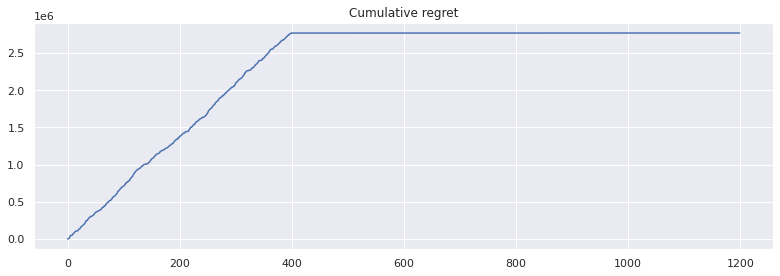

In [13]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(t, mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
    
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

fig.savefig('neural_ucb_linear.pdf')

Text(0.5, 1.0, 'reward')

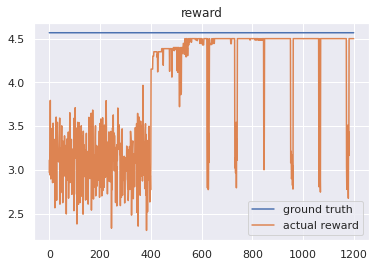

In [20]:
plt.plot([hwithoutconstraints(action)/(np.sqrt(args.card))**3]*T)
plt.plot(model.rewards_list)
plt.legend(['ground truth','actual reward'])
plt.title('reward')

Text(0.5, 1.0, 'infeasibility')

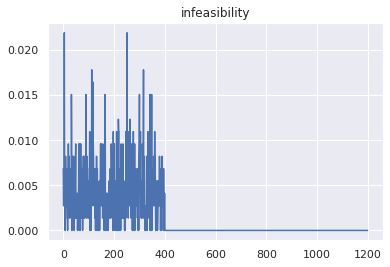

In [21]:
plt.plot(model.feasi)
plt.title('infeasibility')

Text(0.5, 1.0, 'reward')

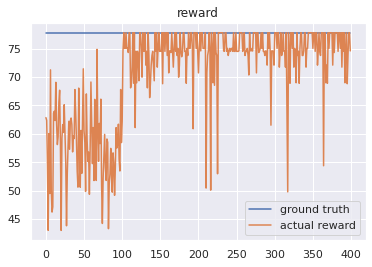

In [40]:
plt.plot([hwithoutconstraints(action)/(np.sqrt(args.card))]*T)
plt.plot(model.rewards_list)
plt.legend(['ground truth','actual reward'])
plt.title('reward')

Text(0.5, 1.0, 'infeasibility')

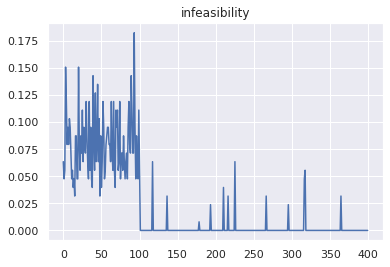

In [41]:
plt.plot(model.feasi)
plt.title('infeasibility')

In [42]:
hwithoutconstraints(action)/(np.sqrt(args.card))

77.81677523590568